# Home Credit Default Risk – A Comprehensive Machine Learning Approach

##  Project Structure

### 1. `EDA_and_Preprocessing.ipynb`
**Exploratory Data Analysis & Data Preprocessing**  
This notebook combines in-depth exploration of the dataset with preprocessing steps. 


### 2. `Feature_Selection_and_Modeling.ipynb`
**Feature Engineering & Model Training**  
This notebook focuses on selecting meaningful features and building robust models using techniques 




### Importing Required Libraries


In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, yeojohnson, boxcox
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import category_encoders as ce 

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style("whitegrid")

### Loading Dataset Files


In [3]:
files = {
    "application_test": "application_test.csv",
    "application_train": "application_train.csv",
    "bureau": "bureau.csv",
    "bureau_balance": "bureau_balance.csv",
    "credit_card_balance": "credit_card_balance.csv",
    "installments_payments": "installments_payments.csv",
    "POS_CASH_balance": "POS_CASH_balance.csv",
    "previous_application": "previous_application.csv",
    "sample_submission": "sample_submission.csv"
}

for name, path in files.items():
    print(f"\n--- {name} ---") 
    df = pd.read_csv(path)
    display(df.head())  



--- application_test ---


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]


--- application_train ---


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]


--- bureau ---


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN


--- bureau_balance ---


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


--- credit_card_balance ---


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]


--- installments_payments ---


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585


--- POS_CASH_balance ---


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0


--- previous_application ---


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]


--- sample_submission ---


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [5]:
application_train = pd.read_csv('application_train.csv')


In [3]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## EDA

### Application Train Dataset Overview


In [6]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
application_train.shape

(307511, 122)

In [9]:
application_test.shape

(48744, 121)

In [24]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [21]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

#### Distribution of TARGET

C:\Users\hamad\AppData\Local\Temp\ipykernel_17128\2483275519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=application_train, x='TARGET', palette=palette)
C:\Users\hamad\AppData\Local\Temp\ipykernel_17128\2483275519.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=application_train, x='TARGET', palette=palette)


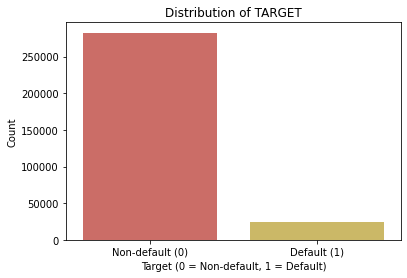

TARGET distribution (normalized):
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [3]:
target_counts = application_train['TARGET'].value_counts(normalize=True)

palette = sns.color_palette("hls", 8)
plt.figure(figsize=(6,4))
sns.countplot(data=application_train, x='TARGET', palette=palette)
plt.title('Distribution of TARGET')
plt.xlabel('Target (0 = Non-default, 1 = Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-default (0)', 'Default (1)'])
plt.show()

print("TARGET distribution (normalized):\n", target_counts)


### The TARGET variable is highly imbalanced, with only 8% representing defaults.

#### Correlation Heatmap

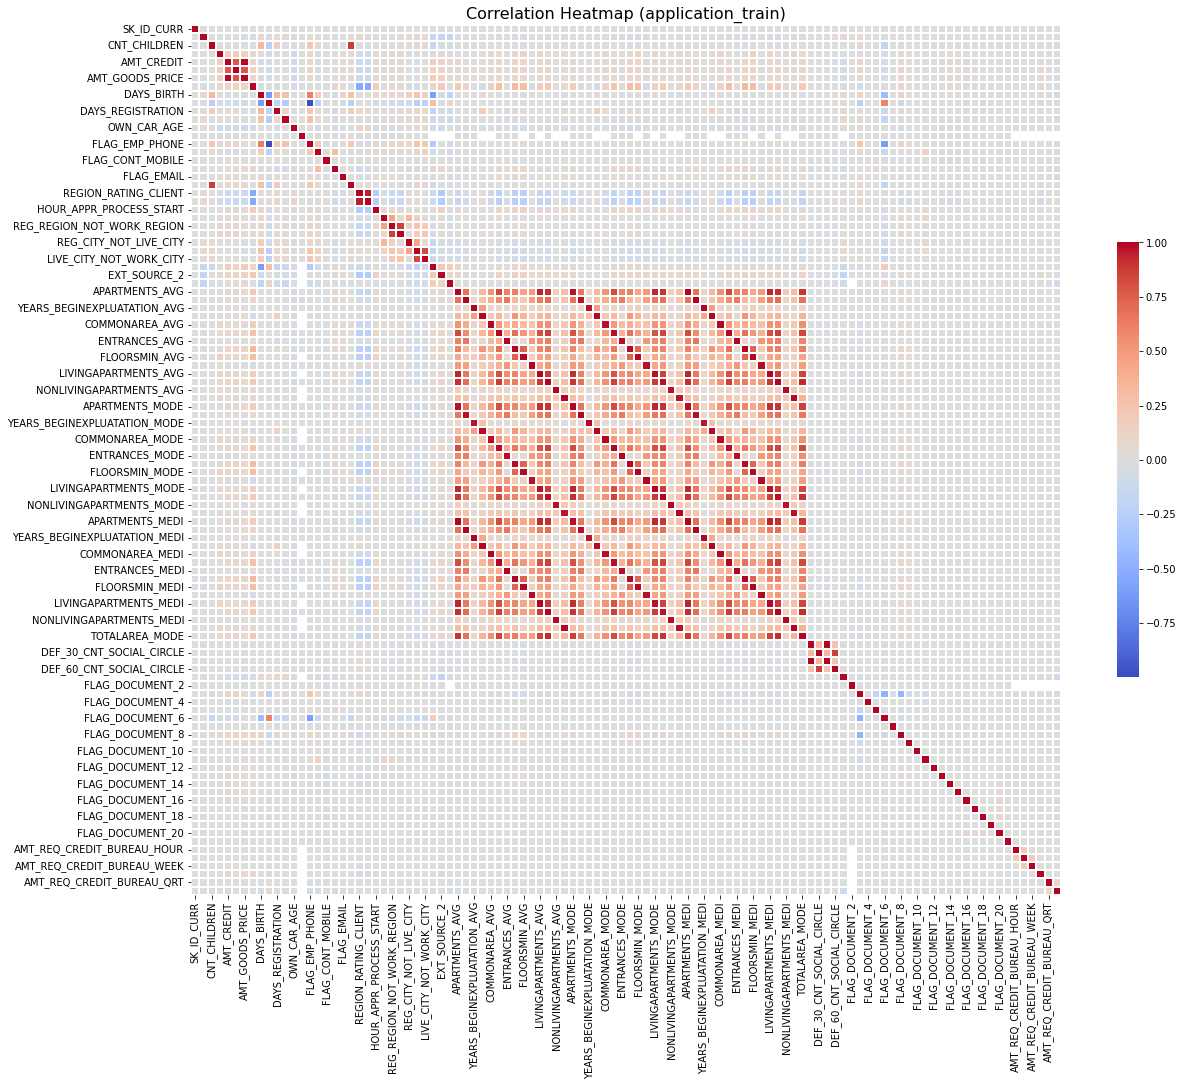

In [18]:
numeric_df = application_train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f', square=True,
            cbar_kws={'shrink': .5}, linewidths=0.1)
plt.title('Correlation Heatmap (application_train)', fontsize=16)
plt.show()


#### Gender Distribution of Borrowers

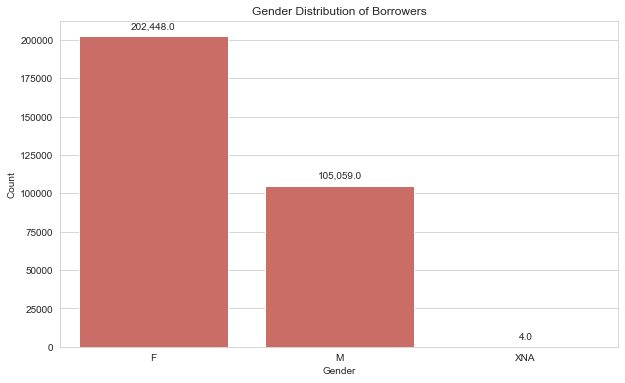

In [33]:
plt.figure(figsize=(10,6))
gender_counts = train['CODE_GENDER'].value_counts()
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of Borrowers')
plt.xlabel('Gender')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.show()

**Females are the highest borrowers**

#### Loan Repayment Status

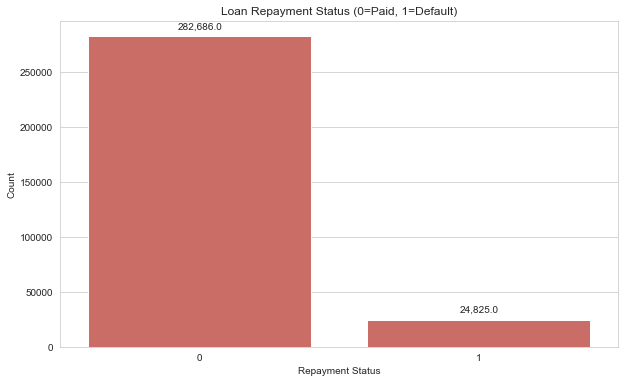

In [34]:
plt.figure(figsize=(10,6))
target_counts = train['TARGET'].value_counts()
ax = sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Loan Repayment Status (0=Paid, 1=Default)')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.show()

**Most of the people paid back the money, where the target label is '1' for the people who faced problems and '0' for the rest. It is clear that the target variable is unbalanced**

#### Repayment Difficulty by Gender

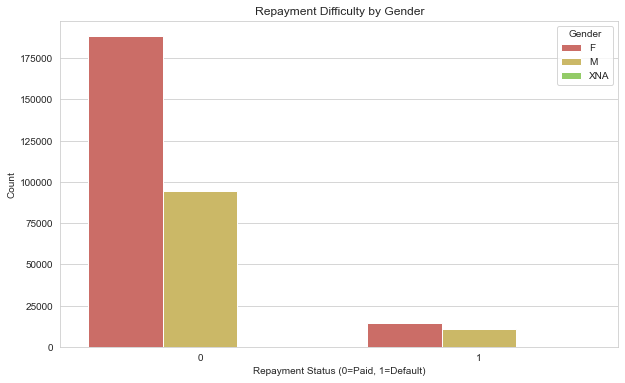

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='TARGET', hue='CODE_GENDER', data=train)
plt.title('Repayment Difficulty by Gender')
plt.xlabel('Repayment Status (0=Paid, 1=Default)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

**Females appear to have relatively more issues repaying loans, as indicated by a higher proportion of Target = 1 instances. This is understandable by the generally greater number of female customers compared to male customers, which aligns with the demographic structure in Russia where females constitute approximately 52.4% of the whole (76,539,681) compared to 45.2% males (65,930,591).**

#### Car Ownership by Gender

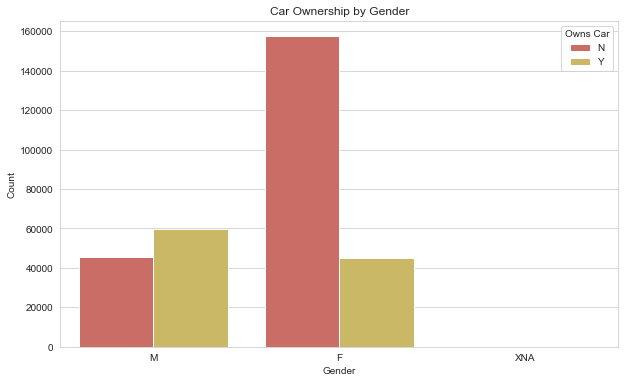

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=train)
plt.title('Car Ownership by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Owns Car')
plt.show()

**Females own less number of cars.**

#### Car Age Distribution


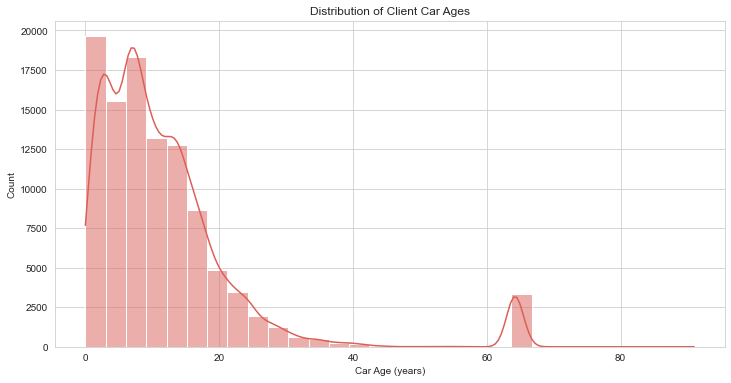

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data=train, x='OWN_CAR_AGE', bins=30, kde=True)
plt.title('Distribution of Client Car Ages')
plt.xlabel('Car Age (years)')
plt.ylabel('Count')
plt.show()

**The distribution is a right-skewed normal distribution, with evident increase at age 60 and over. In addition, the cars of the majority of the clients are around 10 years old.**

#### Car Age vs Repayment Status

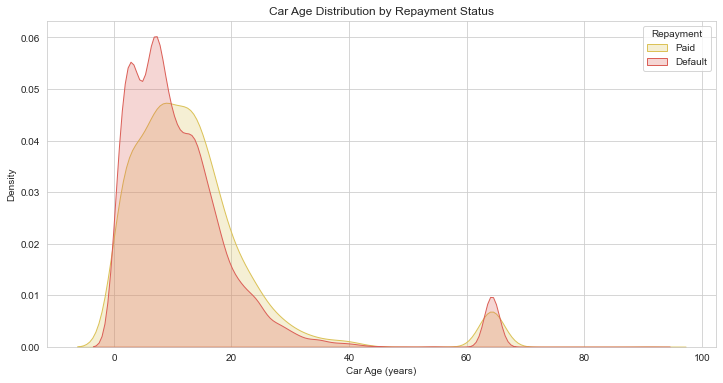

In [38]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=train, x='OWN_CAR_AGE', hue='TARGET', common_norm=False, fill=True)
plt.title('Car Age Distribution by Repayment Status')
plt.xlabel('Car Age (years)')
plt.ylabel('Density')
plt.legend(title='Repayment', labels=['Paid', 'Default'])
plt.show()

**Most borrowers own cars that are under 10 years old.**

#### Number of Applicants by Occupation

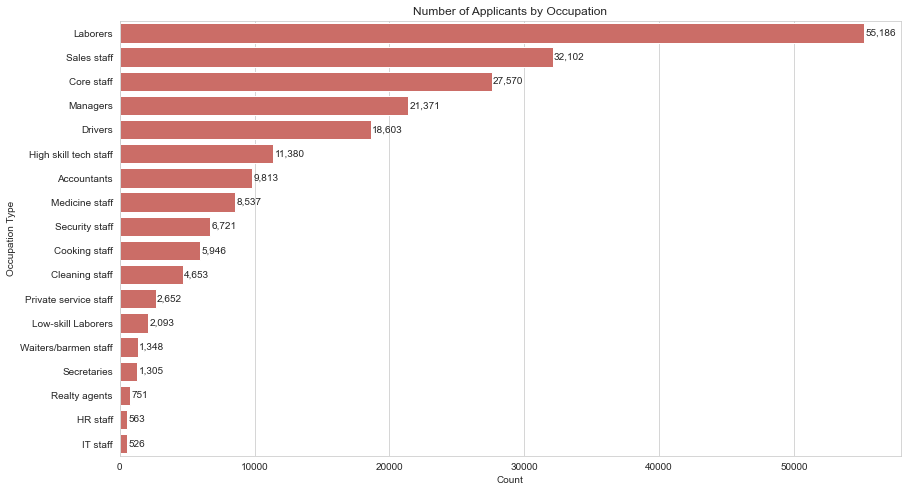

In [39]:
plt.figure(figsize=(14,8))
occupation_order = train['OCCUPATION_TYPE'].value_counts().index
ax = sns.countplot(y='OCCUPATION_TYPE', data=train, order=occupation_order)
plt.title('Number of Applicants by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation Type')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 100, p.get_y()+p.get_height()/2, f'{int(width):,}', 
            ha='left', va='center')
plt.show()

**The majority of clients are employed as laborers, while the fewest clients are employed in IT-related roles.**

#### Income by Occupation

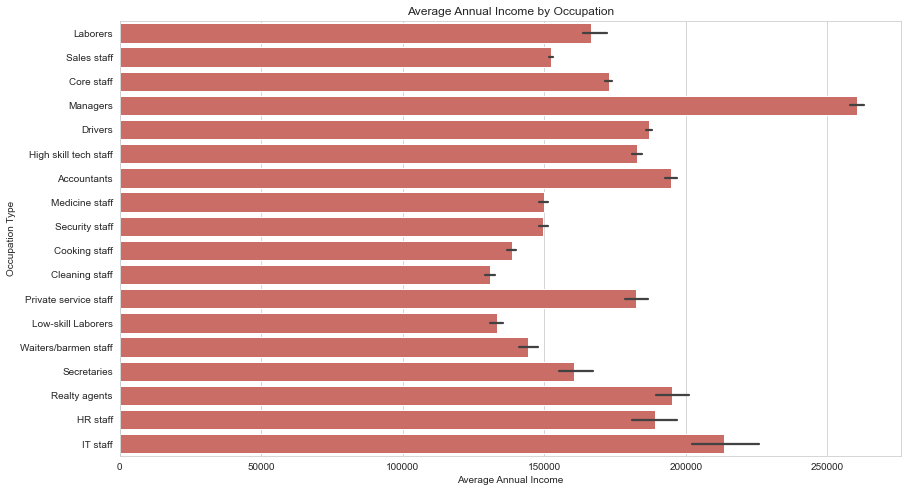

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', data=train, order=occupation_order)
plt.title('Average Annual Income by Occupation')
plt.xlabel('Average Annual Income')
plt.ylabel('Occupation Type')
plt.show()

**Based on annual family income, managers are the highest-earning borrowers, while cleaning staff are the lowest-earning borrowers**

#### Repayment Rate by Occupation

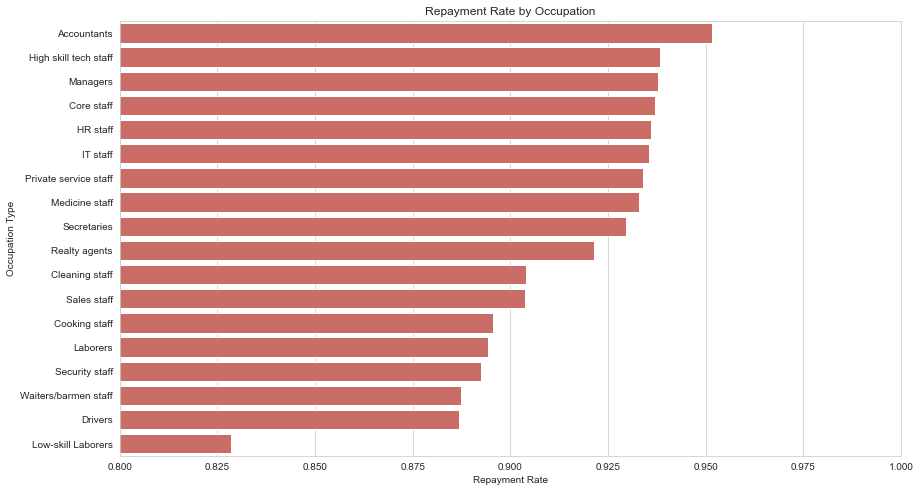

In [41]:
occupation_repay = train.groupby('OCCUPATION_TYPE')['TARGET'].agg(['mean', 'count'])
occupation_repay['repayment_rate'] = 1 - occupation_repay['mean']
occupation_repay = occupation_repay.sort_values('repayment_rate', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(y=occupation_repay.index, x='repayment_rate', data=occupation_repay)
plt.title('Repayment Rate by Occupation')
plt.xlabel('Repayment Rate')
plt.ylabel('Occupation Type')
plt.xlim(0.8, 1)
plt.show()

**Low-Skill Laborers appear to have the highest difficulty in loan repayment. Conversely, lending to Accountannts, High skill tech staff, and Managers appears to carry the lowest risk**

#### Real Estate Ownership


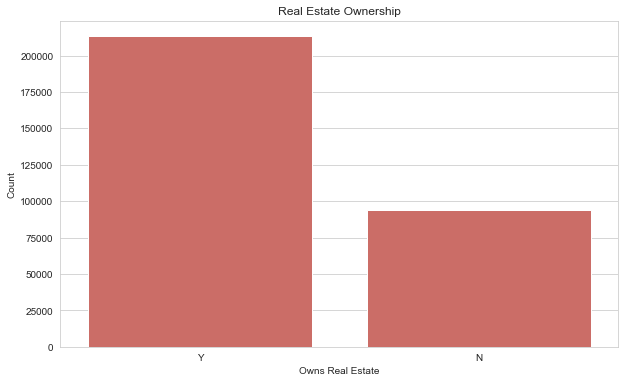

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='FLAG_OWN_REALTY', data=train)
plt.title('Real Estate Ownership')
plt.xlabel('Owns Real Estate')
plt.ylabel('Count')
plt.show()

**The majority of clients are property owners, and there are far more borrowers classified as "Yes" than "Not."This could be taken to mean that property ownership is the norm among loan applicants and could be a metric for having good finances.**

#### Repayment Status by Real Estate Ownership

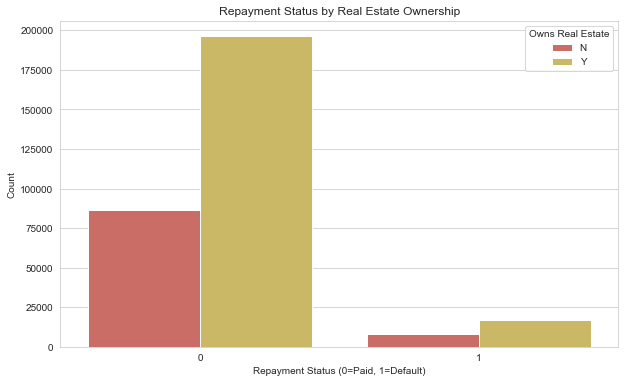

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='TARGET', hue='FLAG_OWN_REALTY', data=train)
plt.title('Repayment Status by Real Estate Ownership')
plt.xlabel('Repayment Status (0=Paid, 1=Default)')
plt.ylabel('Count')
plt.legend(title='Owns Real Estate')
plt.show()

**Individuals owning real estate have a greater likelihood of repaying their loans compared to individuals who do not own real estate. Both groups default less, but the difference between repayment and default is more robust for individuals owning real estate.real estate ownership appears to be a positive indicator of loan repayment.**

####  Living Area Distribution

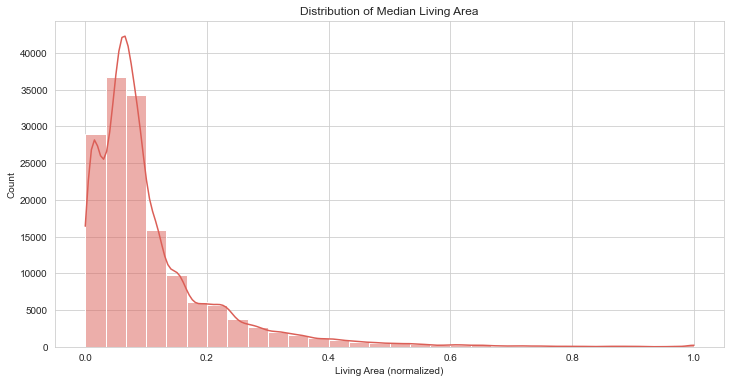

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=train, x='LIVINGAREA_MEDI', bins=30, kde=True)
plt.title('Distribution of Median Living Area')
plt.xlabel('Living Area (normalized)')
plt.ylabel('Count')
plt.show()

**Most normalized median living areas are small, with fewer instances of larger areas.**

#### Living Area vs Common Area

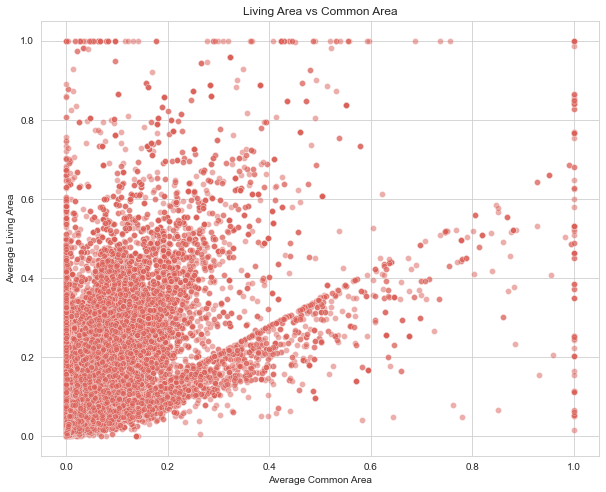

Correlation coefficient: 0.55


In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='COMMONAREA_AVG', y='LIVINGAREA_AVG', data=train, alpha=0.5)
plt.title('Living Area vs Common Area')
plt.xlabel('Average Common Area')
plt.ylabel('Average Living Area')
plt.show()

print(f"Correlation coefficient: {train['COMMONAREA_AVG'].corr(train['LIVINGAREA_AVG']):.2f}")

**There exists a weak to moderate positive correlation between living area and average common area, with huge variability especially in big common areas. The majority of them have smaller values for both, and the scatter suggests other variables play a role as well.**

#### Income Distribution by Repayment Status

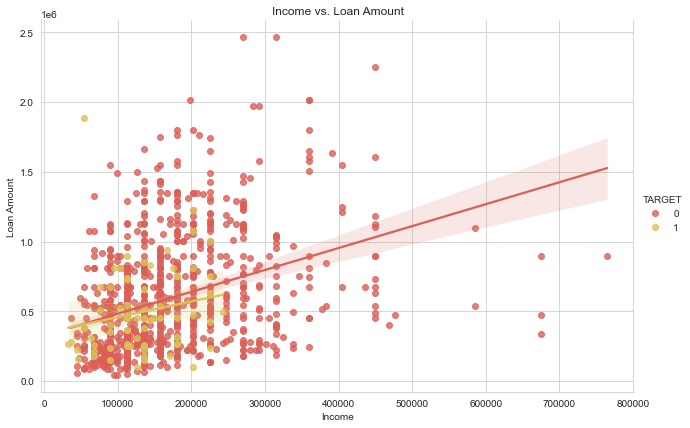

In [46]:
sns.lmplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=train.sample(1000), hue='TARGET', height=6, aspect=1.5)
plt.title('Income vs. Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

**Income positively correlates with the amount of loans—those earning more get larger loans. The trend is evident among both the target groups,the relationship can be variable for them. Outliers and other variables point towards further study being necessary as correlation does not equal causation.**

#### Loan Amount Distribution

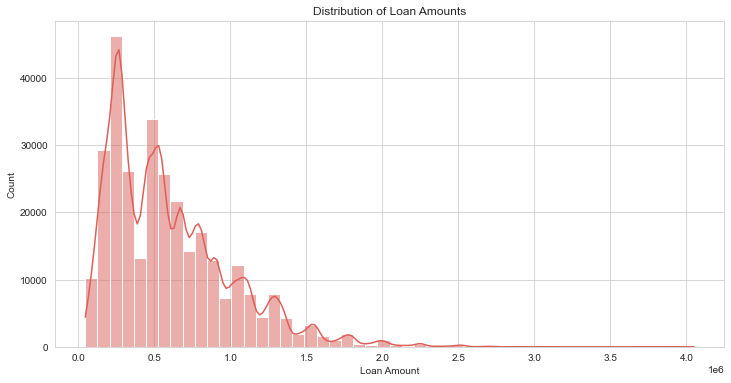

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(train['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()

**Loan values are in lower ranges, with some usual values suggesting typical borrowing habits. The distribution is right-skewed, suggesting the presence of large loan outliers.**

#### Family Status Analysis

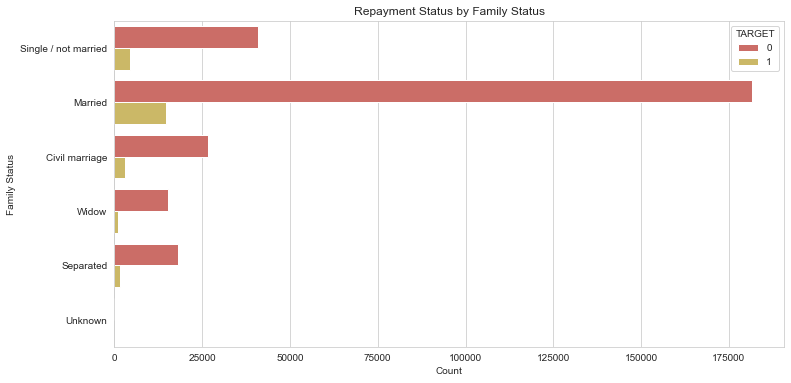

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y='NAME_FAMILY_STATUS', hue='TARGET', data=train)
plt.title('Repayment Status by Family Status')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.show()

**The chart shows repayment more common than default in every family status. "Married" status is the largest category of both repayment and default. Defaults might be less common as a whole, but additional research would be needed to know whether or not higher or lower default rates are associated with certain family statuses.**

#### Age Distribution by Repayment Status



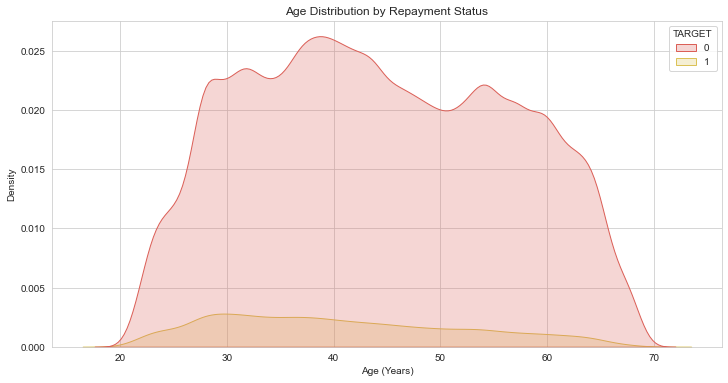

In [50]:
train['AGE'] = -train['DAYS_BIRTH'] / 365 
plt.figure(figsize=(12,6))
sns.kdeplot(data=train, x='AGE', hue='TARGET', fill=True)
plt.title('Age Distribution by Repayment Status')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

**The KDE plot suggests that repayers (Target 0) are older, peaking in the late 30s to early 40s and late 50s to early 60s. Defaulters (Target 1) are younger, peaking at the highest density in the late 20s to early 30s. Younger borrowers are more likely to default, evidenced by the lower peak and generally lower density of the defaulter distribution.**

#### Explore EXT_SOURCE Features

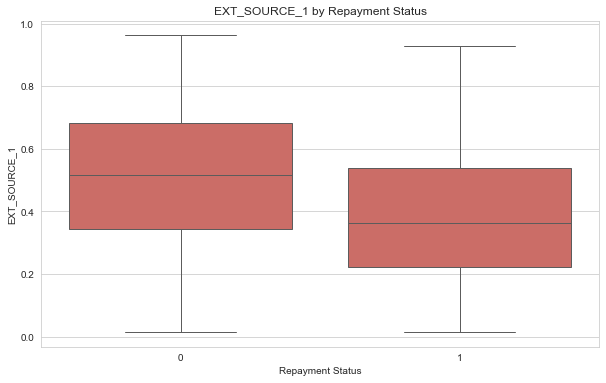

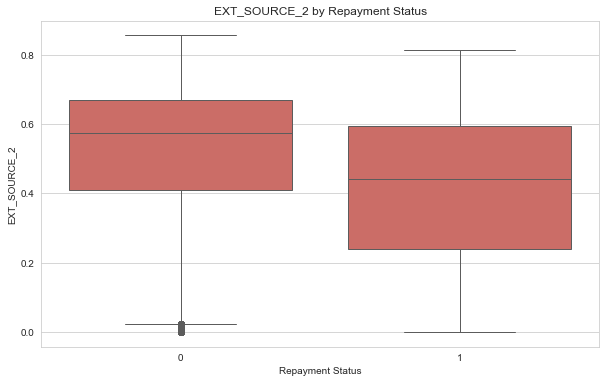

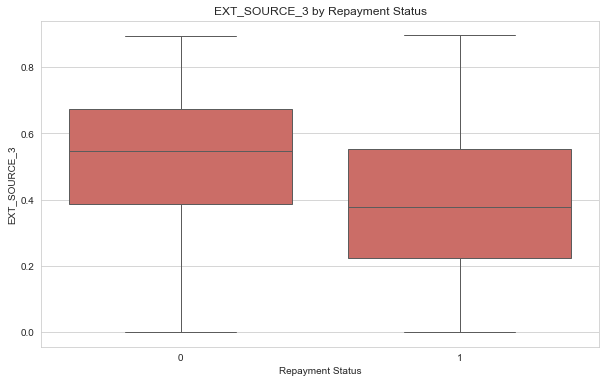

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='TARGET', y='EXT_SOURCE_1')
plt.title('EXT_SOURCE_1 by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('EXT_SOURCE_1')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='TARGET', y='EXT_SOURCE_2')
plt.title('EXT_SOURCE_2 by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('EXT_SOURCE_2')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='TARGET', y='EXT_SOURCE_3')
plt.title('EXT_SOURCE_3 by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('EXT_SOURCE_3')
plt.show()


**For all three external data sources (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3), repayers (Status 0) score higher than defaulters (Status 1). This shows that these sources have the potential to indicate creditworthiness, where lower values can be used with a higher chance of default. These features would be helpful for loan repayment prediction.**

#### Feature Interactions: Annuity to Income Ratio

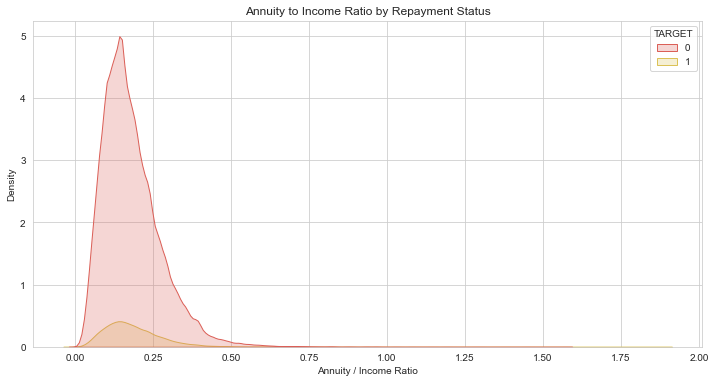

In [53]:
train['ANNUITY_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
plt.figure(figsize=(12,6))
sns.kdeplot(data=train, x='ANNUITY_INCOME_RATIO', hue='TARGET', fill=True)
plt.title('Annuity to Income Ratio by Repayment Status')
plt.xlabel('Annuity / Income Ratio')
plt.show()


**Individuals who repaid their loans had a lower monthly annuity payment relative to their income. Defaulters had a higher proportion of their income going to loan repayment, suggesting that an increased financial burden would result in a higher probability of default.**

#### Family Size Impact

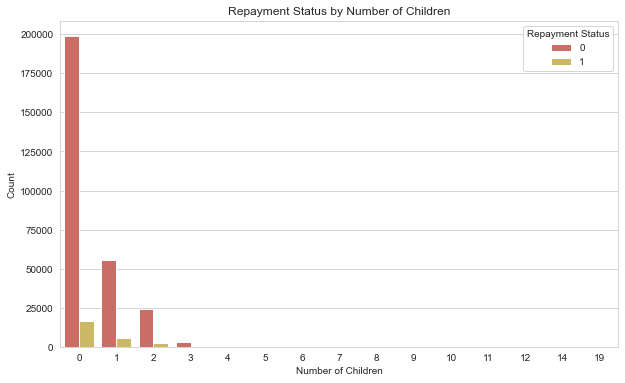

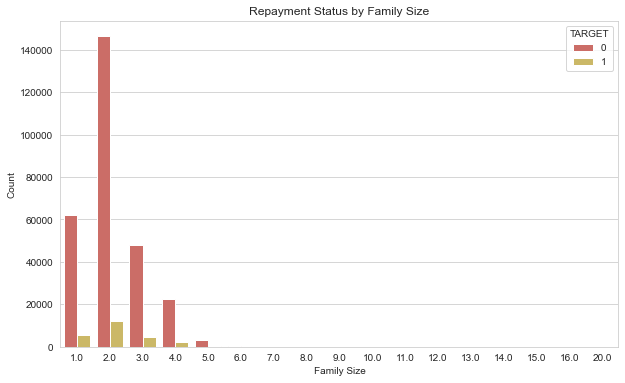

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=train)
plt.title('Repayment Status by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='CNT_FAM_MEMBERS', hue='TARGET', data=train)
plt.title('Repayment Status by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()


**Those with no children are the largest number of applicants and have a relatively low default rate. As the family size and number of children increase, the number of applicants decreases, perhaps with an increasing proportion of defaults for large families, though very little data is available for very large families. Family sizes 1 and 2 have the largest number of applicants, with family size 2 having a lower default rate.**

#### Housing Type vs Repayment

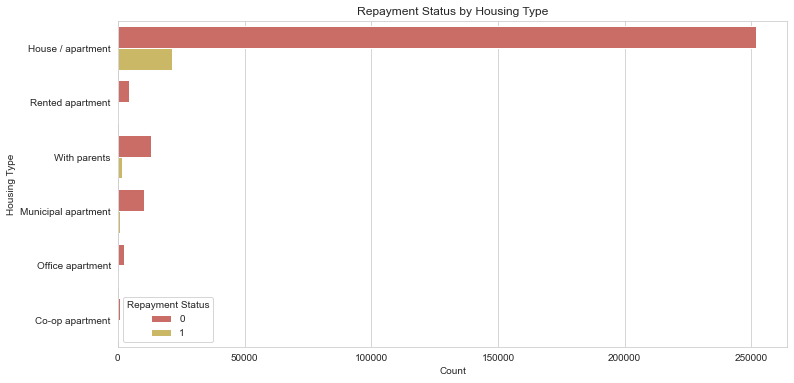

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(y='NAME_HOUSING_TYPE', hue='TARGET', data=train)
plt.title('Repayment Status by Housing Type')
plt.xlabel('Count')
plt.ylabel('Housing Type')
plt.legend(title='Repayment Status')
plt.show()


**The "House / apartment" category includes the most loan applicants and appears to have a lower default rate. The other types of housing, including "Rented apartment," "With parents," and "Municipal apartment," have a greater percentage of defaults, indicating that housing type might be a factor in loan repayment. Yet, the smaller sizes of some categories must be kept in mind before making firm conclusions.**

#### Regional Analysis

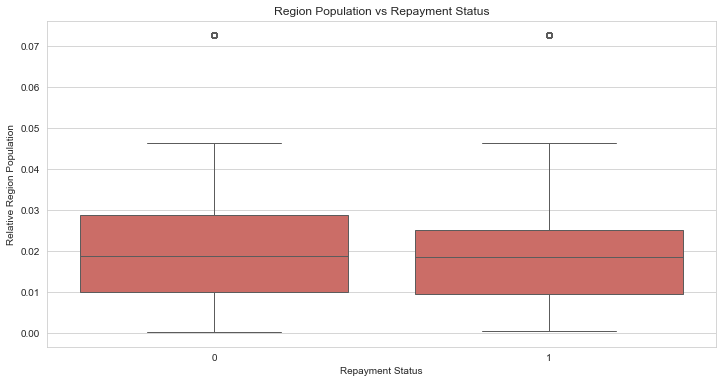

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x='TARGET', y='REGION_POPULATION_RELATIVE', data=train)
plt.title('Region Population vs Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Relative Region Population')
plt.show()


**The box plots indicate that "Relative Region Population" is very similar for defaulted and repaid loans. Medians are nearly identical, and while the defaulted group has a slightly more compressed spread, overall variation is minimal. This feature does not distinctly distinguish between repayment statuses.**

#### Organization Type

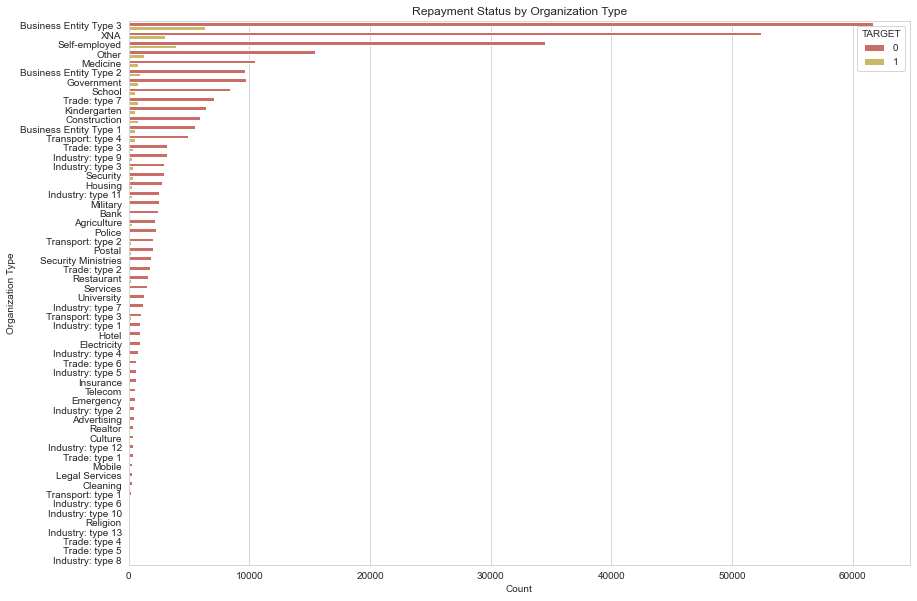

In [59]:
org_order = train['ORGANIZATION_TYPE'].value_counts().index
plt.figure(figsize=(14,10))
sns.countplot(y='ORGANIZATION_TYPE', hue='TARGET', data=train, order=org_order)
plt.title('Repayment Status by Organization Type')
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.show()


**The applicant's organization type appears to be associated with repayment status. "Business Entity Type 3" and "XNA" have a high proportion of applicants with better repayment behavior, while others have dissimilar default rates, which indicates that this attribute may be able to predict loan repayment.**

#### Top correlated features with TARGET

Top correlated features with TARGET:
 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, dtype: float64


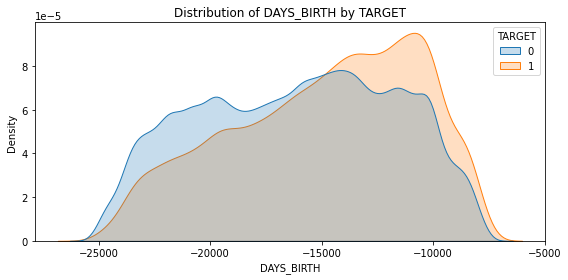

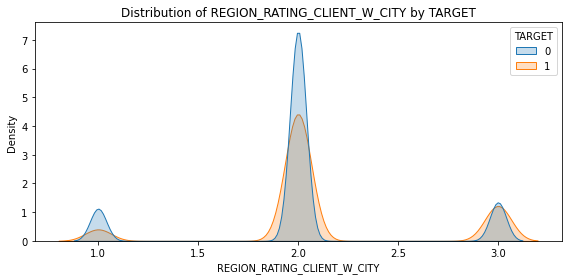

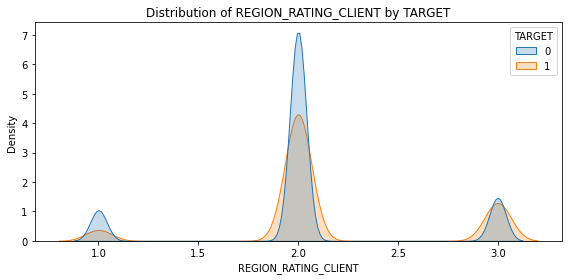

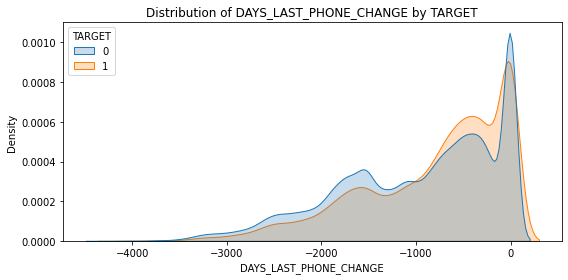

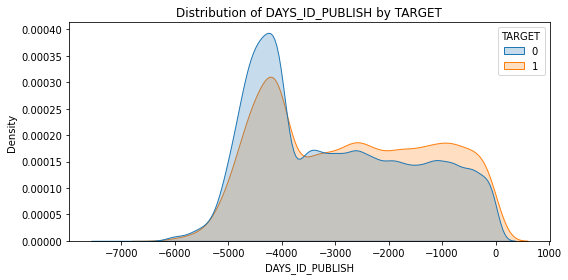

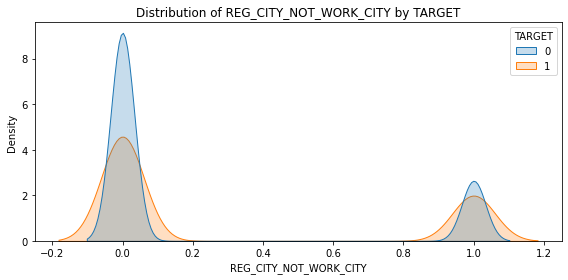

In [21]:
corr_target = corr_matrix['TARGET'].drop('TARGET')  
top_corr_features = corr_target[abs(corr_target) > 0.05].sort_values(ascending=False)

print("Top correlated features with TARGET:\n", top_corr_features)
for col in top_corr_features.index[:6]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=application_train, x=col, hue='TARGET', common_norm=False, fill=True)
    plt.title(f'Distribution of {col} by TARGET')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


**External sources (EXT_SOURCE_1–3) are good predictors of repayment, with higher values linked to lower default risk. Younger age, certain region ratings, and factors like recent phone changes or mismatched registration and work cities slightly increase default risk. These features can aid in default prediction.**

In [33]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
print(application_train.describe(include='all'))

        SK_ID_CURR    TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count    307511.00 307511.00             307511      307511       307511   
unique         NaN       NaN                  2           3            2   
top            NaN       NaN         Cash loans           F            N   
freq           NaN       NaN             278232      202448       202924   
mean     278180.52      0.08                NaN         NaN          NaN   
std      102790.18      0.27                NaN         NaN          NaN   
min      100002.00      0.00                NaN         NaN          NaN   
25%      189145.50      0.00                NaN         NaN          NaN   
50%      278202.00      0.00                NaN         NaN          NaN   
75%      367142.50      0.00                NaN         NaN          NaN   
max      456255.00      1.00                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count           3

## Data PreProcessing

### Handling Missing Values


In [3]:
missing_values = application_train.isnull().sum()
missing_percent = (missing_values / len(application_train)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [14]:
missing_df.head(67)

Missing Values  Percent Missing
COMMONAREA_MEDI                       214865        69.872297
COMMONAREA_MODE                       214865        69.872297
COMMONAREA_AVG                        214865        69.872297
NONLIVINGAPARTMENTS_MODE              213514        69.432963
NONLIVINGAPARTMENTS_MEDI              213514        69.432963
NONLIVINGAPARTMENTS_AVG               213514        69.432963
FONDKAPREMONT_MODE                    210295        68.386172
LIVINGAPARTMENTS_AVG                  210199        68.354953
LIVINGAPARTMENTS_MEDI                 210199        68.354953
LIVINGAPARTMENTS_MODE                 210199        68.354953
FLOORSMIN_MEDI                        208642        67.848630
FLOORSMIN_MODE                        208642        67.848630
FLOORSMIN_AVG                         208642        67.848630
YEARS_BUILD_MODE                      204488        66.497784
YEARS_BUILD_MEDI                      204488        66.497784
YEARS_BUILD_AVG                       204488        66.497784
OWN_CAR_AGE                           202929        65.990810
LANDAREA_AVG                          182590        59.376738
LANDAREA_MEDI                         182590        59.376738
LANDAREA_MODE                         182590        59.376738
BASEMENTAREA_MODE                     179943        58.515956
BASEMENTAREA_MEDI                     179943        58.515956
BASEMENTAREA_AVG                      179943        58.515956
EXT_SOURCE_1                          173378        56.381073
NONLIVINGAREA_MEDI                    169682        55.179164
NONLIVINGAREA_AVG                     169682        55.179164
NONLIVINGAREA_MODE                    169682        55.179164
ELEVATORS_MEDI                        163891        53.295980
ELEVATORS_MODE                        163891        53.295980
ELEVATORS_AVG                         163891        53.295980
WALLSMATERIAL_MODE                    156341        50.840783
APARTMENTS_AVG                        156061        50.749729
APARTMENTS_MEDI                       156061        50.749729
APARTMENTS_MODE                       156061        50.749729
ENTRANCES_MODE                        154828        50.348768
ENTRANCES_MEDI                        154828        50.348768
ENTRANCES_AVG                         154828        50.348768
LIVINGAREA_AVG                        154350        50.193326
LIVINGAREA_MODE                       154350        50.193326
LIVINGAREA_MEDI                       154350        50.193326
HOUSETYPE_MODE                        154297        50.176091
FLOORSMAX_AVG                         153020        49.760822
FLOORSMAX_MEDI                        153020        49.760822
FLOORSMAX_MODE                        153020        49.760822
YEARS_BEGINEXPLUATATION_MODE          150007        48.781019
YEARS_BEGINEXPLUATATION_MEDI          150007        48.781019
YEARS_BEGINEXPLUATATION_AVG           150007        48.781019
TOTALAREA_MODE                        148431        48.268517
EMERGENCYSTATE_MODE                   145755        47.398304
OCCUPATION_TYPE                        96391        31.345545
EXT_SOURCE_3                           60965        19.825307
AMT_REQ_CREDIT_BUREAU_WEEK             41519        13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519        13.501631
AMT_REQ_CREDIT_BUREAU_HOUR             41519        13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519        13.501631
AMT_REQ_CREDIT_BUREAU_QRT              41519        13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519        13.501631
NAME_TYPE_SUITE                         1292         0.420148
DEF_30_CNT_SOCIAL_CIRCLE                1021         0.332021
DEF_60_CNT_SOCIAL_CIRCLE                1021         0.332021
OBS_30_CNT_SOCIAL_CIRCLE                1021         0.332021
OBS_60_CNT_SOCIAL_CIRCLE                1021         0.332021
EXT_SOURCE_2                             660         0.214626
AMT_GOODS_PRICE                          278         0.090403


In [30]:
correlation_with_target = df_copy[missing_columns].corrwith(df_copy[target])
correlation_with_target

AMT_ANNUITY                    -0.012817
AMT_GOODS_PRICE                -0.039645
NAME_TYPE_SUITE                 0.008074
OWN_CAR_AGE                     0.037612
OCCUPATION_TYPE                -0.019510
CNT_FAM_MEMBERS                 0.009308
EXT_SOURCE_1                   -0.155317
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_3                   -0.178919
APARTMENTS_AVG                 -0.029498
BASEMENTAREA_AVG               -0.022746
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BUILD_AVG                -0.022149
COMMONAREA_AVG                 -0.018550
ELEVATORS_AVG                  -0.034199
ENTRANCES_AVG                  -0.019172
FLOORSMAX_AVG                  -0.044003
FLOORSMIN_AVG                  -0.033614
LANDAREA_AVG                   -0.010885
LIVINGAPARTMENTS_AVG           -0.025031
LIVINGAREA_AVG                 -0.032997
NONLIVINGAPARTMENTS_AVG        -0.003176
NONLIVINGAREA_AVG              -0.013578
APARTMENTS_MODE                -0.027284
BASEMENTAREA_MOD

- The features with less than 60% missing values cannot be reliably imputed using machine learning models, as they exhibit high correlation with other features that also contain missing values. This correlation undermines the predictive power of imputation models, leading to unreliable imputations.
- For features with more than 60% missing values, imputing them based on highly correlated variables introduces significant multicollinearity and the risk of data leakage. These issues become particularly evident after applying the complete preprocessing pipeline and training the model, as observed in the results of the `notebook_poor_worse`notebook.

In [10]:
features_less60_missing = [
    "LANDAREA_AVG", "LANDAREA_MEDI", "LANDAREA_MODE", "BASEMENTAREA_MODE", 
    "BASEMENTAREA_MEDI", "BASEMENTAREA_AVG", "EXT_SOURCE_1", 
    "NONLIVINGAREA_MEDI", "NONLIVINGAREA_AVG", "NONLIVINGAREA_MODE", 
    "ELEVATORS_MEDI", "ELEVATORS_MODE", "ELEVATORS_AVG", "WALLSMATERIAL_MODE", 
    "APARTMENTS_AVG", "APARTMENTS_MEDI", "APARTMENTS_MODE", "ENTRANCES_MODE", 
    "ENTRANCES_MEDI", "ENTRANCES_AVG", "LIVINGAREA_AVG", "LIVINGAREA_MODE", 
    "LIVINGAREA_MEDI", "HOUSETYPE_MODE", "FLOORSMAX_AVG", "FLOORSMAX_MEDI", 
    "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MODE", 
    "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_AVG", 
    "TOTALAREA_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", 
    "EXT_SOURCE_3", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", 
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_YEAR", 
    "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_DAY", "NAME_TYPE_SUITE", 
    "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", 
    "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "EXT_SOURCE_2", 
    "AMT_GOODS_PRICE", "AMT_ANNUITY", "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"]

df_filtered = df[features_less60_missing]
numeric_cols = df_filtered.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
top_corrs = {}
for col in corr_matrix.columns:
    corrs = corr_matrix[col].drop(labels=[col])
    if not corrs.empty and not corrs.isna().all():
        top_feature = corrs.abs().idxmax()
        top_corrs[col] = {
            "Most Correlated Feature": top_feature,
            "Correlation": corrs[top_feature]
        }
top_corr_df = pd.DataFrame.from_dict(top_corrs, orient='index')
top_corr_df = top_corr_df.sort_values(by="Correlation", key=abs, ascending=False)

skip_imputation = []
for col, row in top_corr_df.iterrows():
    correlated_feature = row["Most Correlated Feature"]
    if df[col].isna().any() and df[correlated_feature].isna().any():
        skip_imputation.append(col)

print("Skip imputation for the following columns (highly correlated feature also has missing):")
print(skip_imputation)


Skip imputation for the following columns (highly correlated feature also has missing):
['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'FLOORSMAX_MODE', 'ELEVATORS_MODE', 'LANDAREA_MODE', 'ENTRANCES_MODE', 'BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_ME

In [3]:
def handle_missing_values_train(df_train):
    df_train_filtered = df_train.copy()
    missing_threshold = 0.6
    missing_ratio = df_train_filtered.isnull().mean()
    cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index
    print(f"Dropping columns with >60% missing values: {list(cols_to_drop)}")
    df_train_filtered = df_train_filtered.drop(columns=cols_to_drop)

    imputation_params = {}

    for feature in df_train_filtered.columns:
        if df_train_filtered[feature].isnull().sum() == 0:
            continue  
        
        if df_train_filtered[feature].dtype == 'object' or df_train_filtered[feature].dtype.name == 'category':
            mode_val = df_train_filtered[feature].mode()[0]
            print(f"Categorical feature '{feature}': Imputing with mode = {mode_val}")
            imputation_params[feature] = {'type': 'mode', 'value': mode_val}
            df_train_filtered[feature] = df_train_filtered[feature].fillna(mode_val)
        else:
            skewness = df_train_filtered[feature].skew()
            if skewness > 1:
                impute_value = df_train_filtered[feature].median()
                if impute_value == 0:
                    impute_value = df_train_filtered[feature].mean()
                    print(f"Feature '{feature}' is right-skewed with median=0. Imputing with mean = {impute_value:.4f}")
                else:
                    print(f"Feature '{feature}' is right-skewed. Imputing with median = {impute_value:.4f}")
            elif skewness < -1:
                impute_value = df_train_filtered[feature].median()
                if impute_value == 0:
                    impute_value = df_train_filtered[feature].mean()
                    print(f"Feature '{feature}' is left-skewed with median=0. Imputing with mean = {impute_value:.4f}")
                else:
                    print(f"Feature '{feature}' is left-skewed. Imputing with median = {impute_value:.4f}")
            else:
                impute_value = df_train_filtered[feature].mean()
                if impute_value == 0:
                    print(f"Feature '{feature}' is symmetric with mean=0. Imputing with constant 0")
                    impute_value = 0
                else:
                    print(f"Feature '{feature}' is symmetric. Imputing with mean = {impute_value:.4f}")
            
            imputation_params[feature] = {'type': 'mean/median', 'value': impute_value}
            df_train_filtered[feature] = df_train_filtered[feature].fillna(impute_value)
    
    return df_train_filtered, imputation_params

def handle_missing_values_test(df_test, imputation_params):
    df_test_filtered = df_test.copy()

    for feature in df_test_filtered.columns:
        if df_test_filtered[feature].isnull().sum() == 0:
            continue 

        if feature in imputation_params:
            param = imputation_params[feature]
            if param['type'] == 'mode':
                df_test_filtered[feature] = df_test_filtered[feature].fillna(param['value'])
            elif param['type'] == 'mean/median':
                df_test_filtered[feature] = df_test_filtered[feature].fillna(param['value'])
    
    return df_test_filtered


In [8]:
df_train_imputed, imputation_params = handle_missing_values_train(df_train)

Dropping columns with >60% missing values: ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']
Feature 'AMT_ANNUITY' is right-skewed. Imputing with median = 24903.0000
Feature 'AMT_GOODS_PRICE' is right-skewed. Imputing with median = 450000.0000
Categorical feature 'NAME_TYPE_SUITE': Imputing with mode = Unaccompanied
Categorical feature 'OCCUPATION_TYPE': Imputing with mode = Laborers
Feature 'CNT_FAM_MEMBERS' is symmetric. Imputing with mean = 2.1527
Feature 'EXT_SOURCE_1' is symmetric. Imputing with mean = 0.5021
Feature 'EXT_SOURCE_2' is symmetric. Imputing with mean = 0.5144
Feature 'EXT_SOURCE_3' is symmetric. Imputing with mean = 0.5109
Feature 'APARTMENTS_AVG' is right-ske

- **For columns with less than 60% missing values, imputation is done by data type and distribution. Categorical columns (`object` or `category`) are replaced by the mode, and the first among multiple is used.Numerical columns are handled on the basis of skewness: if skewness > 1 or < -1 (highly skewed), missing values are replaced by the median, or by mean if the median is 0; if -1 <= skewness <= 1 (about symmetric), by mean, or by 0 if mean is 0. Columns containing more than 60% missing values are dropped entirely.**
- **And Store imputation parameters: After calculating the parameters for the train set, store them.Use the imputation parameters from the training set to handle missing values in the test set.**

In [10]:
missing_values = df_cleaned.isnull().sum()
missing_percent = (missing_values / len(df_cleaned)) * 100

# Combine into a DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})

missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)
missing_df

Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []

In [12]:
df_cleaned.shape

(307511, 105)

### Display part of features before and after handling missing values 
- To ensure that the distribution before and after still the same  

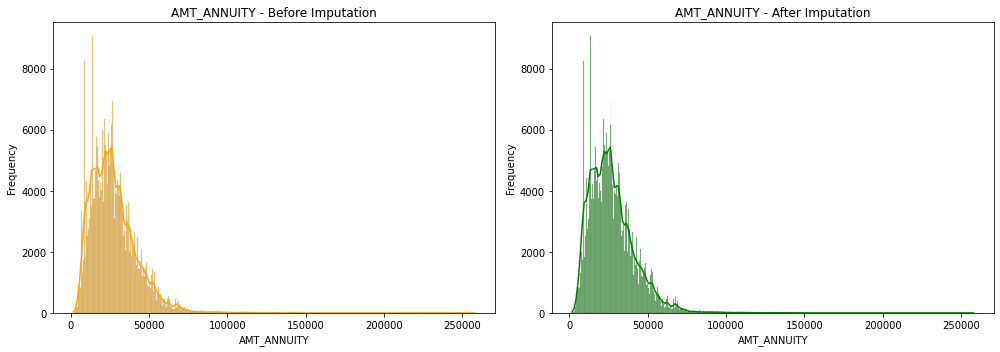

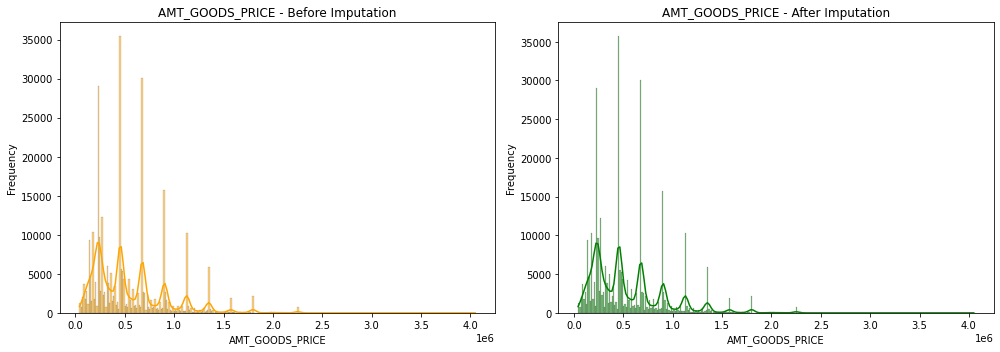

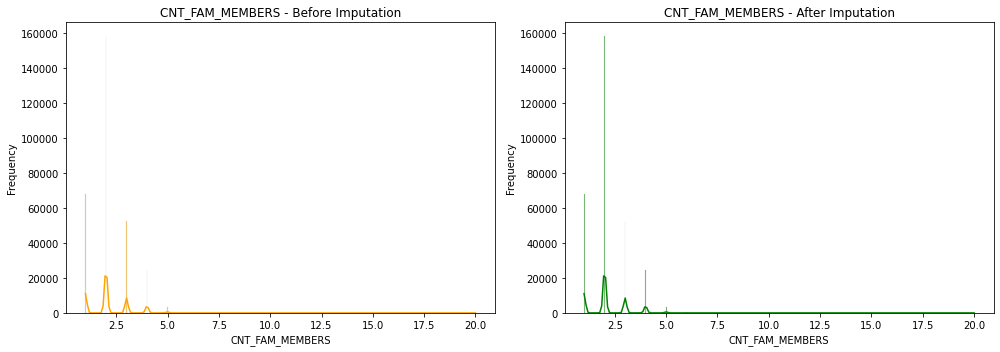

In [11]:
missing_columns = train.columns[train.isnull().any()]
numerical_missing = [col for col in missing_columns 
                     if train[col].dtype != 'object' and col in df_cleaned.columns]

numerical_missing = numerical_missing[:3]

for column in numerical_missing:
    plt.figure(figsize=(14, 5))

    
    plt.subplot(1, 2, 1)
    sns.histplot(train[column].dropna(), kde=True, color="orange")
    plt.title(f'{column} - Before Imputation')
    plt.xlabel(column)
    plt.ylabel('Frequency')

  
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[column], kde=True, color="green")
    plt.title(f'{column} - After Imputation')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


### Outlier Detection and Treatment


In [5]:
def cap_outliers_train(df_train, exclude_cols=["SK_ID_CURR", "TARGET"], iqr_multiplier=1.5, 
                       skip_binary=True, skip_small_range=0.01, min_unique_values=2):
    numeric_cols = df_train.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
    df_train_proc = df_train.copy()
    outlier_report = {}
    protected_cols = ['ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAPARTMENTS_MEDI',
                      'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'DAYS_PUBLISH']
    
    capping_params = {}  

    for col in numeric_cols:
        unique_vals = df_train_proc[col].nunique()
        col_range = df_train_proc[col].max() - df_train_proc[col].min()

        if unique_vals < min_unique_values:
            outlier_report[col] = "Skipped: too few unique values"
            continue

        if col_range < skip_small_range and col not in protected_cols:
            outlier_report[col] = "Skipped: small range"
            continue

        if skip_binary and set(df_train[col].dropna().unique()).issubset({0, 1}):
            outlier_report[col] = "Skipped: binary column"
            continue

        Q1 = df_train_proc[col].quantile(0.25)
        Q3 = df_train_proc[col].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0:
            outlier_report[col] = "Skipped: IQR is 0"
            continue

        lower = Q1 - iqr_multiplier * IQR
        upper = Q3 + iqr_multiplier * IQR

        if col.startswith(('AMT_', 'CNT_', 'DAYS_', 'OBS_', 'DEF_')):
            lower = max(lower, 0)

        capping_params[col] = {'lower': lower, 'upper': upper}

        df_train_proc[col] = np.where(df_train_proc[col] < lower, lower, df_train_proc[col])
        df_train_proc[col] = np.where(df_train_proc[col] > upper, upper, df_train_proc[col])

        outlier_report[col] = {
            'lower_bound': lower,
            'upper_bound': upper
        }

    return df_train_proc, outlier_report, capping_params


def cap_outliers_test(df_test, capping_params, exclude_cols=["SK_ID_CURR", "TARGET"]):
    numeric_cols = df_test.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
    df_test_proc = df_test.copy()
    outlier_report = {}

    for col in numeric_cols:
        if col not in capping_params:
            continue

        lower = capping_params[col]['lower']
        upper = capping_params[col]['upper']

        df_test_proc[col] = np.where(df_test_proc[col] < lower, lower, df_test_proc[col])
        df_test_proc[col] = np.where(df_test_proc[col] > upper, upper, df_test_proc[col])

        outlier_report[col] = {
            'lower_bound': lower,
            'upper_bound': upper
        }

    return df_test_proc, outlier_report


In [24]:
df_train_processed, outlier_report_train, capping_params = cap_outliers_train(df_train)


Column: AMT_ANNUITY
   - Unique values: 13672
   - Min: 1615.5000
   - Max: 258025.5000
   - Range: 256410.0000
   - Q1: 16524.0000, Q3: 34596.0000, IQR: 18072.0000
   - Lower Bound: 0.0000, Upper Bound: 61704.0000
   - Outliers Before Capping: 7504
   - Outliers After Capping: 0

Column: AMT_CREDIT
   - Unique values: 5603
   - Min: 45000.0000
   - Max: 4050000.0000
   - Range: 4005000.0000
   - Q1: 270000.0000, Q3: 808650.0000, IQR: 538650.0000
   - Lower Bound: 0.0000, Upper Bound: 1616625.0000
   - Outliers Before Capping: 6562
   - Outliers After Capping: 0

Column: AMT_GOODS_PRICE
   - Unique values: 1002
   - Min: 40500.0000
   - Max: 4050000.0000
   - Range: 4009500.0000
   - Q1: 238500.0000, Q3: 679500.0000, IQR: 441000.0000
   - Lower Bound: 0.0000, Upper Bound: 1341000.0000
   - Outliers Before Capping: 14728
   - Outliers After Capping: 0

Column: AMT_INCOME_TOTAL
   - Unique values: 2548
   - Min: 25650.0000
   - Max: 117000000.0000
   - Range: 116974350.0000
   - Q1: 112


Column: FLAG_DOCUMENT_7
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_8
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_9
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_EMAIL
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_EMP_PHONE
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_MOBIL
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_PHONE
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_WORK_PHONE
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.


In [25]:
def plot_boxplots_before_after(original_df, capped_df, columns):
    for col in columns:
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        sns.boxplot(y=original_df[col], color='skyblue')
        plt.title(f'{col} - Before Capping')
        plt.ylabel(col)

        plt.subplot(1, 2, 2)
        sns.boxplot(y=capped_df[col], color='lightgreen')
        plt.title(f'{col} - After Capping')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()


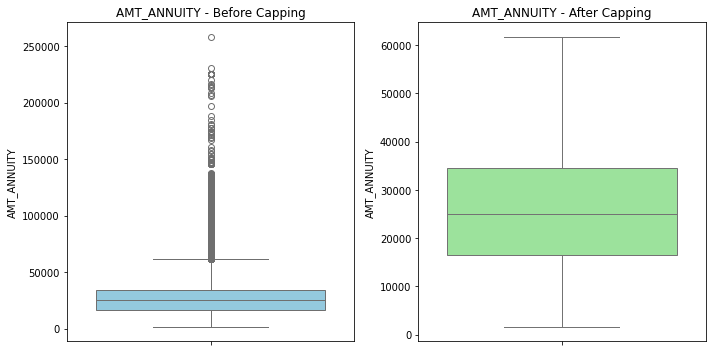

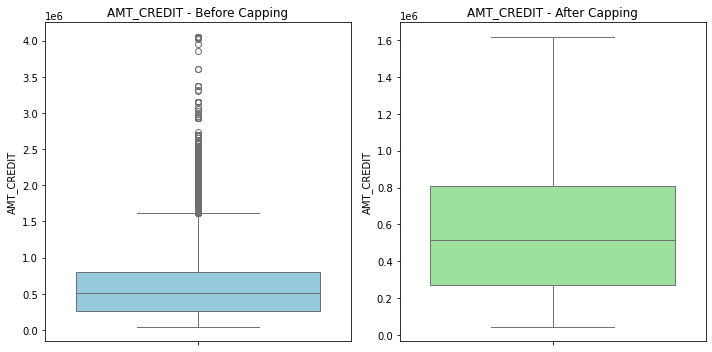

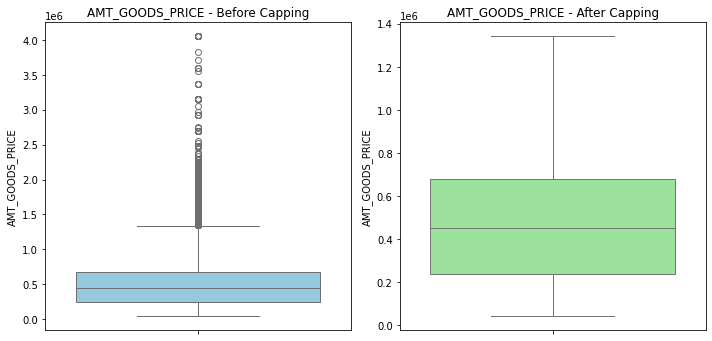

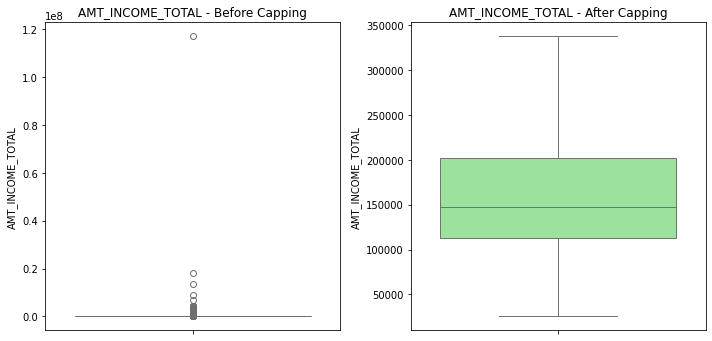

In [26]:
plot_boxplots_before_after(df, df_cleand, list(report.keys())[:4]) 


- **The conditions for processing a column are as follows: The column must be numeric (`np.number` type) and not present in the `exclude_cols` list (which defaults to "SK_ID_CURR" and "TARGET"). It must have at least `min_unique_values` unique values (default is 2) and a range (max - min) greater than or equal to `skip_small_range` (default is 0.01), unless the column is in the `protected_cols` list. If `skip_binary` is set to True (default), the column is skipped if all non-missing unique values are limited to {0, 1}. Additionally, the Interquartile Range (IQR) of the column must be greater than 0 to ensure variability in the middle 50% of the data.**

- **If these conditions are met, The lower and upper bounds for capping are. For columns starting with 'AMT_', 'CNT_', 'DAYS_', 'OBS_', or 'DEF_', the lower bound is adjusted to be the maximum of the calculated lower bound and 0. Any values below the lower bound are capped to the lower bound, and any values above the upper bound are capped to the upper bound.**
- **store capping thresholds for use in test set**

- ***After applying the capping, the data appears a nearly don't have outliers.***

### Skewness Detection and Treatment


In [ ]:
from scipy.stats import skew, yeojohnson, boxcox
import pandas as pd

def best_skew_transform(series):
    original = series.dropna()
    best_skew = abs(skew(original))
    best_transformed = original
    best_method = 'none'

    if (original <= 0).any():  
        try:
            yj_transformed, _ = yeojohnson(original)
            yj_skew = abs(skew(yj_transformed))
            if yj_skew < best_skew:
                best_skew = yj_skew
                best_transformed = pd.Series(yj_transformed, index=original.index)
                best_method = 'yeojohnson'
        except:
            pass
    else:
        try:
            bc_transformed, _ = boxcox(original)
            bc_skew = abs(skew(bc_transformed))
            if bc_skew < best_skew:
                best_skew = bc_skew
                best_transformed = pd.Series(bc_transformed, index=original.index)
                best_method = 'boxcox'
        except:
            pass

    return best_transformed, best_skew, best_method


def fix_skewed_columns_train(df, threshold=0.5):
    df = df.copy()
    report = []
    transformation_params = {}

    for col in df.select_dtypes(include=[np.number]):
        if df[col].nunique() < 10:
            continue  

        original_skew = skew(df[col].dropna())
        if abs(original_skew) > threshold:
            transformed, new_skew, method = best_skew_transform(df[col])
            df[col].update(transformed)
            transformation_params[col] = {
                'method': method,
                'params': None if method == 'none' else df[col].dropna()  
            }
            report.append({
                'Column': col,
                'Skew Before': round(original_skew, 2),
                'Skew After': round(new_skew, 2),
                'Method': method
            })
    
    report_df = pd.DataFrame(report)
    return df, report_df, transformation_params


def fix_skewed_columns_test(df, transformation_params):
    df = df.copy()
    report = []

    for col in df.select_dtypes(include=[np.number]):
        if col in transformation_params:
            method = transformation_params[col]['method']
            params = transformation_params[col]['params']

            if method == 'yeojohnson':
                try:
                    transformed, _ = yeojohnson(df[col].dropna(), lmbda=params)
                    df[col] = transformed
                    report.append({'Column': col, 'Method': method})
                except:
                    pass
            elif method == 'boxcox':
                try:
                    transformed, _ = boxcox(df[col].dropna())
                    df[col] = transformed
                    report.append({'Column': col, 'Method': method})
                except:
                    pass

    report_df = pd.DataFrame(report)
    return df, report_df


In [28]:
df_train_processed, report_train, transformation_params = fix_skewed_columns_train(df_train)

C:\Users\hamad\AppData\Local\Temp\ipykernel_20588\896350507.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].update(transformed)


In [34]:
report_train

Column  Skew Before  Skew After      Method
0             AMT_INCOME_TOTAL         0.78        0.01      boxcox
1                   AMT_CREDIT         0.88        0.04      boxcox
2                  AMT_ANNUITY         0.71        0.03      boxcox
3              AMT_GOODS_PRICE         0.85        0.04      boxcox
4   REGION_POPULATION_RELATIVE         0.86        0.05      boxcox
5                 EXT_SOURCE_2        -0.79        0.45      boxcox
6               APARTMENTS_AVG         4.12        0.15  yeojohnson
7             BASEMENTAREA_AVG         5.83        0.32  yeojohnson
8                ELEVATORS_AVG         0.61        0.03  yeojohnson
9                ENTRANCES_AVG         3.62        0.20  yeojohnson
10               FLOORSMAX_AVG         2.30        0.17  yeojohnson
11                LANDAREA_AVG         7.29        0.17  yeojohnson
12              LIVINGAREA_AVG         4.38        0.08  yeojohnson
13           NONLIVINGAREA_AVG         9.65        1.48  yeojohnson
14             APARTMENTS_MODE         4.21        0.14  yeojohnson
15           BASEMENTAREA_MODE         5.71        0.30  yeojohnson
16              ENTRANCES_MODE         3.54        0.18  yeojohnson
17              FLOORSMAX_MODE         2.31        0.17  yeojohnson
18               LANDAREA_MODE         7.17        0.14  yeojohnson
19             LIVINGAREA_MODE         4.45        0.07  yeojohnson
20          NONLIVINGAREA_MODE         9.56        1.82  yeojohnson
21             APARTMENTS_MEDI         4.12        0.15  yeojohnson
22           BASEMENTAREA_MEDI         5.81        0.32  yeojohnson
23              ELEVATORS_MEDI         0.61        0.03  yeojohnson
24              ENTRANCES_MEDI         3.60        0.19  yeojohnson
25              FLOORSMAX_MEDI         2.32        0.17  yeojohnson
26               LANDAREA_MEDI         7.16        0.17  yeojohnson
27             LIVINGAREA_MEDI         4.38        0.08  yeojohnson
28          NONLIVINGAREA_MEDI         9.58        1.57  yeojohnson
29    DEF_30_CNT_SOCIAL_CIRCLE         5.19        2.38  yeojohnson
30    DEF_60_CNT_SOCIAL_CIRCLE         5.29        2.94  yeojohnson
31   AMT_REQ_CREDIT_BUREAU_DAY        29.08        2.87  yeojohnson
32  AMT_REQ_CREDIT_BUREAU_WEEK         9.99        2.16  yeojohnson

- The conditions for selecting the best transformation for a series are as follows: First, if the series contains any non-positive values (<= 0), the Yeo-Johnson transformation is attempted. If the series contains only positive values (> 0), the Box-Cox transformation is attempted.For each potential transformation, the absolute skewness of the transformed series is calculated, and the transformation that produces the minimum absolute skewness is selected as optimal. If no transformation reduces the skewness compared to the original series, the original series is returned as optimal.

- fix_skewed_columns_test function: This function applies the transformations derived from the training dataset to the test dataset. It ensures that the same transformation method and parameters (if applicable) are used for consistency.

In [15]:
def plot_histograms_before_after(original_df, transformed_df, columns, bins=30):
  
    for col in columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(original_df[col].dropna(), bins=bins, color='skyblue')
        plt.title(f'{col} - Before Transformation')
        plt.xlabel(col)

        plt.subplot(1, 2, 2)
        sns.histplot(transformed_df[col].dropna(),  bins=bins, color='lightgreen')
        plt.title(f'{col} - After Transformation')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()


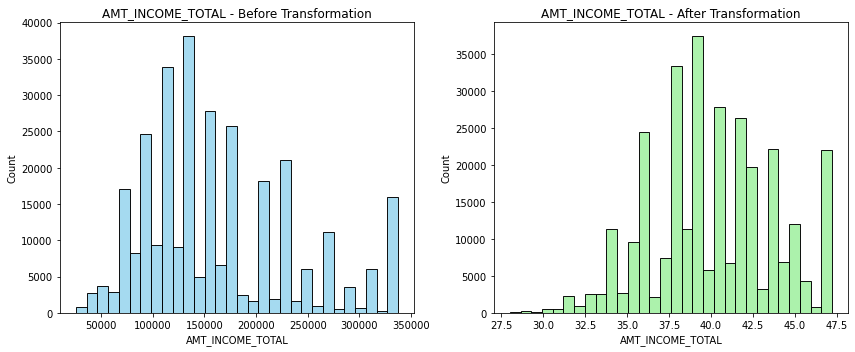

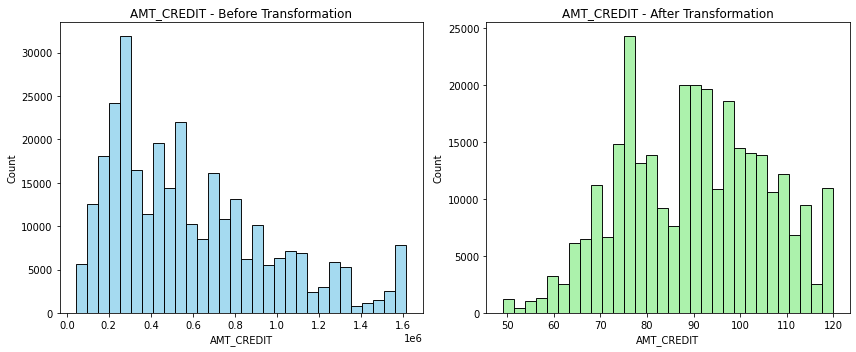

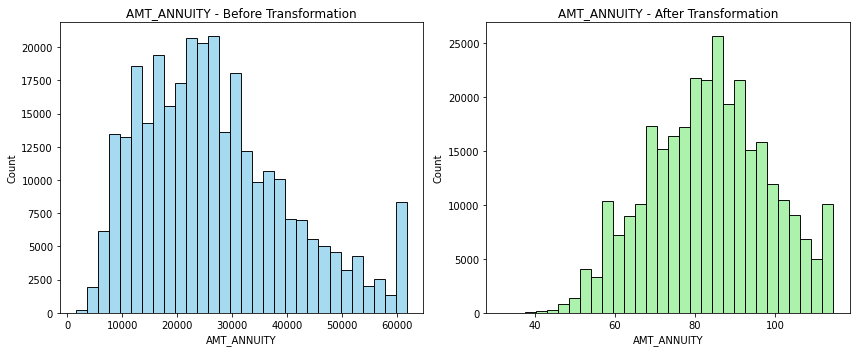

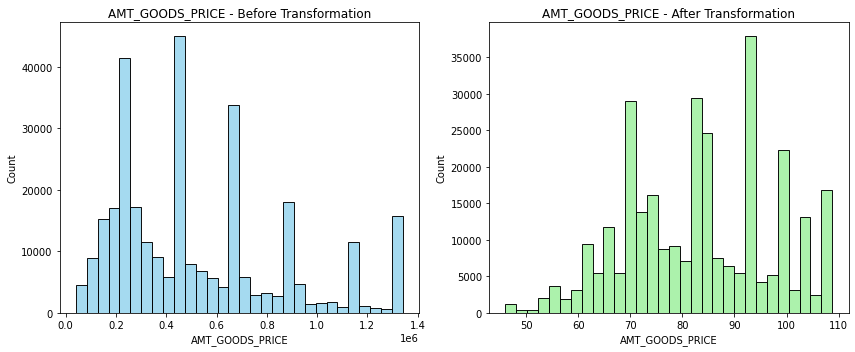

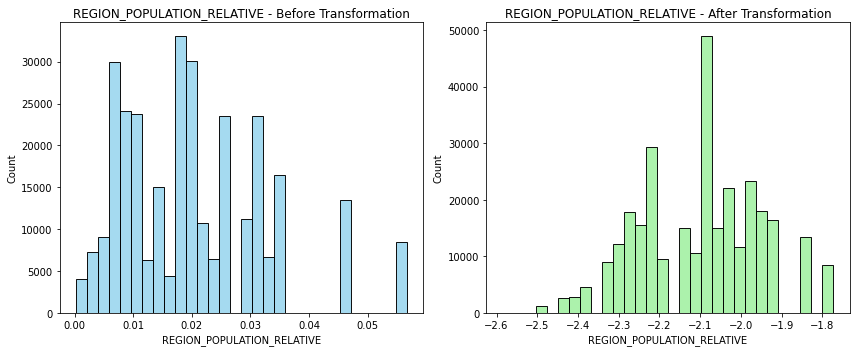

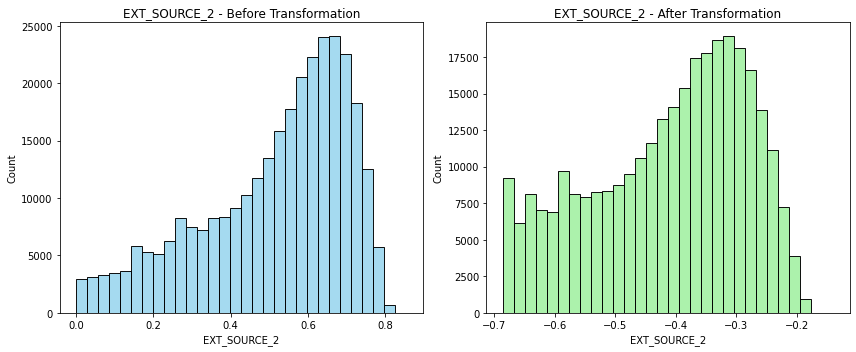

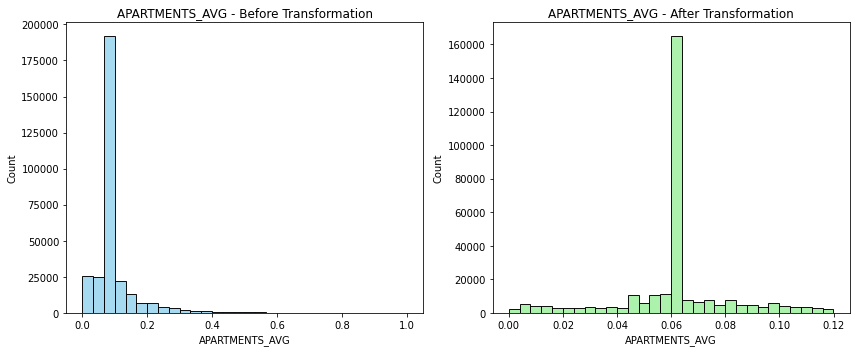

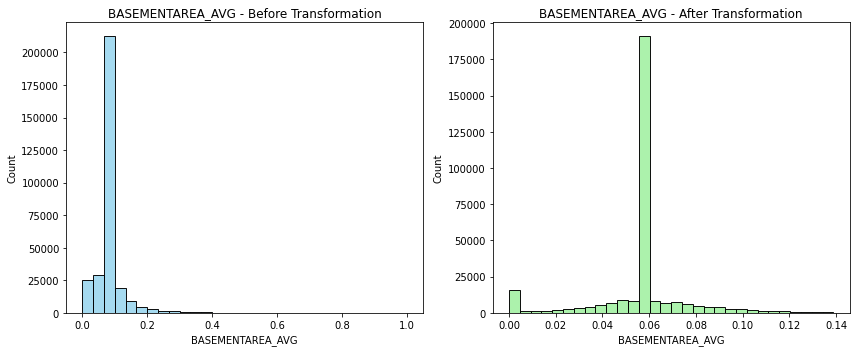

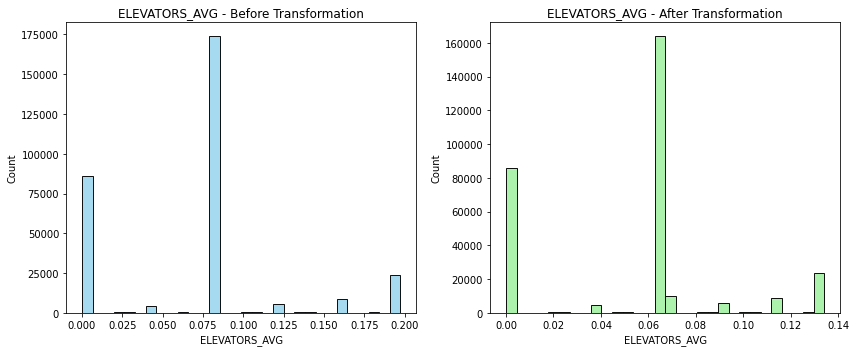

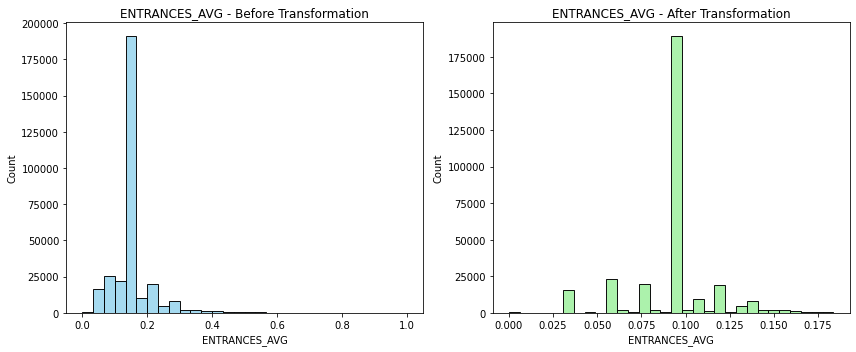

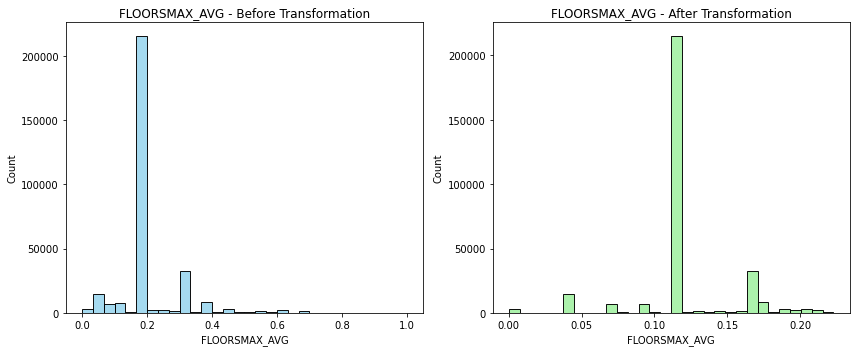

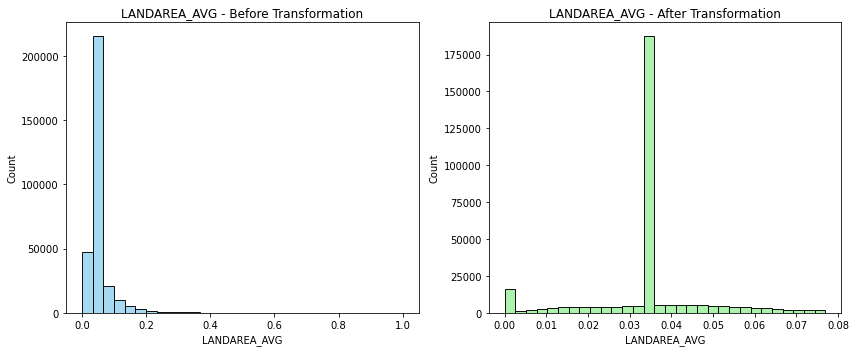

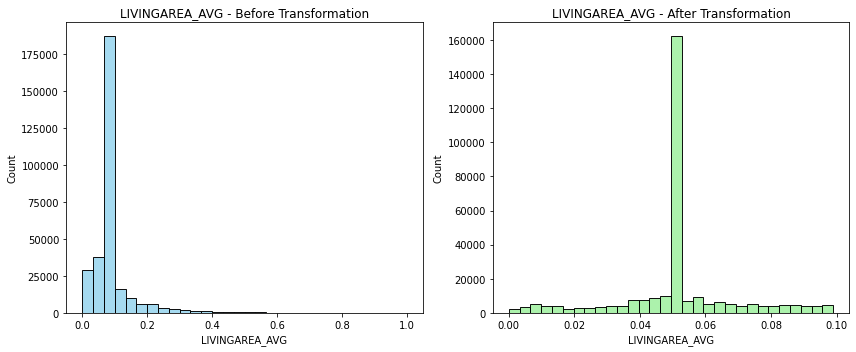

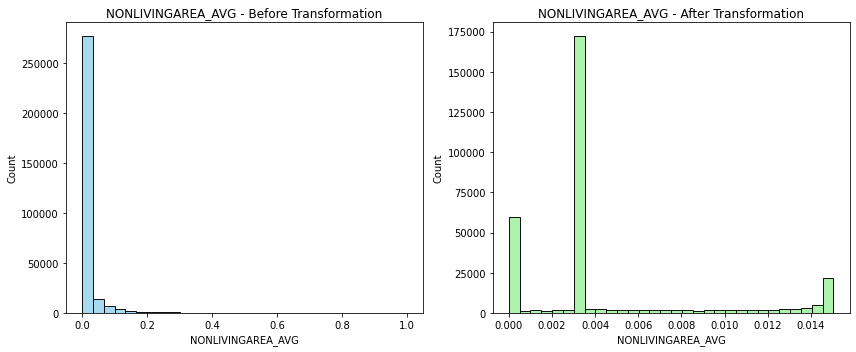

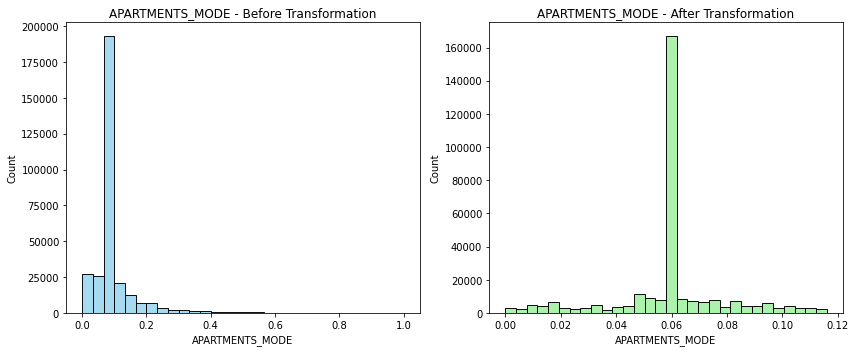

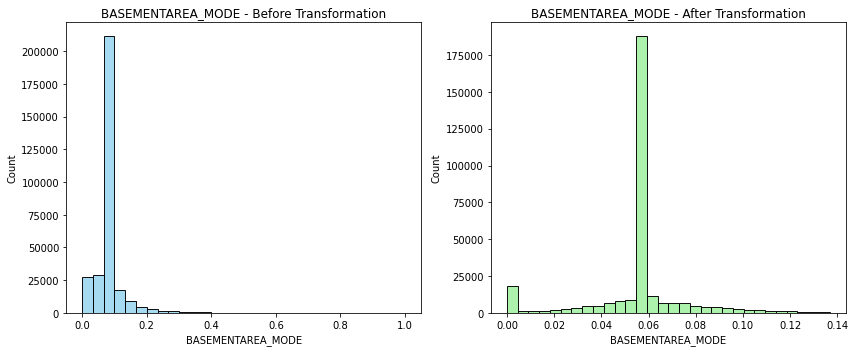

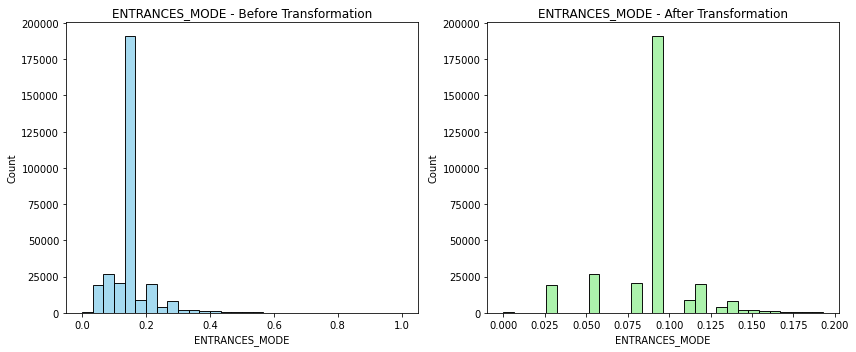

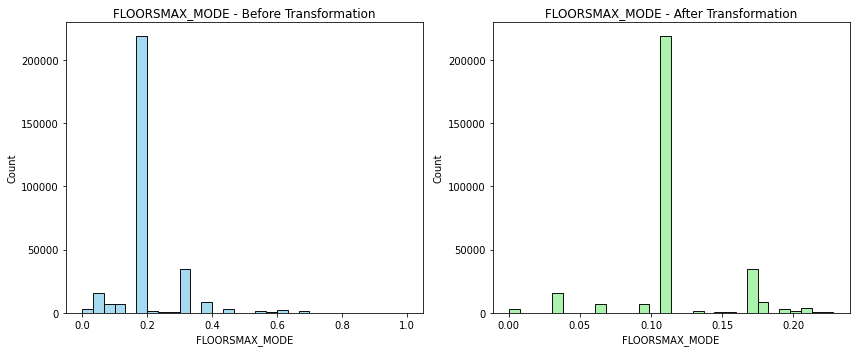

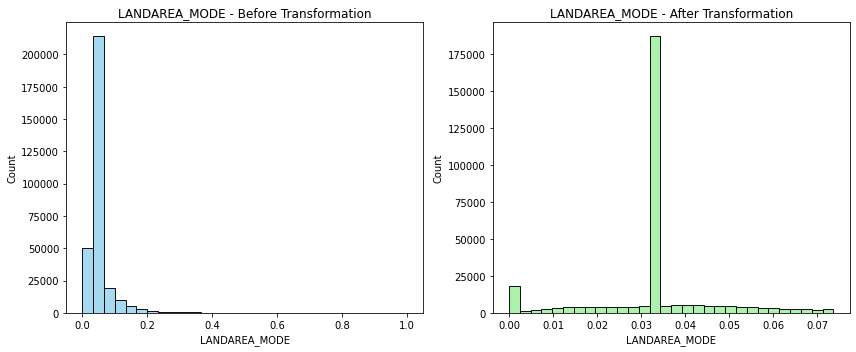

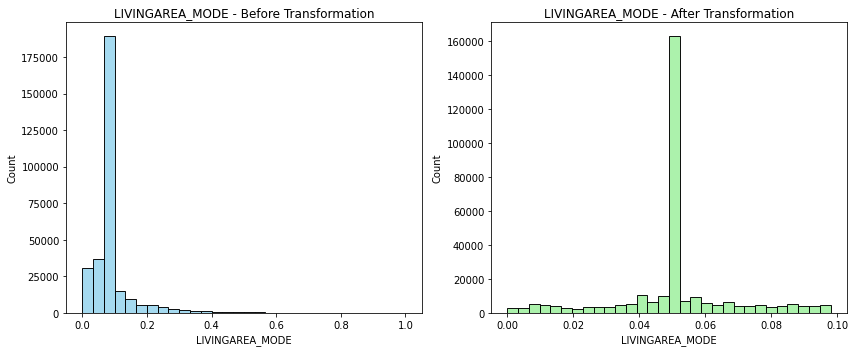

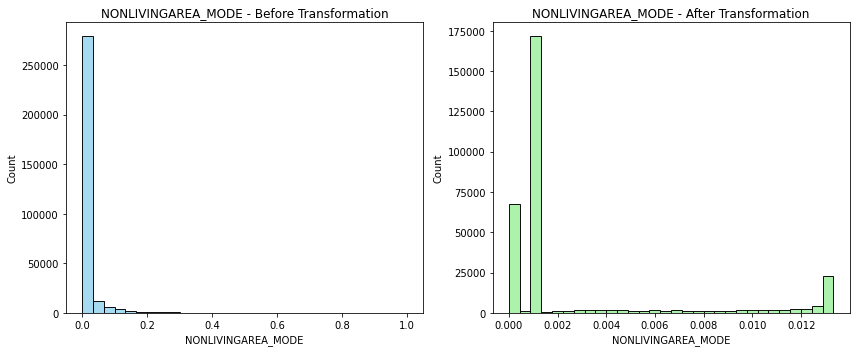

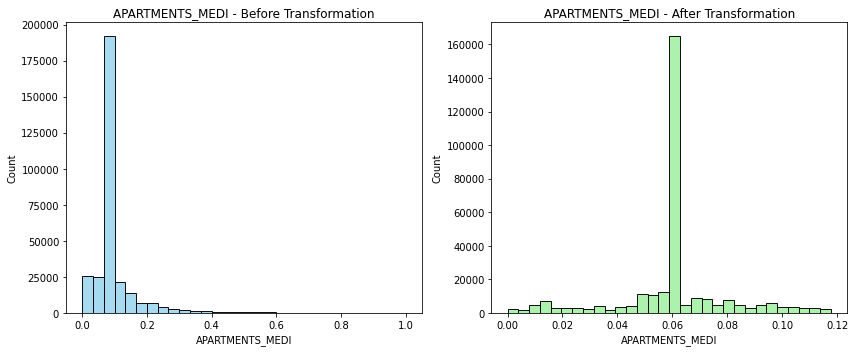

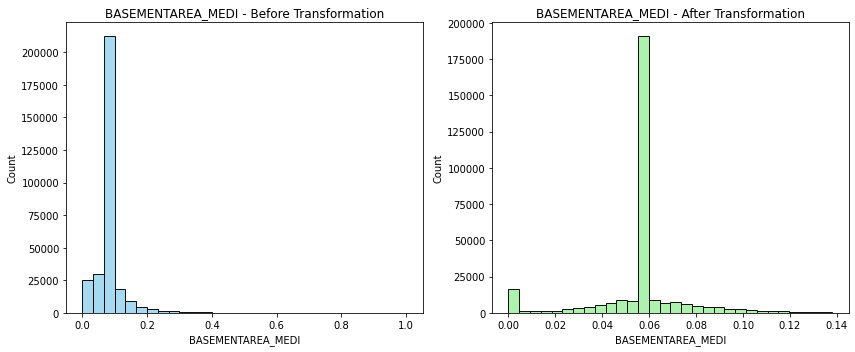

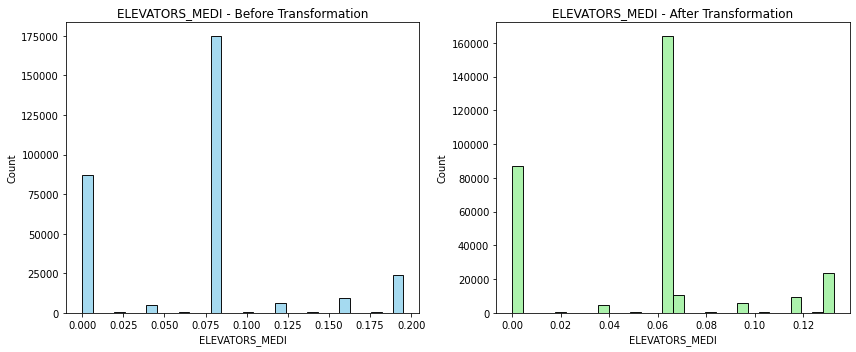

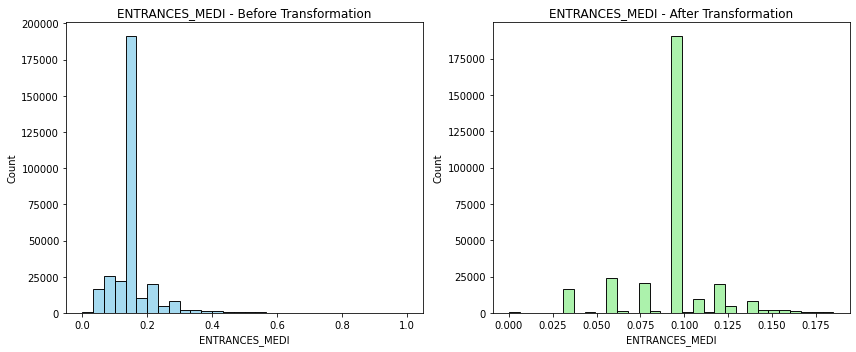

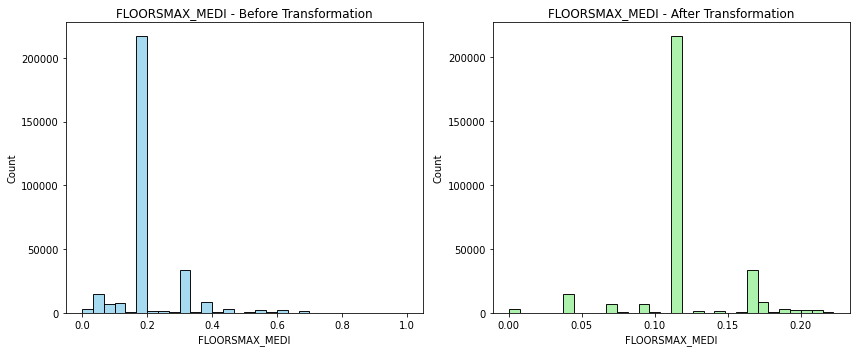

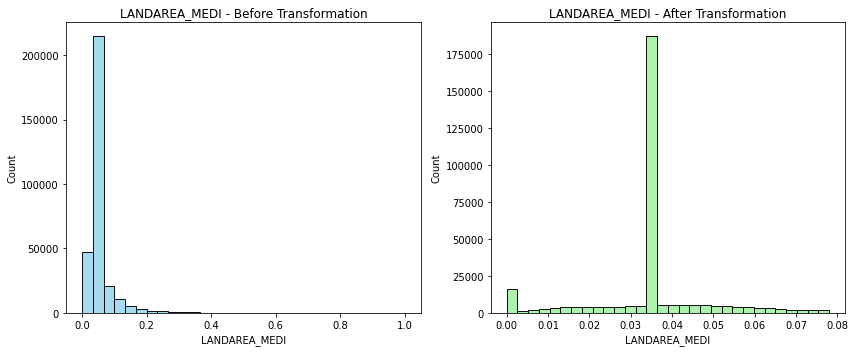

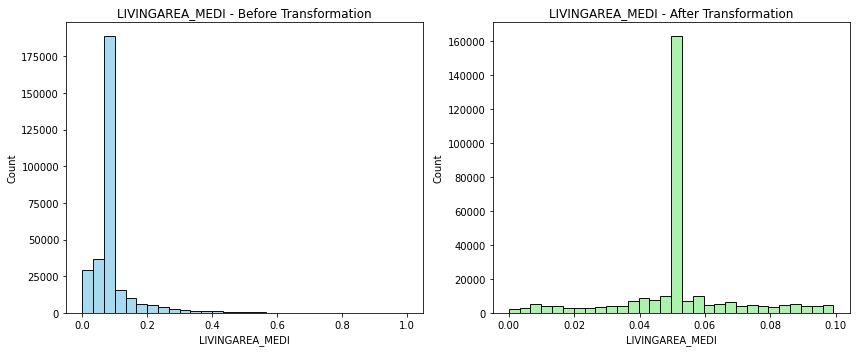

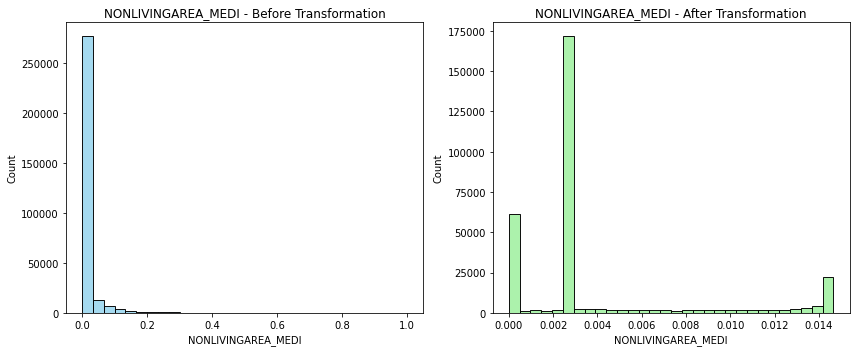

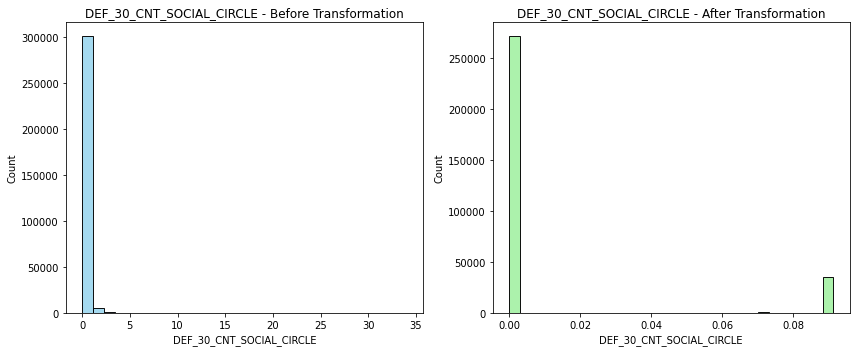

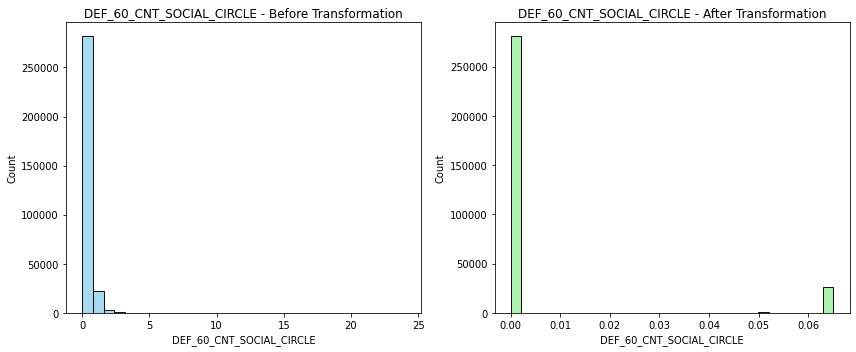

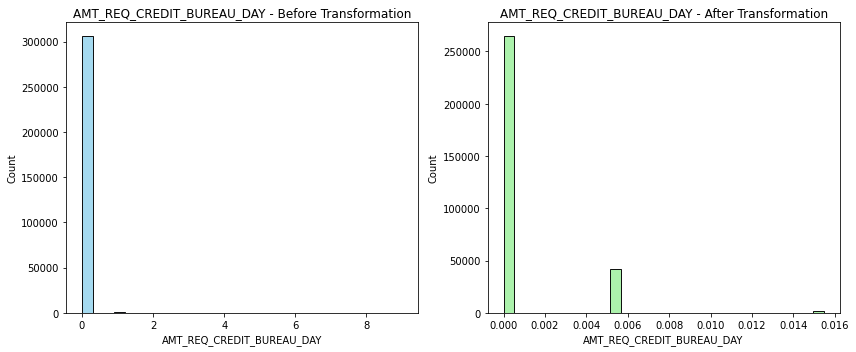

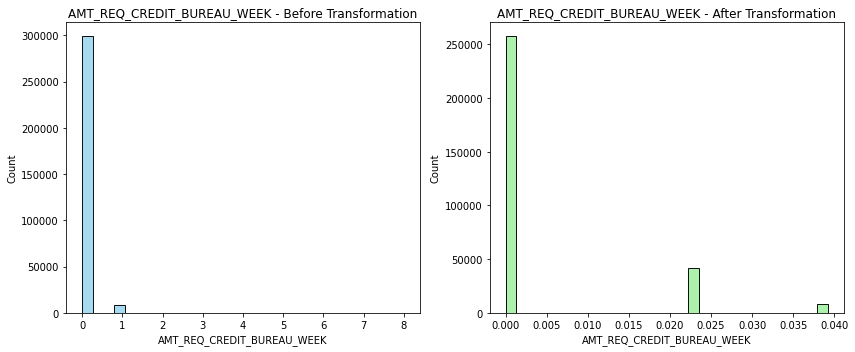

In [33]:
plot_histograms_before_after(df_cleaned, df_skew_fixed, report_train['Column'].tolist())


### After applying the transformation, the data appears to approach a nearly normal distribution.

### Encoding Categorical Variables




1. **Label Encoding**:
   - **Why Use It:** Used for binary or ordinal categorical features. It converts categories into numerical values ( 0 and 1 for binary features like (FLAG_OWN_CAR and FLAG_OWN_REALTY ), or captures meaningful order in ordinal features ( EMERGENCYSTATE_MODE).

2. **One-Hot Encoding**:
   - **Why Use It:** Applied to nominal categorical features with no inherent order. It creates new binary columns for each category to prevent incorrect numerical relationships (like, NAME_CONTRACT_TYPE, CODE_GENDER, OCCUPATION_TYPE). The drop_first=True argument avoids multicollinearity by eliminating one dummy variable.

3. **Ordinal Encoding**:
   - **Why Use It:** Used for categorical features with a clear order. It maps categories to numerical values reflecting their order (NAME_EDUCATION_TYPE with values from 1 to 5).


In [28]:
cat_vars = df_scaled.select_dtypes(include=['object', 'category']).columns
print(f"Categorical Variables: {cat_vars}")

Categorical Variables: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [30]:
cat_vars = df_scaled.select_dtypes(include=['object', 'category']).columns

for col in cat_vars:
    print(f"Unique values in {col}: {df_scaled[col].unique()}")

Unique values in NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Unique values in CODE_GENDER: ['M' 'F' 'XNA']
Unique values in FLAG_OWN_CAR: ['N' 'Y']
Unique values in FLAG_OWN_REALTY: ['Y' 'N']
Unique values in NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Unique values in NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Unique values in NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Unique values in NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Unique values in OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'S

In [38]:
label_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
label_encoder = LabelEncoder()
for col in label_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column {col} not found in DataFrame.")
one_hot_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 
                   'NAME_INCOME_TYPE', 
                   'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                   'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)  
ordinal_map = {
    'NAME_EDUCATION_TYPE': {
        'Lower secondary': 1,
        'Secondary / secondary special': 2,
        'Incomplete higher': 3,
        'Higher education': 4,
        'Academic degree': 5
    },
    'NAME_FAMILY_STATUS': {
        'Single / not married': 1,
        'Married': 2,
        'Civil marriage': 3,
        'Widow': 4,
        'Separated': 5,
        'Unknown': 6
    }
}
for col, mapping in ordinal_map.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
    else:
        print(f"Column {col} not found in DataFrame.")

In [39]:
df.head()

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1             0                1           0.0   
1      100003       0             0                0           0.0   
2      100004       0             1                1           0.0   
3      100006       0             0                1           0.0   
4      100007       0             0                1           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0         42.694272   85.391697    83.663137        78.627051   
1         45.190998  113.594437    94.943403       104.386403   
2         34.235493   64.827514    53.317029        62.172915   
3         39.381827   79.996264    89.122432        75.481789   
4         38.558827   90.454691    80.222939        86.240377   

   NAME_EDUCATION_TYPE  ...  ORGANIZATION_TYPE_University  \
0                    2  ...                         False   
1                    4  ...                         False   
2                    2  ...                         False   
3                    2  ...                         False   
4                    2  ...                         False   

   ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_specific housing  \
0                  False                            False   
1                  False                            False   
2                  False                            False   
3                  False                            False   
4                  False                            False   

   HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Mixed  \
0                          False                     False   
1                          False                     False   
2                          False                     False   
3                          False                     False   
4                          False                     False   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                     False                             True   
1                     False                            False   
2                      True                            False   
3                      True                            False   
4                      True                            False   

   WALLSMATERIAL_MODE_Wooden  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 204 columns]

### Scaling
- To make all features are treated equally 
- The scale_test function uses the scaler object derived from the training set

In [40]:
def scale_train(df, exclude_cols=['SK_ID_CURR', 'TARGET']):
    df_scaled = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    columns_to_scale = [col for col in numeric_columns if col not in exclude_cols]
    scaler = MinMaxScaler()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df_scaled, scaler

def scale_test(df, scaler, exclude_cols=['SK_ID_CURR', 'TARGET']):
    df_scaled = df.copy()
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    columns_to_scale = [col for col in numeric_columns if col not in exclude_cols]

    df_scaled[columns_to_scale] = scaler.transform(df[columns_to_scale])

    return df_scaled


df_train_scaled, scaler = scale_train(df_train)

### For Testset

In [2]:
application_test = pd.read_csv('application_test.csv')

### Handle missing using imputation parameters from the training set to handle missing values in the test set.

In [4]:
df_test_imputed = handle_missing_values_test(application_test, imputation_params)

Dropping columns with >60% missing values: ['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']
Feature 'AMT_ANNUITY' is right-skewed. Imputing with median = 26199.0000
Categorical feature 'NAME_TYPE_SUITE': Imputing with mode = Unaccompanied
Categorical feature 'OCCUPATION_TYPE': Imputing with mode = Laborers
Feature 'EXT_SOURCE_1' is symmetric. Imputing with mean = 0.5012
Feature 'EXT_SOURCE_2' is symmetric. Imputing with mean = 0.5180
Feature 'EXT_SOURCE_3' is symmetric. Imputing with mean = 0.5001
Feature 'APARTMENTS_AVG' is right-skewed. Imputing with median = 0.0928
Feature 'BASEMENTAREA_AVG' is right-skewed. Imputing with median = 0.0781
Feature 'YEARS_BEGINEXPLUATATION_AVG'

### Test set processing (using parameters from train set)


In [6]:
df_test_processed, outlier_report_test = cap_outliers_test(df_test_imputed, capping_params)


Column: AMT_ANNUITY
   - Unique values: 7491
   - Min: 2295.0000
   - Max: 180576.0000
   - Range: 178281.0000
   - Q1: 17973.0000, Q3: 37390.5000, IQR: 19417.5000
   - Lower Bound: 0.0000, Upper Bound: 66516.7500
   - Outliers Before Capping: 1173
   - Outliers After Capping: 0

Column: AMT_CREDIT
   - Unique values: 2937
   - Min: 45000.0000
   - Max: 2245500.0000
   - Range: 2200500.0000
   - Q1: 260640.0000, Q3: 675000.0000, IQR: 414360.0000
   - Lower Bound: 0.0000, Upper Bound: 1296540.0000
   - Outliers Before Capping: 2350
   - Outliers After Capping: 0

Column: AMT_GOODS_PRICE
   - Unique values: 677
   - Min: 45000.0000
   - Max: 2245500.0000
   - Range: 2200500.0000
   - Q1: 225000.0000, Q3: 630000.0000, IQR: 405000.0000
   - Lower Bound: 0.0000, Upper Bound: 1237500.0000
   - Outliers Before Capping: 2122
   - Outliers After Capping: 0

Column: AMT_INCOME_TOTAL
   - Unique values: 606
   - Min: 26941.5000
   - Max: 4410000.0000
   - Range: 4383058.5000
   - Q1: 112500.0000

   - Min: 0.0000
   - Max: 0.0000
   - Range: 0.0000
   Skipped: Too few unique values.

Column: FLAG_DOCUMENT_3
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_4
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_5
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_6
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_7
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_8
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_DOCUMENT_9
   - Unique values: 2
   - Min: 0.0000
   - Max: 1.0000
   - Range: 1.0000
   Skipped: Binary column.

Column: FLAG_EMAIL
   

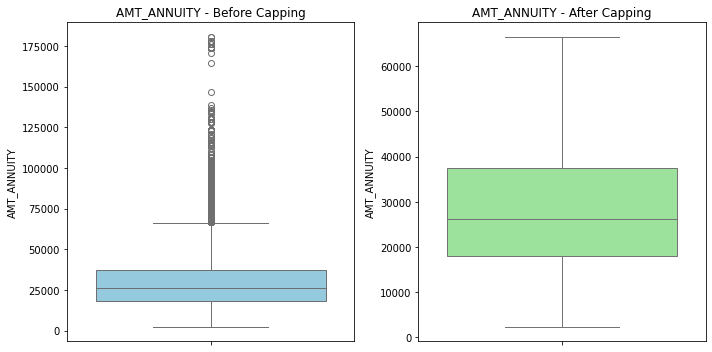

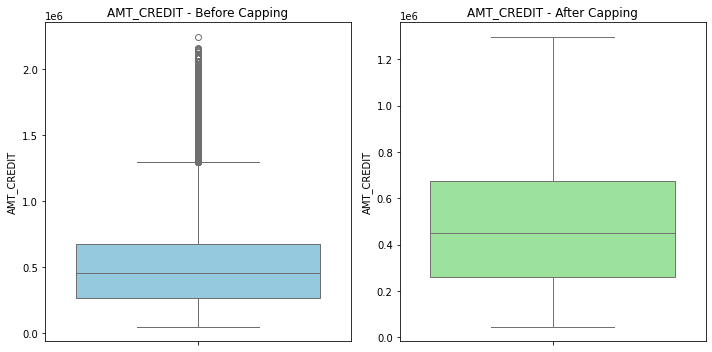

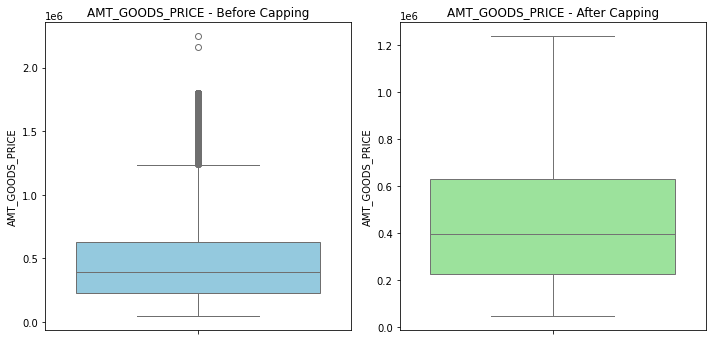

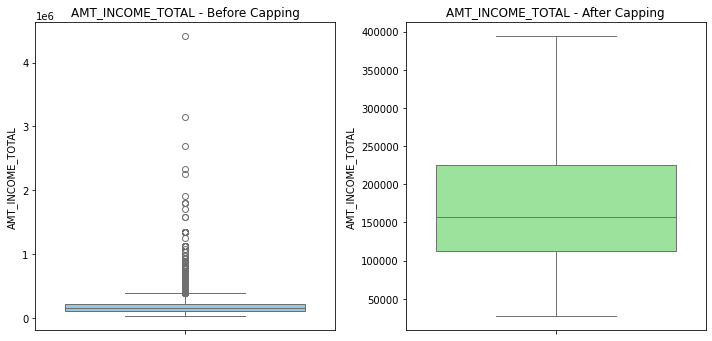

In [11]:
plot_boxplots_before_after(application_test, df_test_processed, list(report.keys())[:4])


In [13]:
df_test_processed, report_test = fix_skewed_columns_test(df_test, transformation_params)


C:\Users\hamad\AppData\Local\Temp\ipykernel_13712\896350507.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].update(transformed)


In [14]:
report_test

Column  Skew Before  Skew After      Method
0             AMT_INCOME_TOTAL         0.98        0.00      boxcox
1                   AMT_CREDIT         0.95        0.03      boxcox
2                  AMT_ANNUITY         0.74        0.02      boxcox
3              AMT_GOODS_PRICE         1.07        0.02      boxcox
4   REGION_POPULATION_RELATIVE         0.87        0.05      boxcox
5                 EXT_SOURCE_2        -0.77        0.35      boxcox
6               APARTMENTS_AVG        -0.50        0.11      boxcox
7             BASEMENTAREA_AVG         5.52        0.31  yeojohnson
8                ELEVATORS_AVG         0.60        0.03  yeojohnson
9                ENTRANCES_AVG         3.69        0.18  yeojohnson
10               FLOORSMAX_AVG         2.29        0.15  yeojohnson
11                LANDAREA_AVG         6.94        0.15  yeojohnson
12           NONLIVINGAREA_AVG         9.43        1.45  yeojohnson
13           BASEMENTAREA_MODE         5.22        0.29  yeojohnson
14              ENTRANCES_MODE         3.61        0.17  yeojohnson
15              FLOORSMAX_MODE         2.30        0.16  yeojohnson
16               LANDAREA_MODE         6.80        0.12  yeojohnson
17          NONLIVINGAREA_MODE         9.37        1.78  yeojohnson
18           BASEMENTAREA_MEDI         5.46        0.31  yeojohnson
19              ELEVATORS_MEDI         0.60        0.03  yeojohnson
20              ENTRANCES_MEDI         3.67        0.18  yeojohnson
21              FLOORSMAX_MEDI         2.30        0.15  yeojohnson
22               LANDAREA_MEDI         6.78        0.15  yeojohnson
23          NONLIVINGAREA_MEDI         9.35        1.56  yeojohnson

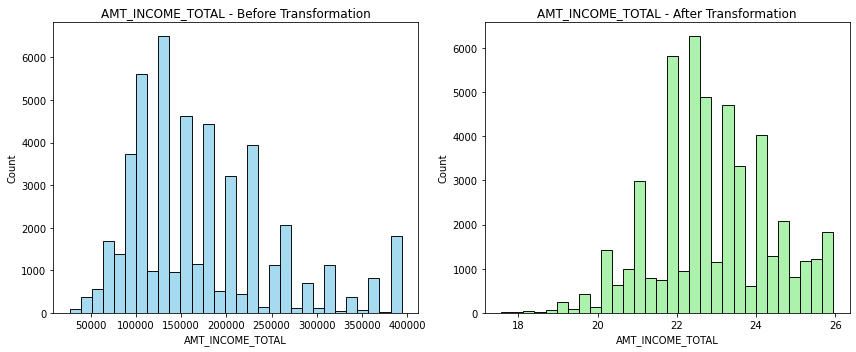

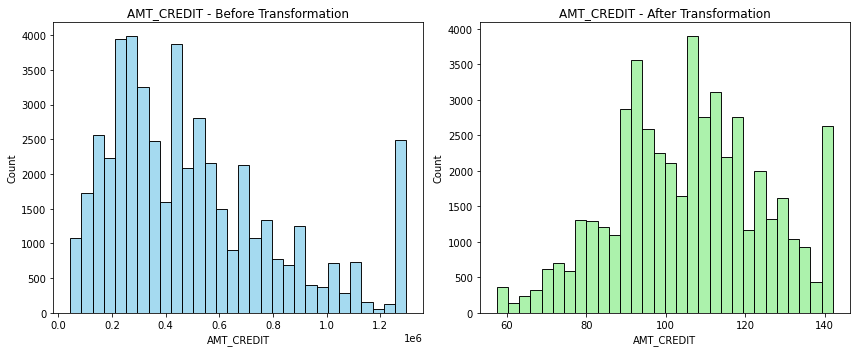

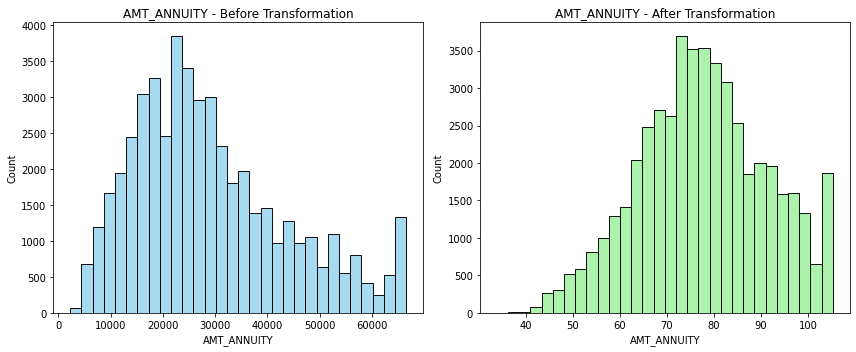

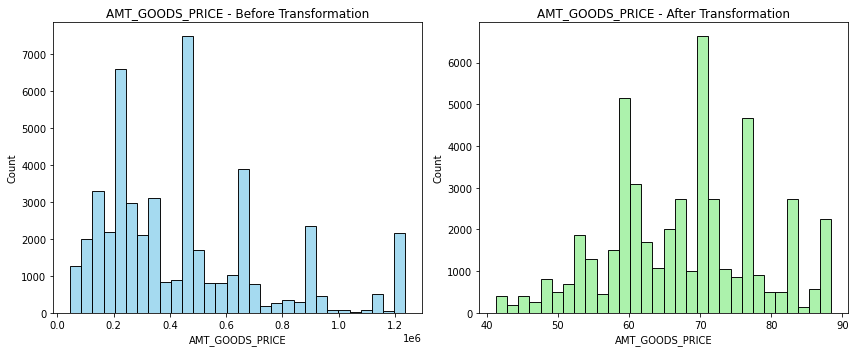

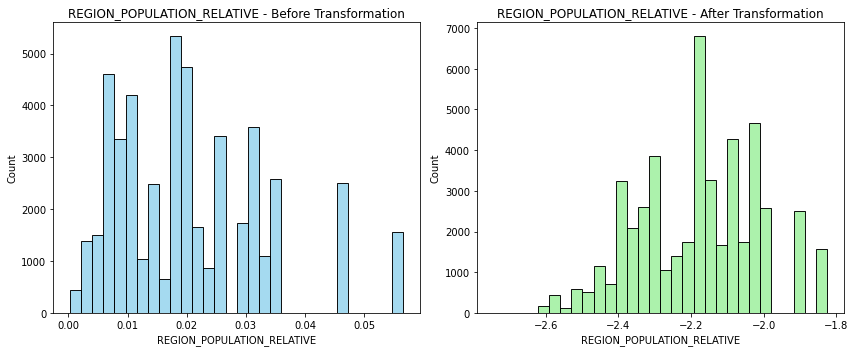

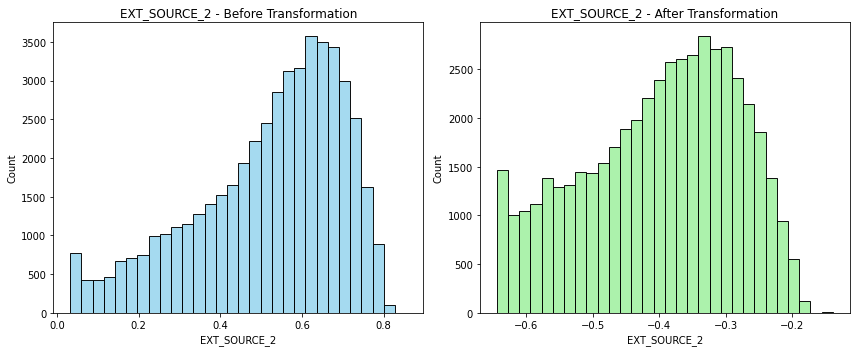

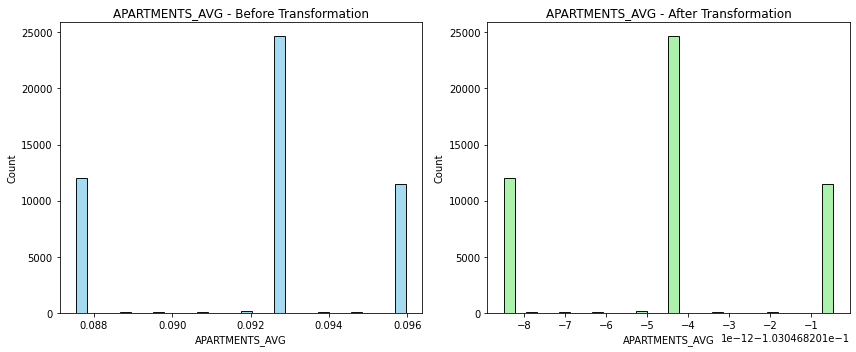

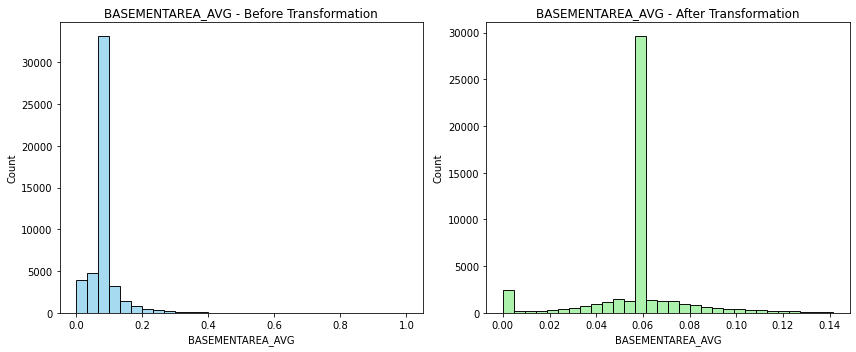

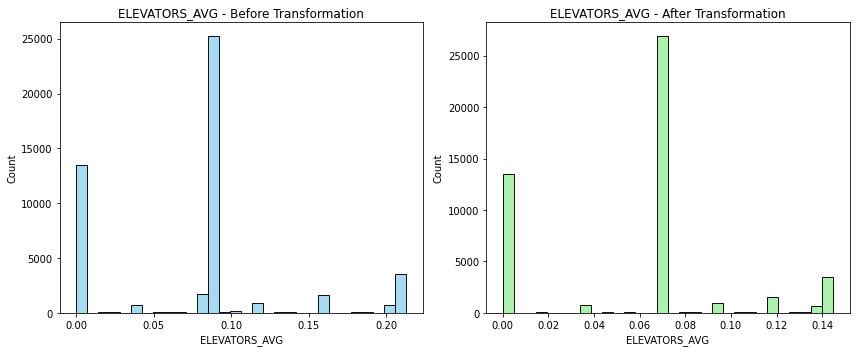

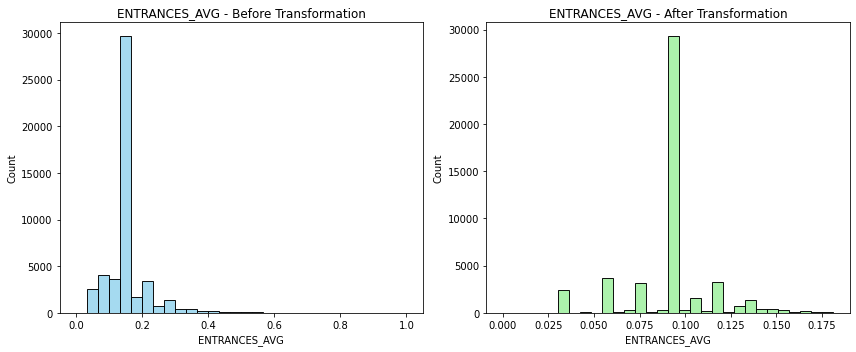

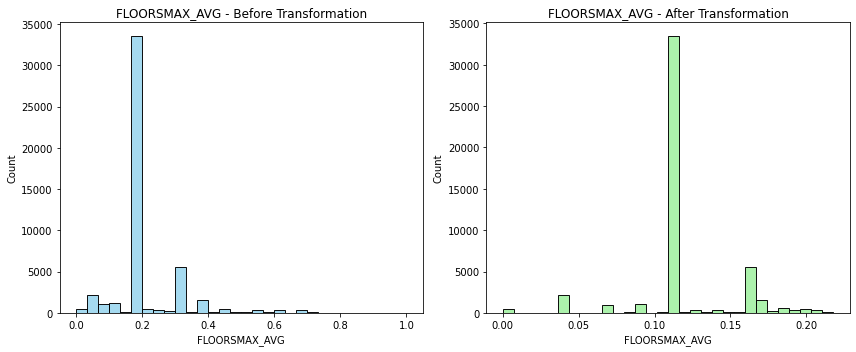

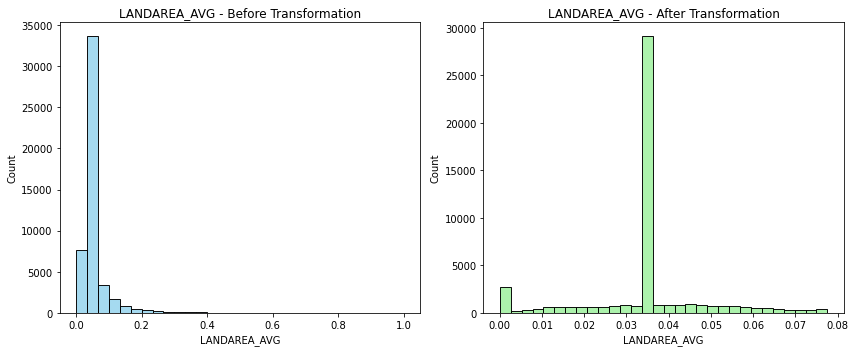

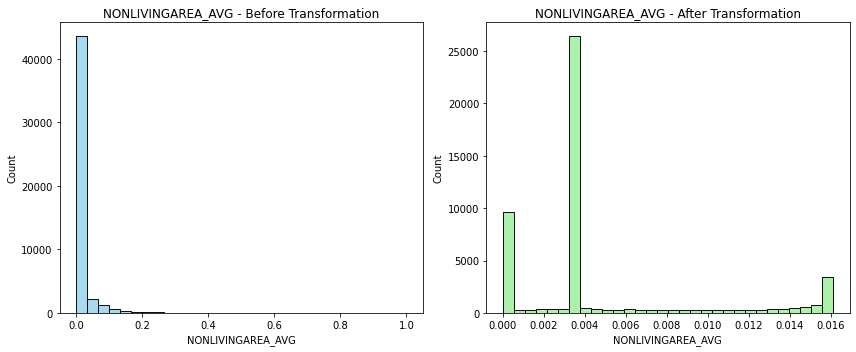

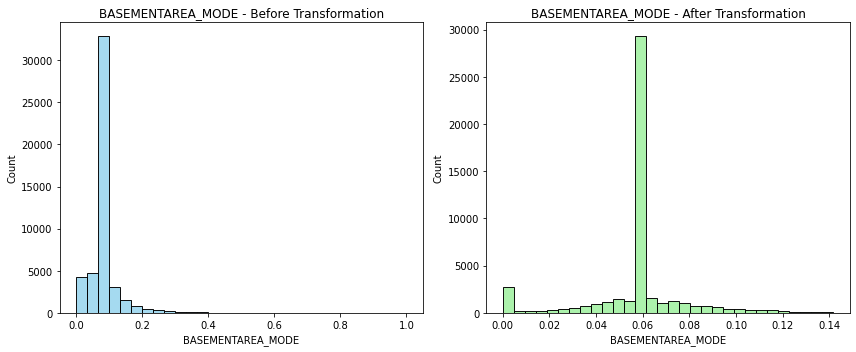

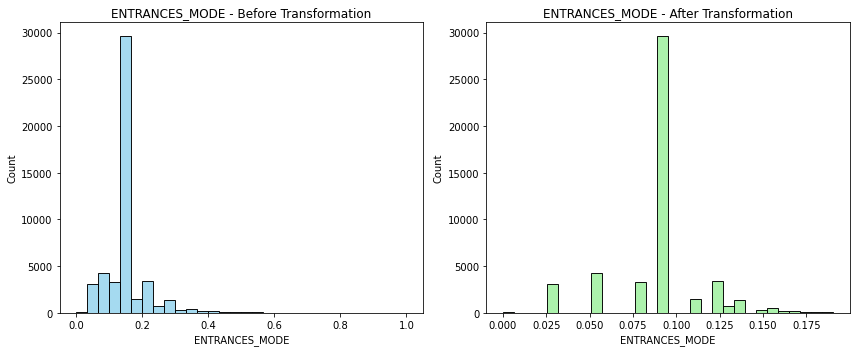

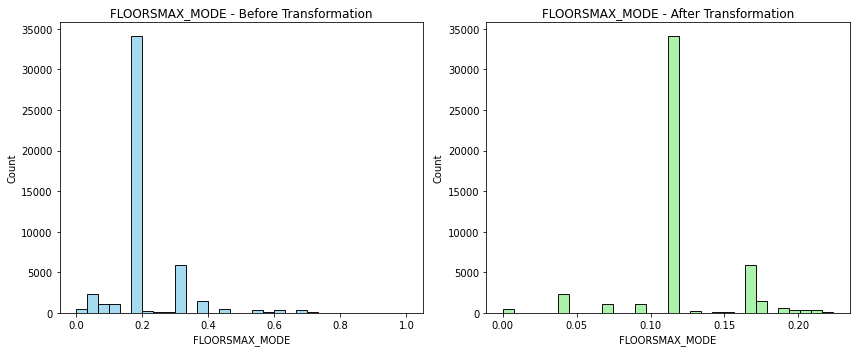

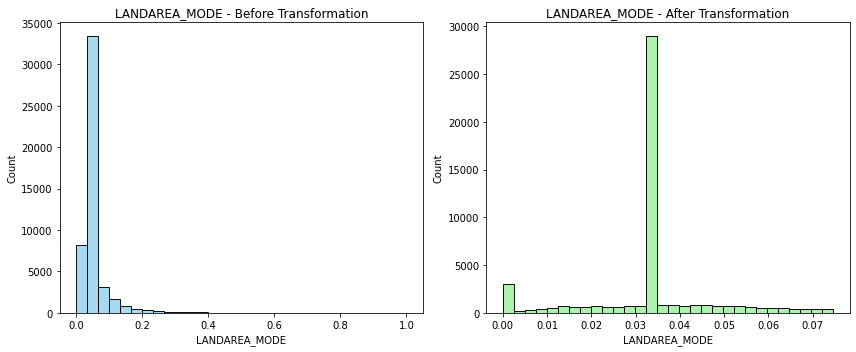

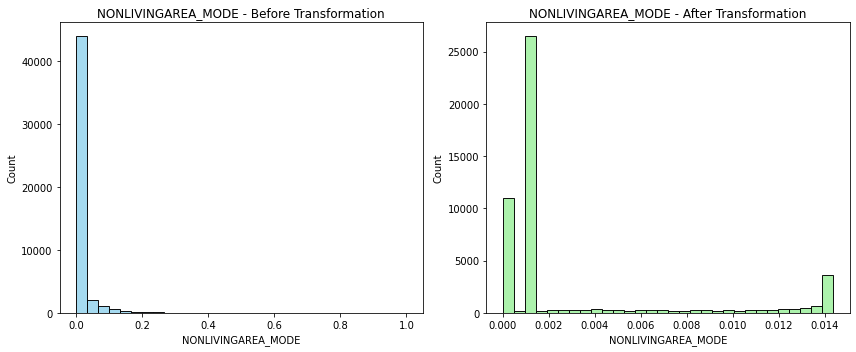

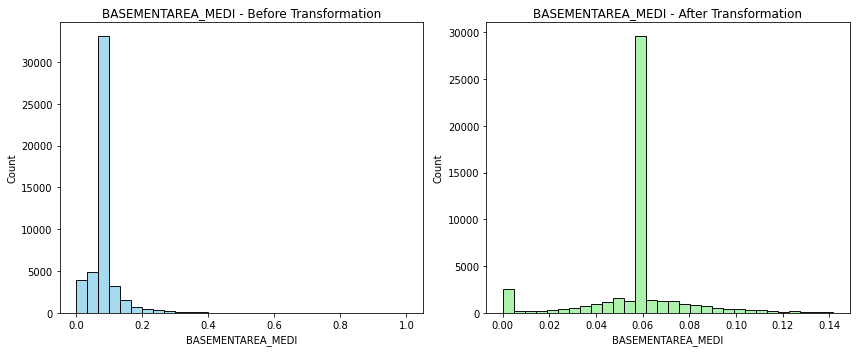

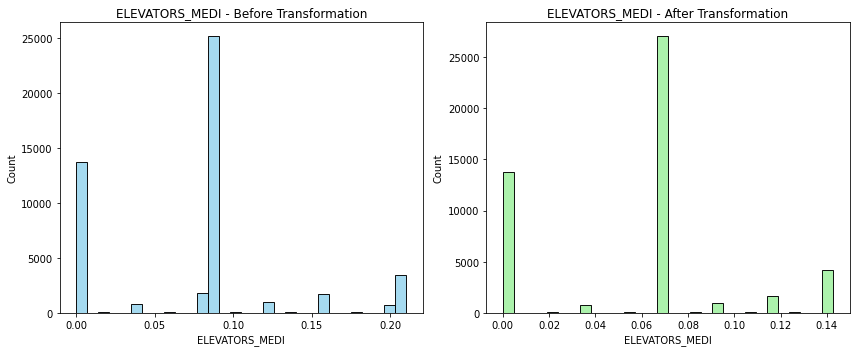

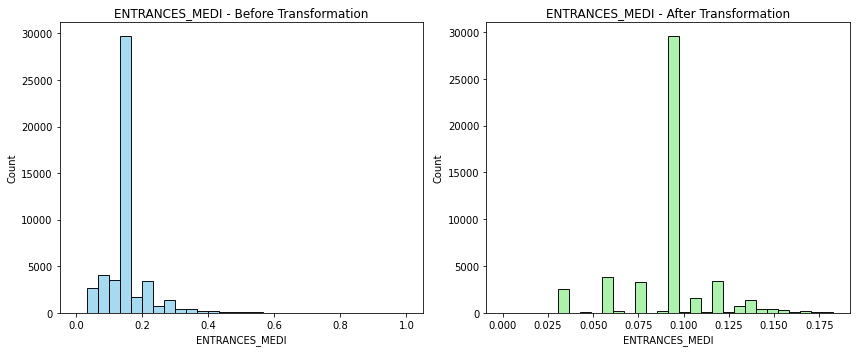

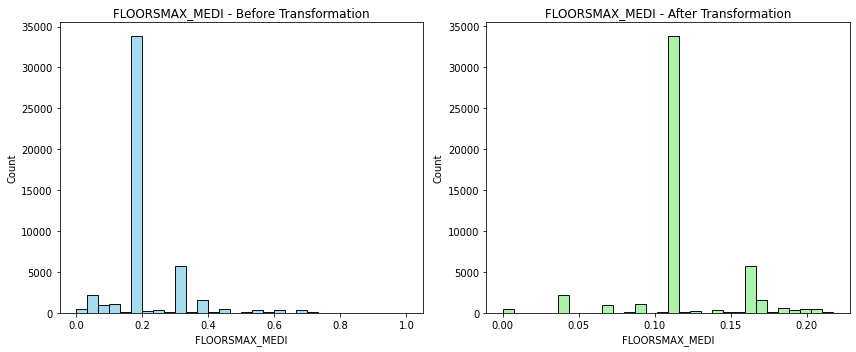

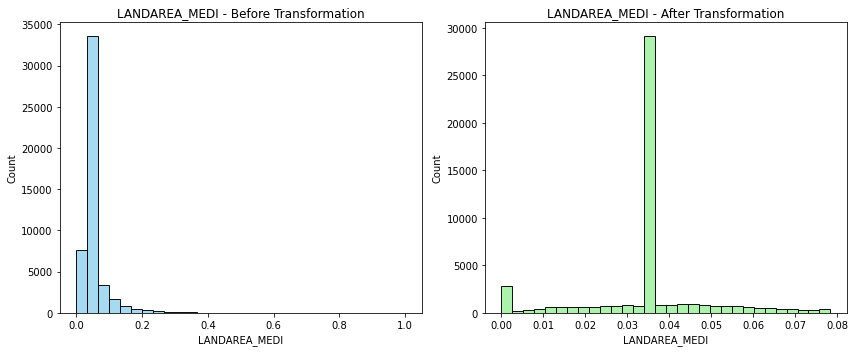

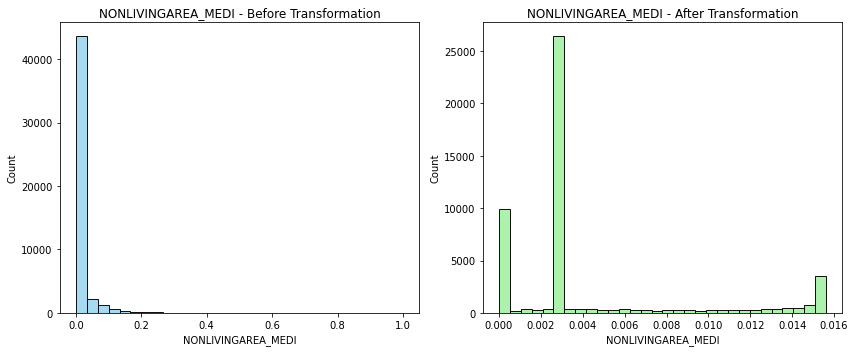

In [16]:
plot_histograms_before_after(df_cleaned, df_skew_fixed, skew_report['Column'].tolist())


### Check unique values for each categorical variable


In [19]:
label_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
label_encoder = LabelEncoder()
for col in label_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column {col} not found in DataFrame.")
one_hot_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 
                   'NAME_INCOME_TYPE', 
                   'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                   'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)  
ordinal_map = {
    'NAME_EDUCATION_TYPE': {
        'Lower secondary': 1,
        'Secondary / secondary special': 2,
        'Incomplete higher': 3,
        'Higher education': 4,
        'Academic degree': 5
    },
    'NAME_FAMILY_STATUS': {
        'Single / not married': 1,
        'Married': 2,
        'Civil marriage': 3,
        'Widow': 4,
        'Separated': 5,
        'Unknown': 6
    }
}
for col, mapping in ordinal_map.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)
    else:
        print(f"Column {col} not found in DataFrame.")




In [20]:
df.head()

SK_ID_CURR  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100001             0                1           0.0         22.336180   
1      100005             0                1           0.0         21.359206   
2      100013             1                1           0.0         23.659192   
3      100028             0                1           2.0         25.162270   
4      100038             1                0           1.0         23.269417   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_EDUCATION_TYPE  \
0  114.108782    71.399801        70.400099                    4   
1   88.789742    67.495258        57.087409                    2   
2  118.873755   105.273550        75.978615                    4   
3  142.016477    95.211984        88.452953                    2   
4  117.033425    82.756805        75.855550                    2   

   NAME_FAMILY_STATUS  ...  ORGANIZATION_TYPE_University  \
0                   2  ...                         False   
1                   2  ...                         False   
2                   2  ...                         False   
3                   2  ...                         False   
4                   2  ...                         False   

   ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_specific housing  \
0                  False                            False   
1                  False                            False   
2                  False                            False   
3                  False                            False   
4                  False                            False   

   HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Mixed  \
0                          False                     False   
1                          False                     False   
2                          False                     False   
3                          False                     False   
4                          False                     False   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                     False                             True   
1                      True                            False   
2                      True                            False   
3                      True                            False   
4                      True                            False   

   WALLSMATERIAL_MODE_Wooden  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 201 columns]

### Scaling


- Scaling the test set using the same scaler from the train set


In [21]:
df_test_scaled = scale_test(df_test, scaler)

In [30]:
df_scaled

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0           100002       1           0.0              1.0           0.0   
1           100003       0           0.0              0.0           0.0   
2           100004       0           1.0              1.0           0.0   
3           100006       0           0.0              1.0           0.0   
4           100007       0           0.0              1.0           0.0   
...            ...     ...           ...              ...           ...   
307506      456251       0           0.0              0.0           0.0   
307507      456252       0           0.0              1.0           0.0   
307508      456253       0           0.0              1.0           0.0   
307509      456254       1           0.0              1.0           0.0   
307510      456255       0           0.0              0.0           0.0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0.764465    0.512542     0.626346         0.519580   
1               0.894520    0.910094     0.763152         0.929850   
2               0.323845    0.222665     0.258312         0.257515   
3               0.591919    0.436487     0.692556         0.469486   
4               0.549049    0.583911     0.584624         0.640838   
...                  ...         ...          ...              ...   
307506          0.656082    0.380291     0.665277         0.390398   
307507          0.347457    0.395546     0.402234         0.390398   
307508          0.643884    0.674705     0.696201         0.685346   
307509          0.691025    0.484768     0.558483         0.491146   
307510          0.656082    0.673378     0.896006         0.735406   

        NAME_EDUCATION_TYPE  ...  ORGANIZATION_TYPE_University  \
0                      0.25  ...                         False   
1                      0.75  ...                         False   
2                      0.25  ...                         False   
3                      0.25  ...                         False   
4                      0.25  ...                         False   
...                     ...  ...                           ...   
307506                 0.25  ...                         False   
307507                 0.25  ...                         False   
307508                 0.75  ...                         False   
307509                 0.25  ...                         False   
307510                 0.75  ...                         False   

        ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_specific housing  \
0                       False                            False   
1                       False                            False   
2                       False                            False   
3                       False                            False   
4                       False                            False   
...                       ...                              ...   
307506                  False                            False   
307507                   True                            False   
307508                  False                            False   
307509                  False                            False   
307510                  False                            False   

        HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Mixed  \
0                               False                     False   
1                               False                     False   
2                               False                     False   
3                               False                     False   
4                               False                     False   
...                               ...                       ...   
307506                          False                     False   
307507                          False                     False   
307508                          False                     False   
307509    

In [33]:
train_df.shape

(307511, 202)

In [35]:
test_df.shape

(48744, 201)

## bureau

### Load and Inspect `bureau` Data


In [3]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

### Missing Value Analysis


In [4]:
missing_values = bureau.isnull().sum()
missing_percent = (missing_values / len(bureau)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})

missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [5]:
missing_df

Missing Values  Percent Missing
AMT_ANNUITY                    1226791        71.473490
AMT_CREDIT_MAX_OVERDUE         1124488        65.513264
DAYS_ENDDATE_FACT               633653        36.916958
AMT_CREDIT_SUM_LIMIT            591780        34.477415
AMT_CREDIT_SUM_DEBT             257669        15.011932
DAYS_CREDIT_ENDDATE             105553         6.149573
AMT_CREDIT_SUM                      13         0.000757

In [6]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

### Correlation Heatmap of Numeric Columns


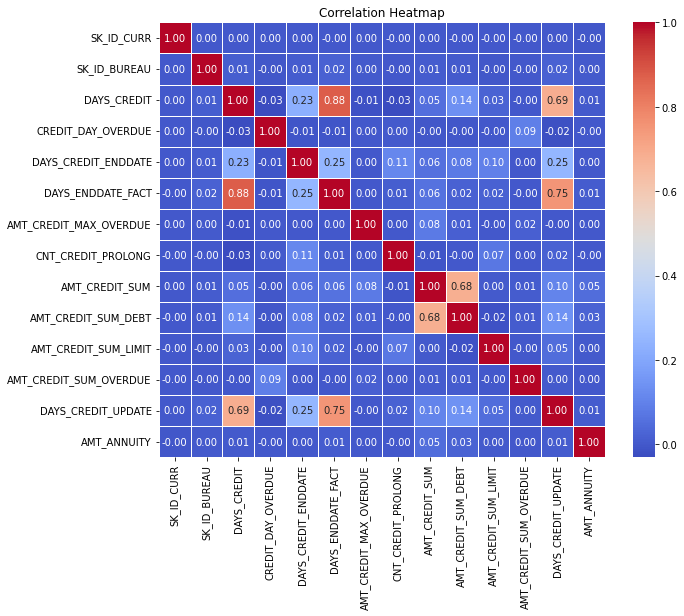

In [7]:
numeric_df = bureau.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
corr_matrix

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_

### Drop Columns with More Than 60% Missing Values


In [3]:
print("Step 1: Dropping columns with more than 60% missing values.")
missing_percent = bureau.isnull().mean() * 100
columns_to_drop = missing_percent[missing_percent > 60].index
bureau.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop.tolist()}")

Step 1: Dropping columns with more than 60% missing values.
Dropped columns: ['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY']


### Impute Missing Values (Categorical and Numerical)
- Median For skewness data
- Mean for not skewed


In [4]:
print("Step 2: Imputing missing values for the remaining columns.")
for column in bureau.columns:
    if bureau[column].dtype == 'object':  
        bureau[column].fillna(bureau[column].mode()[0], inplace=True)
        print(f"Imputed missing values in categorical column: {column}")
    else: 
        if column == 'DAYS_ENDDATE_FACT':
            continue
        
        column_skew = skew(bureau[column].dropna())
        if column_skew > 1 or column_skew < -1:
            bureau[column].fillna(bureau[column].median(), inplace=True)
            print(f"Imputed missing values in skewed numerical column: {column} (using median)")
        else:
            bureau[column].fillna(bureau[column].mean(), inplace=True)
            print(f"Imputed missing values in numerical column: {column} (using mean)")



Step 2: Imputing missing values for the remaining columns.
Imputed missing values in numerical column: SK_ID_CURR (using mean)
Imputed missing values in numerical column: SK_ID_BUREAU (using mean)


C:\Users\hamad\AppData\Local\Temp\ipykernel_22300\3369358357.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bureau[column].fillna(bureau[column].mean(), inplace=True)
C:\Users\hamad\AppData\Local\Temp\ipykernel_22300\3369358357.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Imputed missing values in categorical column: CREDIT_ACTIVE
Imputed missing values in categorical column: CREDIT_CURRENCY
Imputed missing values in numerical column: DAYS_CREDIT (using mean)
Imputed missing values in skewed numerical column: CREDIT_DAY_OVERDUE (using median)


C:\Users\hamad\AppData\Local\Temp\ipykernel_22300\3369358357.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bureau[column].fillna(bureau[column].median(), inplace=True)


Imputed missing values in skewed numerical column: DAYS_CREDIT_ENDDATE (using median)
Imputed missing values in skewed numerical column: CNT_CREDIT_PROLONG (using median)
Imputed missing values in skewed numerical column: AMT_CREDIT_SUM (using median)
Imputed missing values in skewed numerical column: AMT_CREDIT_SUM_DEBT (using median)
Imputed missing values in skewed numerical column: AMT_CREDIT_SUM_LIMIT (using median)
Imputed missing values in skewed numerical column: AMT_CREDIT_SUM_OVERDUE (using median)
Imputed missing values in categorical column: CREDIT_TYPE
Imputed missing values in skewed numerical column: DAYS_CREDIT_UPDATE (using median)


In [5]:
missing_summary = bureau.isnull().mean() * 100
print("\nMissing values after imputation:")
print(missing_summary)


Missing values after imputation:
SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        0.000000
DAYS_ENDDATE_FACT         36.916958
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000000
AMT_CREDIT_SUM_DEBT        0.000000
AMT_CREDIT_SUM_LIMIT       0.000000
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
dtype: float64


### Impute 'DAYS_ENDDATE_FACT' Using Random Forest


- As we have observed a high correlation between columns `DAYS_ENDDATE_FACT` and `DAYS_CREDIT`in corr_matrix,so recommended making use of the `RandomForestRegressor` model for imputation and prediction of missing values in column `DAYS_ENDDATE_FACT`.

In [5]:
if 'DAYS_CREDIT' in bureau.columns and 'DAYS_ENDDATE_FACT' in bureau.columns:
    print("Step 3: Imputing missing values for 'DAYS_ENDDATE_FACT' using Random Forest based on 'DAYS_CREDIT'.")
        train_data = bureau.dropna(subset=['DAYS_ENDDATE_FACT'])
    X_train = train_data[['DAYS_CREDIT']]
    y_train = train_data['DAYS_ENDDATE_FACT']
    rf = RandomForestRegressor(n_estimators=10, random_state=42)
    rf.fit(X_train, y_train)
    missing_rows = bureau[bureau['DAYS_ENDDATE_FACT'].isnull()]
    if missing_rows.shape[0] > 0:  
        X_missing = missing_rows[['DAYS_CREDIT']]
        predicted_values = rf.predict(X_missing)
        bureau.loc[missing_rows.index, 'DAYS_ENDDATE_FACT'] = predicted_values
        print("Imputation for 'DAYS_ENDDATE_FACT' completed using Random Forest.")

    else:
        print("No missing values in 'DAYS_ENDDATE_FACT' for imputation.")



Step 3: Imputing missing values for 'DAYS_ENDDATE_FACT' using Random Forest based on 'DAYS_CREDIT'.
Imputation for 'DAYS_ENDDATE_FACT' completed using Random Forest.


In [13]:
missing_summary = bureau.isnull().mean() * 100
print("\nMissing values after imputation:")
print(missing_summary)


Missing values after imputation:
SK_ID_CURR                0.0
SK_ID_BUREAU              0.0
CREDIT_ACTIVE             0.0
CREDIT_CURRENCY           0.0
DAYS_CREDIT               0.0
CREDIT_DAY_OVERDUE        0.0
DAYS_CREDIT_ENDDATE       0.0
DAYS_ENDDATE_FACT         0.0
CNT_CREDIT_PROLONG        0.0
AMT_CREDIT_SUM            0.0
AMT_CREDIT_SUM_DEBT       0.0
AMT_CREDIT_SUM_LIMIT      0.0
AMT_CREDIT_SUM_OVERDUE    0.0
CREDIT_TYPE               0.0
DAYS_CREDIT_UPDATE        0.0
dtype: float64


### Detect and Cap Outliers
- Using IQR and Capping Using lower and upper bound

In [6]:
def detect_outliers(df, column, lower_percentile=25, upper_percentile=75, multiplier=1.5):
    Q1 = df[column].quantile(lower_percentile / 100)
    Q3 = df[column].quantile(upper_percentile / 100)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    return outliers, lower_bound, upper_bound

outliers_dict = {}

for column in bureau.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(bureau, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -78972.125, Upper bound: 635264.875
Outliers detected in column 'SK_ID_BUREAU': 0 outliers
Lower bound: 4081362.5, Upper bound: 7768272.5
Outliers detected in column 'DAYS_CREDIT': 0 outliers
Lower bound: -3454.0, Upper bound: 1314.0
Outliers detected in column 'CREDIT_DAY_OVERDUE': 4217 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'DAYS_CREDIT_ENDDATE': 80891 outliers
Lower bound: -3268.5, Upper bound: 2583.5
Outliers detected in column 'DAYS_ENDDATE_FACT': 11406 outliers
Lower bound: -2633.5, Upper bound: 1226.5
Outliers detected in column 'CNT_CREDIT_PROLONG': 9114 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'AMT_CREDIT_SUM': 187998 outliers
Lower bound: -344250.0, Upper bound: 710550.0
Outliers detected in column 'AMT_CREDIT_SUM_DEBT': 426105 outliers
Lower bound: -2963.25, Upper bound: 4938.75
Outliers detected in column 'AMT_CREDIT_SUM_LIMIT': 74506 outliers
Lo

In [7]:
def cap_outliers(df, column, lower_bound, upper_bound):

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
for column, data in outliers_dict.items():
    outliers = data['outliers']
    
    if outliers > 0:
        cap_outliers(bureau, column, data['lower_bound'], data['upper_bound'])
        print(f"Outliers in '{column}' have been capped between {data['lower_bound']} and {data['upper_bound']}.")


Outliers in 'CREDIT_DAY_OVERDUE' have been capped between 0.0 and 0.0.
Outliers in 'DAYS_CREDIT_ENDDATE' have been capped between -3268.5 and 2583.5.
Outliers in 'DAYS_ENDDATE_FACT' have been capped between -2633.5 and 1226.5.
Outliers in 'CNT_CREDIT_PROLONG' have been capped between 0.0 and 0.0.
Outliers in 'AMT_CREDIT_SUM' have been capped between -344250.0 and 710550.0.
Outliers in 'AMT_CREDIT_SUM_DEBT' have been capped between -2963.25 and 4938.75.
Outliers in 'AMT_CREDIT_SUM_LIMIT' have been capped between 0.0 and 0.0.
Outliers in 'AMT_CREDIT_SUM_OVERDUE' have been capped between 0.0 and 0.0.
Outliers in 'DAYS_CREDIT_UPDATE' have been capped between -2220.5 and 1279.5.


In [17]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  \
0               -153.0        -153.000000         91323.0   
1               1075.0        -108.487895        225000.0   
2                528.0        -106.731218        464323.5   
3               -330.0        -106.731218         90000.0   
4               1197.0        -374.405900        710550.0   

   AMT_CREDIT_SUM_DEBT      CREDIT_TYPE  DAYS_CREDIT_UPDATE  
0                 0.00  Consumer credit              -131.0  
1              4938.75      Credit card               -20.0  
2                 0.00  Consumer credit               -16.0  
3                 0.00      Credit card               -16.0  
4                 0.00  Consumer credit               -21.0

### Fix Skewness in Numeric Features
- This corrects skewness in the numerical columns by performing log transformation or Box-Cox transformation and then recombines the transformed data with the original categorical data to create the final processed dataset.


In [9]:
numeric_bureau = bureau.select_dtypes(include=[np.number])
categorical_bureau = bureau.select_dtypes(exclude=[np.number])
skewness = numeric_bureau.skew()
skewed_cols = skewness[skewness.abs() > 0.5].index  

print("Skewed Columns:")
print(skewed_cols)
for column in skewed_cols:
    if (numeric_bureau[column] > 0).all():
        numeric_bureau[column] = np.log1p(numeric_bureau[column])
    elif (numeric_bureau[column] > 0).all():
        numeric_bureau[column], _ = boxcox(numeric_bureau[column] + 1) 

skewness_after = numeric_bureau.skew()

print("\nSkewness After Transformation:")
print(skewness_after)
final_bureau = pd.concat([numeric_bureau, categorical_bureau], axis=1)

print("\nFinal DataFrame after restoring categorical columns:")
print(final_bureau.head())


Skewed Columns:
Index(['DAYS_CREDIT', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE'],
      dtype='object')

Skewness After Transformation:
SK_ID_CURR                0.001063
SK_ID_BUREAU             -0.007498
DAYS_CREDIT              -0.582349
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.369173
DAYS_ENDDATE_FACT        -0.941979
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            1.177806
AMT_CREDIT_SUM_DEBT       1.151150
AMT_CREDIT_SUM_LIMIT      0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
DAYS_CREDIT_UPDATE       -1.120809
dtype: float64

Final DataFrame after restoring categorical columns:
   SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354       5714462         -497                 0.0   
1      215354       5714463         -208                 0.0   
2      215354       5714464         -203                 0.0   
3      215354       5714465         -203                 0.0   
4      

In [24]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0    0.323794      0.387566        Closed      currency 1     0.829911   
1    0.323794      0.387567        Active      currency 1     0.928816   
2    0.323794      0.387567        Active      currency 1     0.930527   
3    0.323794      0.387568        Active      currency 1     0.930527   
4    0.323794      0.387569        Active      currency 1     0.784736   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  \
0             0.532382           0.941902        0.128524   
1             0.742225           0.958805        0.316656   
2             0.648753           0.959472        0.653471   
3             0.502136           0.959472        0.126662   
4             0.763072           0.857830        1.000000   

   AMT_CREDIT_SUM_DEBT      CREDIT_TYPE  DAYS_CREDIT_UPDATE  
0                0.375  Consumer credit            0.805979  
1                1.000      Credit card            0.848795  
2                0.375  Consumer credit            0.850338  
3                0.375      Credit card            0.850338  
4                0.375  Consumer credit            0.848409

### Encode Categorical Variables


In [27]:
cat_vars = bureau.select_dtypes(include=['object', 'category']).columns
for col in cat_vars:
    print(f"Unique values in {col}: {bureau[col].unique()}")

Unique values in CREDIT_ACTIVE: ['Closed' 'Active' 'Sold' 'Bad debt']
Unique values in CREDIT_CURRENCY: ['currency 1' 'currency 2' 'currency 4' 'currency 3']
Unique values in CREDIT_TYPE: ['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']


In [29]:
cat_vars = bureau.select_dtypes(include=['object', 'category']).columns
print(f"Categorical Variables: {cat_vars}")

Categorical Variables: Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')


- Label encoding is applied to the CREDIT_ACTIVE feature so that it can be easily transformed into numeric labels suitable when there could be ordinality. For CREDIT_CURRENCY, one-hot encoding is used to have each currency as a distinct binary feature without implying any order. Binary encoding is used for CREDIT_TYPE to handle potentially high-cardinality features, which reduces dimensionality as compared to one-hot encoding but converts categories to numbers.

In [10]:
label_encoder = LabelEncoder()
bureau['CREDIT_ACTIVE_encoded'] = label_encoder.fit_transform(bureau['CREDIT_ACTIVE'])
bureau = pd.get_dummies(bureau, columns=['CREDIT_CURRENCY'], prefix='currency')
binary_encoder = ce.BinaryEncoder(cols=['CREDIT_TYPE'])
bureau = binary_encoder.fit_transform(bureau)


In [11]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354       5714462        Closed         -497                 0.0   
1      215354       5714463        Active         -208                 0.0   
2      215354       5714464        Active         -203                 0.0   
3      215354       5714465        Active         -203                 0.0   
4      215354       5714466        Active         -629                 0.0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0               -153.0        -153.000000                 0.0         91323.0   
1               1075.0        -108.487895                 0.0        225000.0   
2                528.0        -106.731218                 0.0        464323.5   
3               -330.0        -106.731218                 0.0         90000.0   
4               1197.0        -374.405900                 0.0        710550.0   

   AMT_CREDIT_SUM_DEBT  ...  CREDIT_TYPE_0  CREDIT_TYPE_1  CREDIT_TYPE_2  \
0                 0.00  ...              0              0              0   
1              4938.75  ...              0              0              1   
2                 0.00  ...              0              0              0   
3                 0.00  ...              0              0              1   
4                 0.00  ...              0              0              0   

   CREDIT_TYPE_3  DAYS_CREDIT_UPDATE  CREDIT_ACTIVE_encoded  \
0              1              -131.0                      2   
1              0               -20.0                      0   
2              1               -16.0                      0   
3              0               -16.0                      0   
4              1               -21.0                      0   

   currency_currency 1  currency_currency 2  currency_currency 3  \
0                 True                False                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                 True                False                False   

   currency_currency 4  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 22 columns]

In [12]:
bureau = bureau.drop(columns=['CREDIT_ACTIVE'])

### Normalize Numeric Features


In [13]:
scaler = MinMaxScaler()
numeric_cols = bureau.select_dtypes(include=[np.number]).columns.difference(['SK_ID_CURR','SK_ID_BUREAU'])
bureau[numeric_cols] = scaler.fit_transform(bureau[numeric_cols])

In [14]:
bureau

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0            215354       5714462     0.829911                 0.0   
1            215354       5714463     0.928816                 0.0   
2            215354       5714464     0.930527                 0.0   
3            215354       5714465     0.930527                 0.0   
4            215354       5714466     0.784736                 0.0   
...             ...           ...          ...                 ...   
1716423      259355       5057750     0.984942                 0.0   
1716424      100044       5057754     0.093771                 0.0   
1716425      100044       5057762     0.380903                 0.0   
1716426      246829       5057770     0.357290                 0.0   
1716427      246829       5057778     0.841547                 0.0   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  \
0                   0.532382           0.941902                 0.0   
1                   0.742225           0.958805                 0.0   
2                   0.648753           0.959472                 0.0   
3                   0.502136           0.959472                 0.0   
4                   0.763072           0.857830                 0.0   
...                      ...                ...                 ...   
1716423             0.553401           0.989362                 0.0   
1716424             0.142772           0.053351                 0.0   
1716425             0.280332           0.631669                 0.0   
1716426             0.299983           0.425479                 0.0   
1716427             0.502136           0.853047                 0.0   

         AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  ...  \
0              0.128524                0.375                   0.0  ...   
1              0.316656                1.000                   0.0  ...   
2              0.653471                0.375                   0.0  ...   
3              0.126662                0.375                   0.0  ...   
4              1.000000                0.375                   0.0  ...   
...                 ...                  ...                   ...  ...   
1716423        0.015833                1.000                   0.0  ...   
1716424        0.053664                0.375                   0.0  ...   
1716425        0.021913                0.375                   0.0  ...   
1716426        0.050665                0.375                   0.0  ...   
1716427        0.031666                0.375                   0.0  ...   

         CREDIT_TYPE_0  CREDIT_TYPE_1  CREDIT_TYPE_2  CREDIT_TYPE_3  \
0                  0.0            0.0            0.0            1.0   
1                  0.0            0.0            1.0            0.0   
2                  0.0            0.0            0.0            1.0   
3                  0.0            0.0            1.0            0.0   
4                  0.0            0.0            0.0            1.0   
...                ...            ...            ...            ...   
1716423            0.0            1.0            0.0            1.0   
1716424            0.0            0.0            0.0            1.0   
1716425            0.0            0.0            0.0            1.0   
1716426            0.0            0.0            0.0            1.0   
1716427            0.0            1.0            0.0            1.0   

         DAYS_CREDIT_UPDATE  CREDIT_ACTIVE_encoded  currency_currency 1  \
0                  0.805979               0.666667                 True   
1                  0.848795               0.000000                 True   
2                  0.850338               0.000000                 True   
3                  0.850338               0.000000                 True   
4                  0.848409               0.000000                 True   
...                     ...                    ...                  ...   
1716423            0.849180         

In [15]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  \
0            215354       5714462        Closed     0.829911   
1            215354       5714463        Active     0.928816   
2            215354       5714464        Active     0.930527   
3            215354       5714465        Active     0.930527   
4            215354       5714466        Active     0.784736   
...             ...           ...           ...          ...   
1716423      259355       5057750        Active     0.984942   
1716424      100044       5057754        Closed     0.093771   
1716425      100044       5057762        Closed     0.380903   
1716426      246829       5057770        Closed     0.357290   
1716427      246829       5057778        Closed     0.841547   

         DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  \
0                   0.532382           0.941902        0.128524   
1                   0.742225           0.958805        0.316656   
2                   0.648753           0.959472        0.653471   
3                   0.502136           0.959472        0.126662   
4                   0.763072           0.857830        1.000000   
...                      ...                ...             ...   
1716423             0.553401           0.989362        0.015833   
1716424             0.142772           0.053351        0.053664   
1716425             0.280332           0.631669        0.021913   
1716426             0.299983           0.425479        0.050665   
1716427             0.502136           0.853047        0.031666   

         AMT_CREDIT_SUM_DEBT  CREDIT_TYPE_0  CREDIT_TYPE_1  CREDIT_TYPE_2  \
0                      0.375              0              0              0   
1                      1.000              0              0              1   
2                      0.375              0              0              0   
3                      0.375              0              0              1   
4                      0.375              0              0              0   
...                      ...            ...            ...            ...   
1716423                1.000              0              1              0   
1716424                0.375              0              0              0   
1716425                0.375              0              0              0   
1716426                0.375              0              0              0   
1716427                0.375              0              1              0   

         CREDIT_TYPE_3  DAYS_CREDIT_UPDATE  CREDIT_ACTIVE_encoded  \
0                    1            0.805979                      2   
1                    0            0.848795                      0   
2                    1            0.850338                      0   
3                    0            0.850338                      0   
4                    1            0.848409                      0   
...                ...                 ...                    ...   
1716423              1            0.849180                      0   
1716424              1            0.000000                      2   
1716425              1            0.483510                      2   
1716426              1            0.274831                      2   
1716427              1            0.707232                      2   

         currency_currency 1  currency_currency 2  currency_currency 3  \
0                       True                False                False   
1                       True                False                False   
2                       True                False                False   
3                       True                False                False   
4                       True                False                False   
...                      ...                  ...                  ...   
1716423                 True                False                False   
1716424                 True                False                False   
1716425        

## bureau_balance

## Load and Inspect `bureau_balance` Data


In [17]:
bureau_balance = pd.read_csv('bureau_balance.csv')

In [18]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

### Check and handle the Missing 

In [4]:
missing_values = bureau_balance.isnull().sum()
missing_percent = (missing_values / len(bureau_balance)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [5]:
missing_df

Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []

### Detect & Handle outliers 

In [19]:
outliers_dict = {}
for column in bureau_balance.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(bureau_balance, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers detected in column 'SK_ID_BUREAU': 0 outliers
Lower bound: 4679406.0, Upper bound: 7483478.0
Outliers detected in column 'MONTHS_BALANCE': 0 outliers
Lower bound: -98.5, Upper bound: 41.5


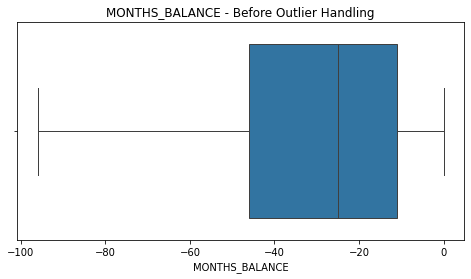

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=bureau_balance["MONTHS_BALANCE"])
plt.title("MONTHS_BALANCE - Before Outlier Handling")
plt.show()


In [20]:
Q1 = bureau_balance['MONTHS_BALANCE'].quantile(0.25)
Q3 = bureau_balance['MONTHS_BALANCE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bureau_balance['MONTHS_BALANCE_capped'] = bureau_balance['MONTHS_BALANCE'].clip(lower=lower_bound, upper=upper_bound)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -98.5
Upper Bound: 41.5


### Before & After Capping

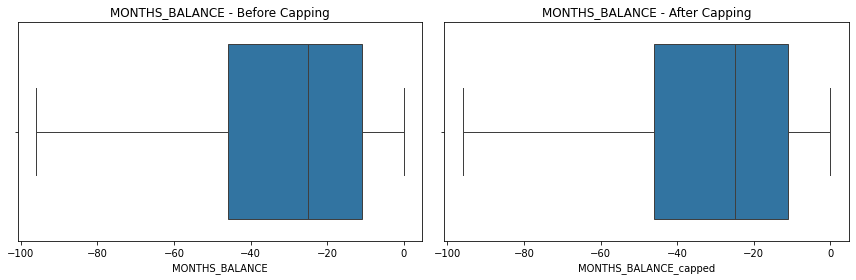

In [26]:
plt.subplot(1, 2, 1)
sns.boxplot(x=bureau_balance["MONTHS_BALANCE"])
plt.title("MONTHS_BALANCE - Before Capping")

plt.subplot(1, 2, 2)
sns.boxplot(x=bureau_balance["MONTHS_BALANCE_capped"])
plt.title("MONTHS_BALANCE - After Capping")

plt.tight_layout()
plt.show()


In [27]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS  MONTHS_BALANCE_capped
0       5715448               0      C                      0
1       5715448              -1      C                     -1
2       5715448              -2      C                     -2
3       5715448              -3      C                     -3
4       5715448              -4      C                     -4

In [21]:
bureau_balance["MONTHS_BALANCE"] = bureau_balance["MONTHS_BALANCE_capped"]
bureau_balance.drop(columns="MONTHS_BALANCE_capped", inplace=True)


In [8]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

### Check and handle skewness

In [30]:
print("Skewness Before:", bureau_balance["MONTHS_BALANCE"].skew())

Skewness Before: -0.7606896216262972


In [22]:
shift_value = abs(bureau_balance["MONTHS_BALANCE"].min()) + 1
transformed = np.log1p(bureau_balance["MONTHS_BALANCE"] + shift_value)
bureau_balance["MONTHS_BALANCE_transformed"] = transformed


### Before & After transformation 

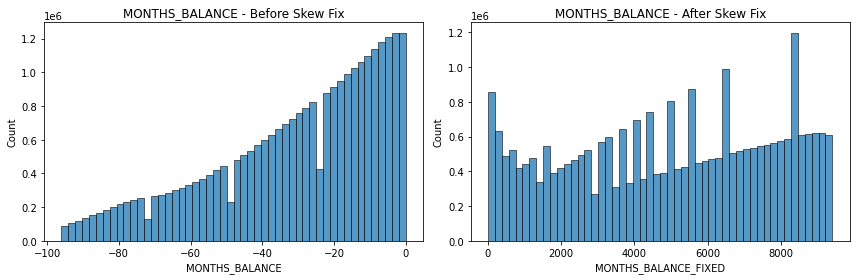

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(bureau_balance['MONTHS_BALANCE'], bins=50)
plt.title("MONTHS_BALANCE - Before Skew Fix")

plt.subplot(1, 2, 2)
sns.histplot(df_skewfix['MONTHS_BALANCE_FIXED'], bins=50)
plt.title("MONTHS_BALANCE - After Skew Fix")

plt.tight_layout()
plt.show()


In [31]:
df_skewfix.head()

SK_ID_BUREAU    STATUS  MONTHS_BALANCE
0       5715448  0.857143        1.000000
1       5715448  0.857143        0.979486
2       5715448  0.857143        0.959184
3       5715448  0.857143        0.939094
4       5715448  0.857143        0.919218

### Encode categorical data 

In [19]:
cat_vars = bureau_balance.select_dtypes(include=['object', 'category']).columns

for col in cat_vars:
    print(f"Unique values in {col}: {bureau_balance[col].unique()}")

Unique values in STATUS: ['C' '0' 'X' '1' '2' '3' '5' '4']


In [24]:
le = LabelEncoder()
df_skewfix['STATUS'] = le.fit_transform(df_skewfix['STATUS'])
print(df_skewfix['STATUS'].unique())


[6 0 7 1 2 3 5 4]


In [34]:
df_skewfix.head()

SK_ID_BUREAU    STATUS  MONTHS_BALANCE
0       5715448  0.857143        1.000000
1       5715448  0.857143        0.979486
2       5715448  0.857143        0.959184
3       5715448  0.857143        0.939094
4       5715448  0.857143        0.919218

### Scaling

In [26]:
scaler = MinMaxScaler()
numeric_cols = df_skewfix.select_dtypes(include=[np.number]).columns.difference(['SK_ID_BUREAU'])
df_skewfix[numeric_cols] = scaler.fit_transform(df_skewfix[numeric_cols])

### Combined Bureau and Bureau Balance Data
**Merging bureau data and bureau_balance data on SK_ID_BUREAU by inner join**

In [3]:
merged_data = pd.merge(bureau, bureau_balance, on='SK_ID_BUREAU', how='inner')

In [4]:
merged_data.head()

SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      380361       5715448      0.71937                 0.0   
1      380361       5715448      0.71937                 0.0   
2      380361       5715448      0.71937                 0.0   
3      380361       5715448      0.71937                 0.0   
4      380361       5715448      0.71937                 0.0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                  1.0           0.804664                 0.0        0.094997   
1                  1.0           0.804664                 0.0        0.094997   
2                  1.0           0.804664                 0.0        0.094997   
3                  1.0           0.804664                 0.0        0.094997   
4                  1.0           0.804664                 0.0        0.094997   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  ...  CREDIT_TYPE_2  \
0                0.375                   0.0  ...            1.0   
1                0.375                   0.0  ...            1.0   
2                0.375                   0.0  ...            1.0   
3                0.375                   0.0  ...            1.0   
4                0.375                   0.0  ...            1.0   

   CREDIT_TYPE_3  DAYS_CREDIT_UPDATE  CREDIT_ACTIVE_encoded  \
0            0.0            0.785921                    0.0   
1            0.0            0.785921                    0.0   
2            0.0            0.785921                    0.0   
3            0.0            0.785921                    0.0   
4            0.0            0.785921                    0.0   

   currency_currency 1  currency_currency 2  currency_currency 3  \
0                 True                False                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                 True                False                False   

   currency_currency 4    STATUS  MONTHS_BALANCE  
0                False  0.857143        1.000000  
1                False  0.857143        0.979486  
2                False  0.857143        0.959184  
3                False  0.857143        0.939094  
4                False  0.857143        0.919218  

[5 rows x 23 columns]

In [6]:
merged_data.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE_0             0
CREDIT_TYPE_1             0
CREDIT_TYPE_2             0
CREDIT_TYPE_3             0
DAYS_CREDIT_UPDATE        0
CREDIT_ACTIVE_encoded     0
currency_currency 1       0
currency_currency 2       0
currency_currency 3       0
currency_currency 4       0
STATUS                    0
MONTHS_BALANCE            0
dtype: int64

In [7]:
merged_data.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
24179736    False
24179737    False
24179738    False
24179739    False
24179740    False
Length: 24179741, dtype: bool

### Aggregating Bureau Credit Information per Loan within Each Application
- Creating Summary Statistics for Bureau Loans and Balances at the Loan Level
- Aggregating Time-Series Bureau Balance Data to Each Bureau Loan

In [5]:
grouped_df = merged_data.groupby(['SK_ID_CURR', 'SK_ID_BUREAU']).agg({
    'DAYS_CREDIT': 'mean',  
    'CREDIT_DAY_OVERDUE': 'mean',
    'DAYS_CREDIT_ENDDATE': 'mean',
    'DAYS_ENDDATE_FACT': 'mean',
    'CNT_CREDIT_PROLONG': 'sum',
    'AMT_CREDIT_SUM': 'mean',
    'AMT_CREDIT_SUM_DEBT': 'mean',
    'AMT_CREDIT_SUM_LIMIT': 'mean',
    'CREDIT_TYPE_2': 'sum',
    'CREDIT_TYPE_3': 'sum',
    'DAYS_CREDIT_UPDATE': 'mean',
    'CREDIT_ACTIVE_encoded': 'sum',
    'currency_currency 1': 'sum',
    'currency_currency 2': 'sum',
    'currency_currency 3': 'sum',
    'currency_currency 4': 'sum',
    'STATUS': 'mean',
    'MONTHS_BALANCE': 'mean'
}).reset_index()

grouped_df


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0           100001       5896630     0.706708                 0.0   
1           100001       5896631     0.688912                 0.0   
2           100001       5896632     0.699179                 0.0   
3           100001       5896633     0.462012                 0.0   
4           100001       5896634     0.808693                 0.0   
...            ...           ...          ...                 ...   
774349      456255       5126333     0.875770                 0.0   
774350      456255       5126334     0.845654                 0.0   
774351      456255       5126335     0.482546                 0.0   
774352      456255       5126336     0.200205                 0.0   
774353      456255       5126337     0.200205                 0.0   

        DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  CNT_CREDIT_PROLONG  \
0                  0.474453           0.790013                 0.0   
1                  0.527939           0.666983                 0.0   
2                  0.470694           0.793431                 0.0   
3                  0.331425           0.495728                 0.0   
4                  0.712662           0.875029                 0.0   
...                     ...                ...                 ...   
774349             0.808527           0.929774                 0.0   
774350             0.606203           0.911696                 0.0   
774351             0.612355           0.703436                 0.0   
774352             1.000000           0.704196                 0.0   
774353             0.346121           0.384469                 0.0   

        AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0             0.158328                0.375                   0.0   
1             0.393667                0.375                   0.0   
2             0.128942                0.375                   0.0   
3             0.120329                0.375                   0.0   
4             0.475237                1.000                   0.0   
...                ...                  ...                   ...   
774349        0.613654                1.000                   0.0   
774350        0.633312                1.000                   0.0   
774351        1.000000                0.375                   0.0   
774352        0.054782                0.375                   0.0   
774353        0.633312                0.375                   0.0   

        CREDIT_TYPE_2  CREDIT_TYPE_3  DAYS_CREDIT_UPDATE  \
0                 0.0           29.0            0.796721   
1                 0.0           30.0            0.796721   
2                 0.0           29.0            0.796721   
3                 0.0           52.0            0.796721   
4                 0.0           19.0            0.854195   
...               ...            ...                 ...   
774349            0.0           12.0            0.846866   
774350            0.0           15.0            0.835294   
774351            0.0           33.0            0.555256   
774352           33.0            0.0            0.556027   
774353            0.0           35.0            0.231244   

        CREDIT_ACTIVE_encoded  currency_currency 1  currency_currency 2  \
0                   19.333333                   29                    0   
1                   20.000000                   30                    0   
2                   19.333333                   29                    0   
3                   34.666667                   52                    0   
4                    0.000000                   19                    0   
...                       ...                  ...                  ...   
774349               0.000000                   12                    0   
774350               0.000000                   15                    0   
774351              22.000000                   33                    0   
774352              22.000000         

## previous_application

In [18]:
previous_application = pd.read_csv('previous_application.csv')


### EDA

In [8]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [9]:
previous_application.shape

(1670214, 37)

In [10]:
missing_values = previous_application.isnull().sum()
missing_percent = (missing_values / len(previous_application)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [11]:
missing_df

Missing Values  Percent Missing
RATE_INTEREST_PRIVILEGED          1664263        99.643698
RATE_INTEREST_PRIMARY             1664263        99.643698
AMT_DOWN_PAYMENT                   895844        53.636480
RATE_DOWN_PAYMENT                  895844        53.636480
NAME_TYPE_SUITE                    820405        49.119754
DAYS_LAST_DUE                      673065        40.298129
DAYS_FIRST_DRAWING                 673065        40.298129
DAYS_FIRST_DUE                     673065        40.298129
DAYS_TERMINATION                   673065        40.298129
NFLAG_INSURED_ON_APPROVAL          673065        40.298129
DAYS_LAST_DUE_1ST_VERSION          673065        40.298129
AMT_GOODS_PRICE                    385515        23.081773
AMT_ANNUITY                        372235        22.286665
CNT_PAYMENT                        372230        22.286366
PRODUCT_COMBINATION                   346         0.020716
AMT_CREDIT                              1         0.000060

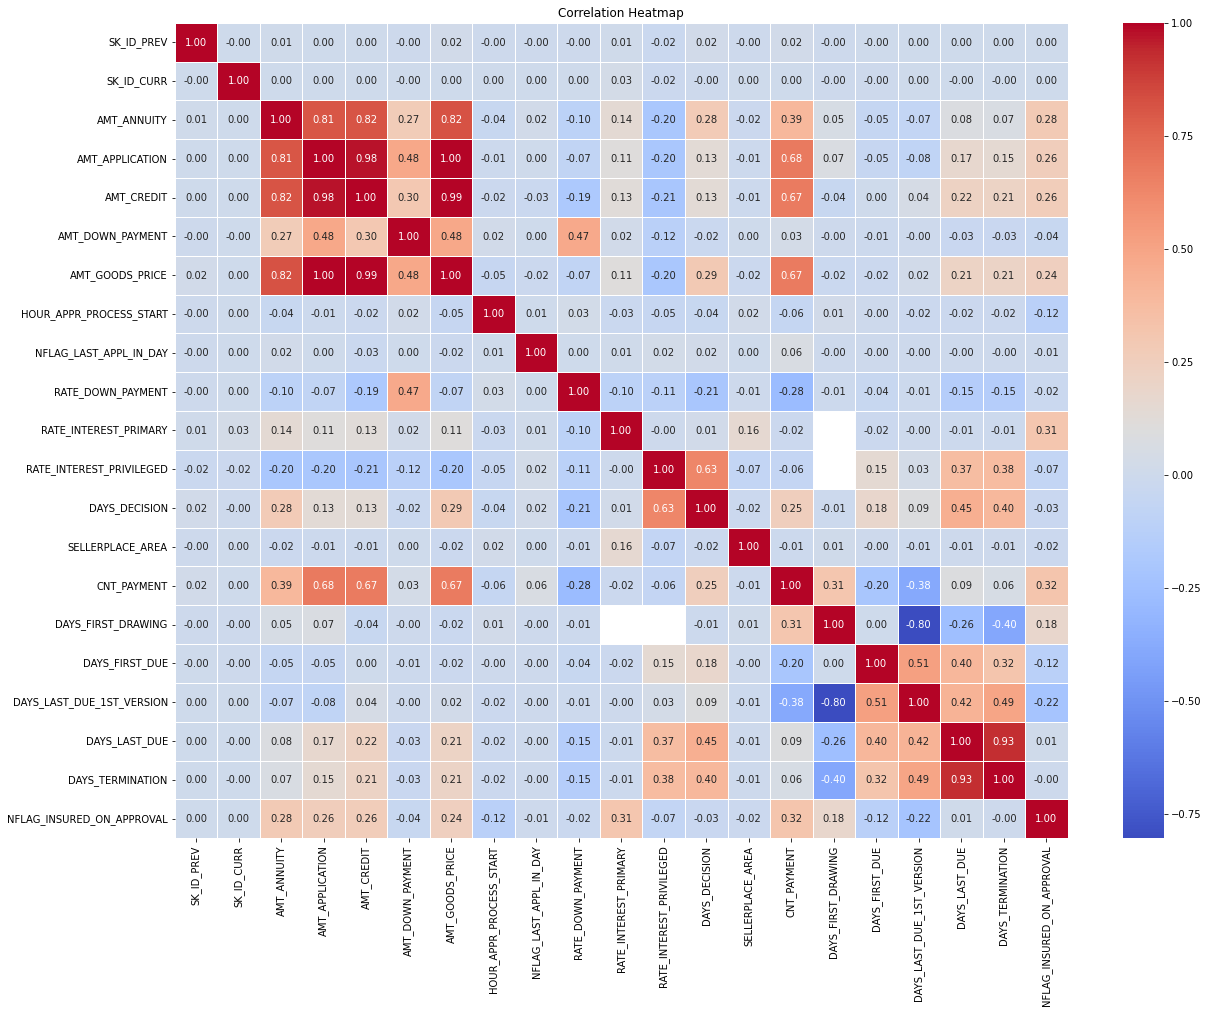

In [13]:
numeric_df = previous_application.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
corr_matrix

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_DOWN_PAYMENT            -0.001313   -0.000063     0.267694   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
RATE_DOWN_PAYMENT           -0.004051    0.001158    -0.103878   
RATE_INTEREST_PRIMARY        0.012969    0.033197     0.141823   
RATE_INTEREST_PRIVILEGED    -0.022312   -0.016757    -0.202335   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMENT                  0.015589    0.000031     0.394535   
DAYS_FIRST_DRAWING          -0.001478   -0.001329     0.052839   
DAYS_FIRST_DUE              -0.000071   -0.000757    -0.053295   
DAYS_LAST_DUE_1ST_VERSION    0.001222    0.000252    -0.068877   
DAYS_LAST_DUE                0.001915   -0.000318     0.082659   
DAYS_TERMINATION             0.001781   -0.000020     0.068022   
NFLAG_INSURED_ON_APPROVAL    0.003986    0.000876     0.283080   

                           AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                        0.003302    0.003659         -0.001313   
SK_ID_CURR                        0.000280    0.000195         -0.000063   
AMT_ANNUITY                       0.808872    0.816429          0.267694   
AMT_APPLICATION                   1.000000    0.975824          0.482776   
AMT_CREDIT                        0.975824    1.000000          0.301284   
AMT_DOWN_PAYMENT                  0.482776    0.301284          1.000000   
AMT_GOODS_PRICE                   0.999884    0.993087          0.482776   
HOUR_APPR_PROCESS_START          -0.014415   -0.021039          0.016776   
NFLAG_LAST_APPL_IN_DAY            0.004310   -0.025179          0.001597   
RATE_DOWN_PAYMENT                -0.072479   -0.188128          0.473935   
RATE_INTEREST_PRIMARY             0.110001    0.125106          0.016323   
RATE_INTEREST_PRIVILEGED         -0.199733   -0.205158         -0.115343   
DAYS_DECISION                     0.133660    0.133763         -0.024536   
SELLERPLACE_AREA                 -0.007649   -0.009567          0.003533   
CNT_PAYMENT                       0.680630    0.674278          0.031659   
DAYS_FIRST_DRAWING                0.074544   -0.036813         -0.001773   
DAYS_FIRST_DUE                   -0.049532    0.002881         -0.013586   
DAYS_LAST_DUE_1ST_VERSION        -0.084905    0.044031         -0.000869   
DAYS_LAST_DUE                     0.172627    0.224829         -0.031425   
DAYS_TERMINATION                  0.148618    0.214320         -0.030702   
NFLAG_INSURED_ON_APPROVAL         0.259219    0.263932         -0.042585   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                        0.015293                -0.002652   
SK_ID_CURR                        0.000369                 0.002842   
AMT_ANNUITY                       0.820895                -0.036201   
AMT_APPLICATION                   0.999884                -0.014415   
AMT_CREDIT                        0.993087                -0.021039   
AMT_DOWN_PAYMENT                  0.482776                 0.016776   
AMT_GOODS_PRICE                   1.000000                -0.045267   
HOUR_APPR_PROCESS_START          -0.045267                 1.000000   
NFLAG_LAST_APPL_IN_DAY           -0.017100                 0.005789   
RATE_DOWN_PAYMENT                -0.072479                 0.025930   
RATE_INTEREST_PRIMARY             0.110001                -0.027172   
RATE_INTEREST_PRIVILEGED         -0.199733       

In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
Categorical Columns: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


### Handle missing values

- Get feature that high corr with missing columns

In [21]:
corr_matrix = df[numeric_columns].corr().abs()
high_corr_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.85:
            high_corr_columns.add(corr_matrix.columns[i])
            high_corr_columns.add(corr_matrix.columns[j])

print("\nHighly Correlated Columns (corr > 0.85):", high_corr_columns)


Highly Correlated Columns (corr > 0.85): {'DAYS_TERMINATION', 'AMT_GOODS_PRICE', 'AMT_APPLICATION', 'DAYS_LAST_DUE', 'AMT_CREDIT'}


- The step is to impute missing values using a RandomForestRegressor, which is predicting missing values on the basis of these relationships.

In [22]:
for column in high_corr_columns:
    missing_percentage = df[column].isnull().mean() * 100
    print(f"\nProcessing {column} - Missing Percentage: {missing_percentage:.2f}%")

    if missing_percentage == 0:
        print(f"Column {column} has no missing values.")
        continue

    try:
        print(f"Imputing missing values in '{column}' using RandomForestRegressor...")

        features = [col for col in numeric_columns if col != column]

        not_missing = df[column].notnull()
        missing = df[column].isnull()

        train_data = df.loc[not_missing, features]
        target_data = df.loc[not_missing, column]

        print(f"Training Features Shape: {train_data.shape}")
        print(f"Target Shape: {target_data.shape}")

        rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
        rf_model.fit(train_data, target_data)

        pred_data = df.loc[missing, features]
        print(f"Missing Data Shape (to predict): {pred_data.shape}")

        df.loc[missing, column] = rf_model.predict(pred_data)

        print(f"Imputation complete for {column}.")

    except Exception as e:
        print(f"Could not impute {column}. Error: {e}")



Processing DAYS_TERMINATION - Missing Percentage: 40.30%
Imputing missing values in 'DAYS_TERMINATION' using RandomForestRegressor...
Training Features Shape: (997149, 20)
Target Shape: (997149,)
Missing Data Shape (to predict): (673065, 20)
Imputation complete for DAYS_TERMINATION.

Processing AMT_GOODS_PRICE - Missing Percentage: 23.08%
Imputing missing values in 'AMT_GOODS_PRICE' using RandomForestRegressor...
Training Features Shape: (1284699, 20)
Target Shape: (1284699,)
Missing Data Shape (to predict): (385515, 20)
Imputation complete for AMT_GOODS_PRICE.

Processing AMT_APPLICATION - Missing Percentage: 0.00%
Column AMT_APPLICATION has no missing values.

Processing DAYS_LAST_DUE - Missing Percentage: 40.30%
Imputing missing values in 'DAYS_LAST_DUE' using RandomForestRegressor...
Training Features Shape: (997149, 20)
Target Shape: (997149,)
Missing Data Shape (to predict): (673065, 20)
Imputation complete for DAYS_LAST_DUE.

Processing AMT_CREDIT - Missing Percentage: 0.00%
Im

In [23]:
print("\nSummary of missing values after processing:")
print(df.isnull().sum())


Summary of missing values after processing:
SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE  

- More than 60% missing values in columns are excluded. Missing categorical columns are replaced by the mode (most frequent value). Numerical columns that are skewed have missing values filled in with the median, or the mean when the column is not skewed.

In [24]:
for column in df.columns:
    missing_percentage = df[column].isnull().mean() * 100
    print(f"\nProcessing {column} - Missing Percentage: {missing_percentage:.2f}%")

    if missing_percentage > 60:
        print(f"Column {column} has more than 60% missing values. Dropping the column.")
        df.drop(column, axis=1, inplace=True)
    
    elif df[column].dtype == 'object':
        print(f"Column {column} is categorical. Filling missing values with mode.")
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    else:
        column_skewness = skew(df[column].dropna())
        print(f"Column {column} skewness: {column_skewness:.2f}")
        
        if column_skewness > 0.5:
            print(f"Column {column} is skewed. Filling missing values with median.")
            df[column].fillna(df[column].median(), inplace=True)
        else:
            print(f"Column {column} is not skewed. Filling missing values with mean.")
            df[column].fillna(df[column].mean(), inplace=True)





Processing SK_ID_PREV - Missing Percentage: 0.00%
Column SK_ID_PREV skewness: -0.00
Column SK_ID_PREV is not skewed. Filling missing values with mean.

Processing SK_ID_CURR - Missing Percentage: 0.00%


C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Column SK_ID_CURR skewness: -0.00
Column SK_ID_CURR is not skewed. Filling missing values with mean.

Processing NAME_CONTRACT_TYPE - Missing Percentage: 0.00%
Column NAME_CONTRACT_TYPE is categorical. Filling missing values with mode.


C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)



Processing AMT_ANNUITY - Missing Percentage: 22.29%
Column AMT_ANNUITY skewness: 2.69
Column AMT_ANNUITY is skewed. Filling missing values with median.


C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)



Processing AMT_APPLICATION - Missing Percentage: 0.00%
Column AMT_APPLICATION skewness: 3.39
Column AMT_APPLICATION is skewed. Filling missing values with median.

Processing AMT_CREDIT - Missing Percentage: 0.00%
Column AMT_CREDIT skewness: 3.25
Column AMT_CREDIT is skewed. Filling missing values with median.

Processing AMT_DOWN_PAYMENT - Missing Percentage: 53.64%
Column AMT_DOWN_PAYMENT skewness: 36.48
Column AMT_DOWN_PAYMENT is skewed. Filling missing values with median.

Processing AMT_GOODS_PRICE - Missing Percentage: 0.00%
Column AMT_GOODS_PRICE skewness: 3.39
Column AMT_GOODS_PRICE is skewed. Filling missing values with median.

Processing WEEKDAY_APPR_PROCESS_START - Missing Percentage: 0.00%
Column WEEKDAY_APPR_PROCESS_START is categorical. Filling missing values with mode.

Processing HOUR_APPR_PROCESS_START - Missing Percentage: 0.00%
Column HOUR_APPR_PROCESS_START skewness: -0.03
Column HOUR_APPR_PROCESS_START is not skewed. Filling missing values with mean.

Processing 

C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)



Processing NAME_CONTRACT_STATUS - Missing Percentage: 0.00%
Column NAME_CONTRACT_STATUS is categorical. Filling missing values with mode.

Processing DAYS_DECISION - Missing Percentage: 0.00%
Column DAYS_DECISION skewness: -1.05
Column DAYS_DECISION is not skewed. Filling missing values with mean.


C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)



Processing NAME_PAYMENT_TYPE - Missing Percentage: 0.00%
Column NAME_PAYMENT_TYPE is categorical. Filling missing values with mode.

Processing CODE_REJECT_REASON - Missing Percentage: 0.00%
Column CODE_REJECT_REASON is categorical. Filling missing values with mode.

Processing NAME_TYPE_SUITE - Missing Percentage: 49.12%
Column NAME_TYPE_SUITE is categorical. Filling missing values with mode.

Processing NAME_CLIENT_TYPE - Missing Percentage: 0.00%
Column NAME_CLIENT_TYPE is categorical. Filling missing values with mode.

Processing NAME_GOODS_CATEGORY - Missing Percentage: 0.00%
Column NAME_GOODS_CATEGORY is categorical. Filling missing values with mode.

Processing NAME_PORTFOLIO - Missing Percentage: 0.00%
Column NAME_PORTFOLIO is categorical. Filling missing values with mode.

Processing NAME_PRODUCT_TYPE - Missing Percentage: 0.00%
Column NAME_PRODUCT_TYPE is categorical. Filling missing values with mode.

Processing CHANNEL_TYPE - Missing Percentage: 0.00%
Column CHANNEL_TYPE i

C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\1041157641.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)



Processing CNT_PAYMENT - Missing Percentage: 22.29%
Column CNT_PAYMENT skewness: 1.53
Column CNT_PAYMENT is skewed. Filling missing values with median.

Processing NAME_YIELD_GROUP - Missing Percentage: 0.00%
Column NAME_YIELD_GROUP is categorical. Filling missing values with mode.

Processing PRODUCT_COMBINATION - Missing Percentage: 0.02%
Column PRODUCT_COMBINATION is categorical. Filling missing values with mode.

Processing DAYS_FIRST_DRAWING - Missing Percentage: 40.30%
Column DAYS_FIRST_DRAWING skewness: -3.60
Column DAYS_FIRST_DRAWING is not skewed. Filling missing values with mean.

Processing DAYS_FIRST_DUE - Missing Percentage: 40.30%
Column DAYS_FIRST_DUE skewness: 4.64
Column DAYS_FIRST_DUE is skewed. Filling missing values with median.

Processing DAYS_LAST_DUE_1ST_VERSION - Missing Percentage: 40.30%
Column DAYS_LAST_DUE_1ST_VERSION skewness: 2.78
Column DAYS_LAST_DUE_1ST_VERSION is skewed. Filling missing values with median.

Processing DAYS_LAST_DUE - Missing Percentag

In [25]:
print(df.isnull().sum())

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST

### Detect skewness and capping 

In [27]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 78223.5, Upper bound: 3767913.5
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77948.5, Upper bound: 634791.5
Outliers detected in column 'AMT_ANNUITY': 162620 outliers
Lower bound: -6368.298750000004, Upper bound: 30739.421250000007
Outliers detected in column 'AMT_APPLICATION': 208019 outliers
Lower bound: -223740.0, Upper bound: 422820.0
Outliers detected in column 'AMT_CREDIT': 179989 outliers
Lower bound: -264226.5, Upper bound: 504805.5
Outliers detected in column 'AMT_DOWN_PAYMENT': 774310 outliers
Lower bound: 1638.0, Upper bound: 1638.0
Outliers detected in column 'AMT_GOODS_PRICE': 205588 outliers
Lower bound: -226433.25, Upper bound: 434508.75
Outliers detected in column 'HOUR_APPR_PROCESS_START': 1639 outliers
Lower bound: 2.5, Upper bound: 22.5
Outliers detected in column 'NFLAG_LAST_APPL_IN_DAY': 5900 outliers
Lower bound: 1.0, Upper bound: 1.0
Outliers detected in column 'RATE_DOWN_PAYM

### Viz Before & After 

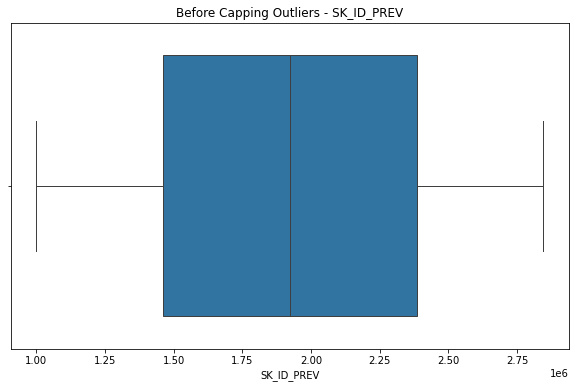

Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 78223.5, Upper bound: 3767913.5


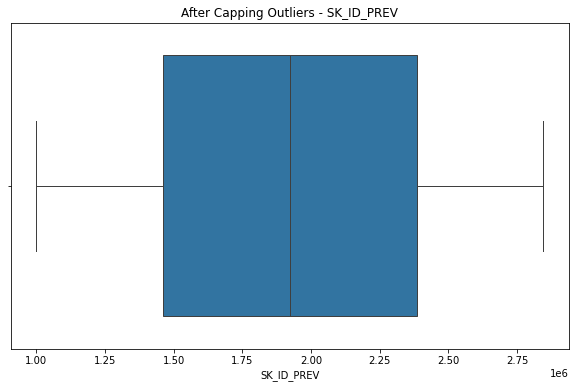

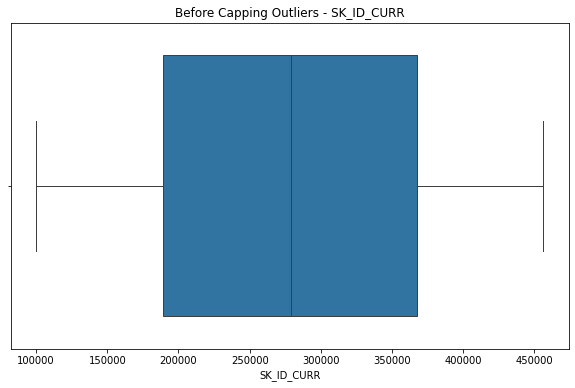

Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77948.5, Upper bound: 634791.5


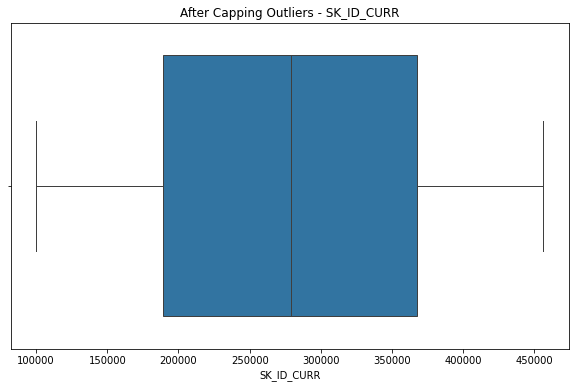

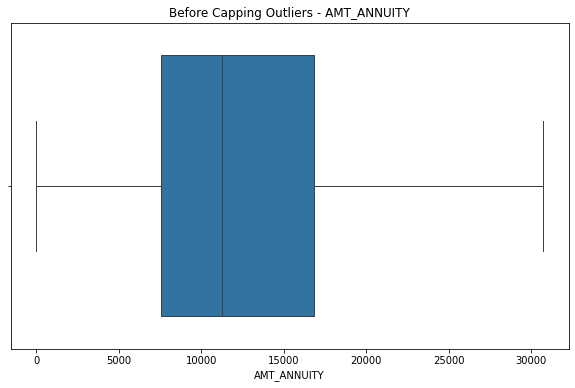

Outliers detected in column 'AMT_ANNUITY': 0 outliers
Lower bound: -6368.298750000004, Upper bound: 30739.421250000007


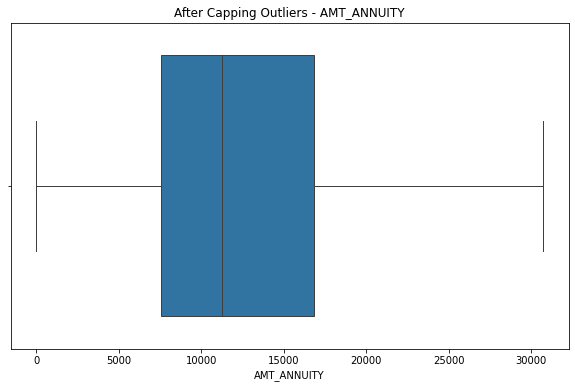

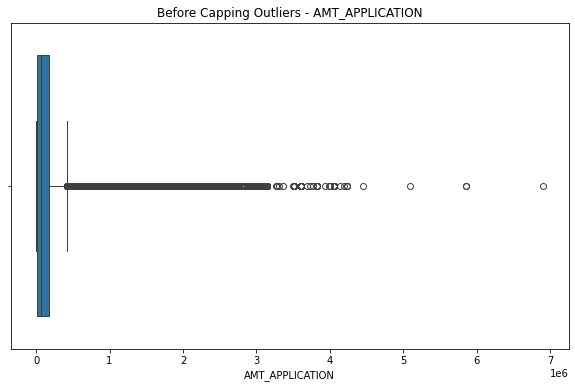

Outliers detected in column 'AMT_APPLICATION': 208019 outliers
Lower bound: -223740.0, Upper bound: 422820.0


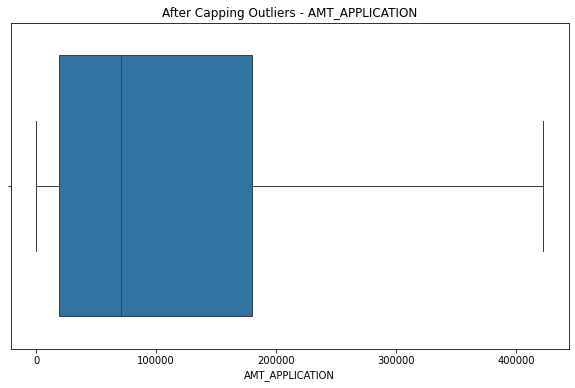

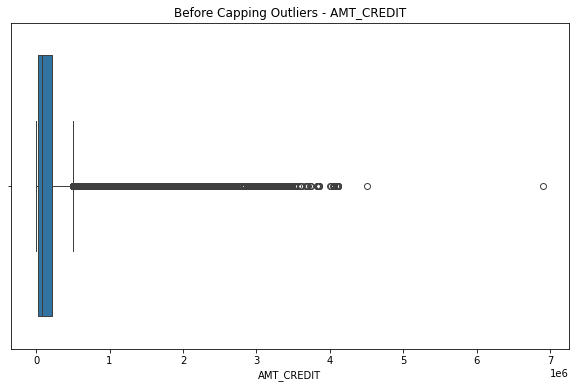

Outliers detected in column 'AMT_CREDIT': 179989 outliers
Lower bound: -264226.5, Upper bound: 504805.5


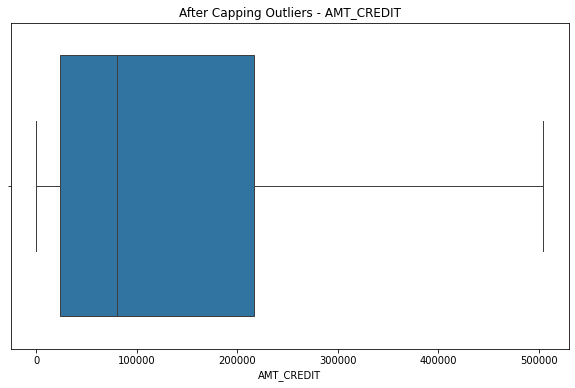

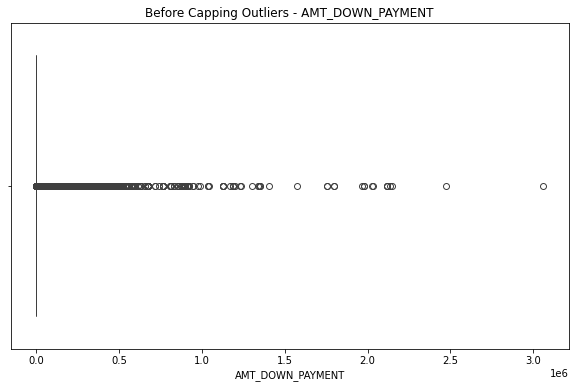

Outliers detected in column 'AMT_DOWN_PAYMENT': 774310 outliers
Lower bound: 1638.0, Upper bound: 1638.0


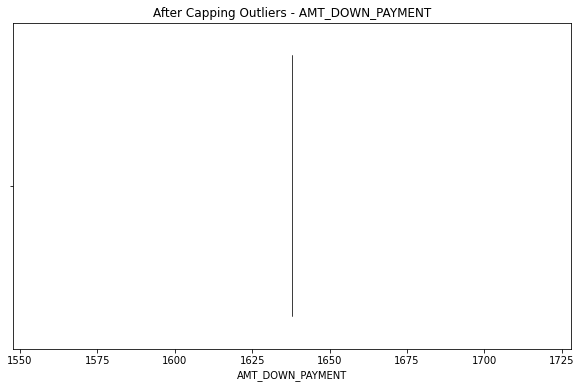

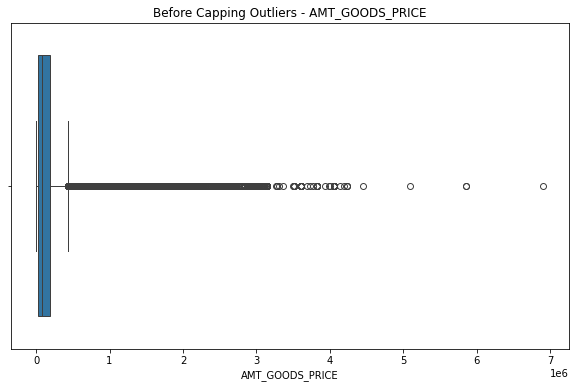

Outliers detected in column 'AMT_GOODS_PRICE': 205588 outliers
Lower bound: -226433.25, Upper bound: 434508.75


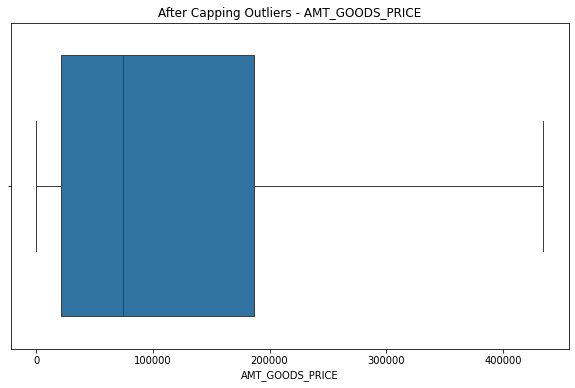

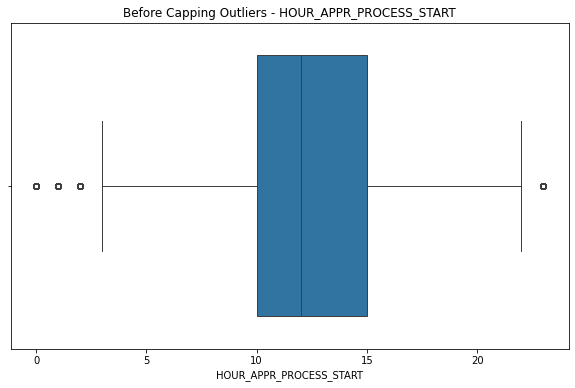

Outliers detected in column 'HOUR_APPR_PROCESS_START': 1639 outliers
Lower bound: 2.5, Upper bound: 22.5


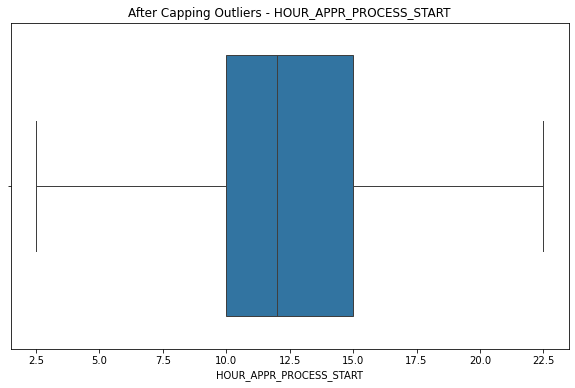

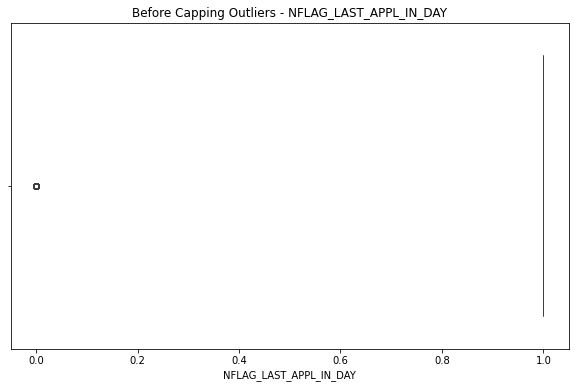

Outliers detected in column 'NFLAG_LAST_APPL_IN_DAY': 5900 outliers
Lower bound: 1.0, Upper bound: 1.0


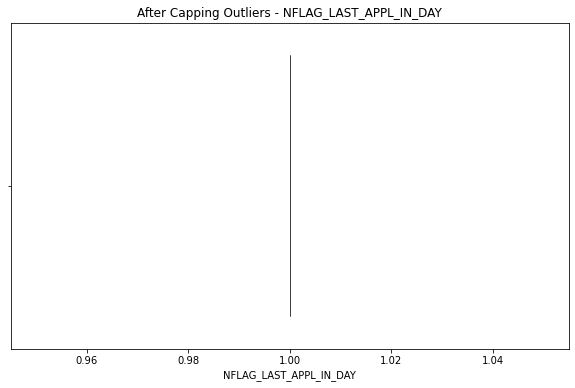

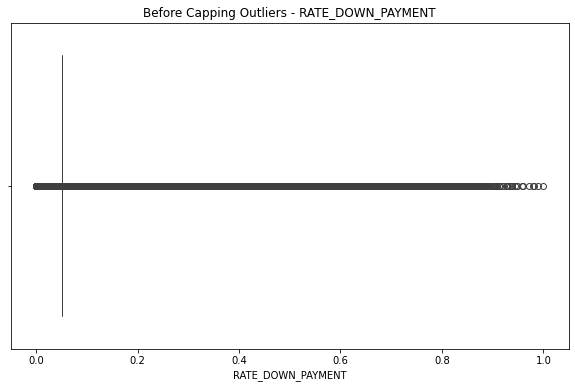

Outliers detected in column 'RATE_DOWN_PAYMENT': 774370 outliers
Lower bound: 0.051605084707529295, Upper bound: 0.051605084707529295


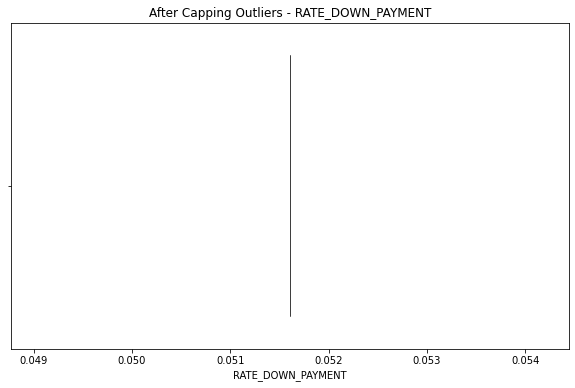

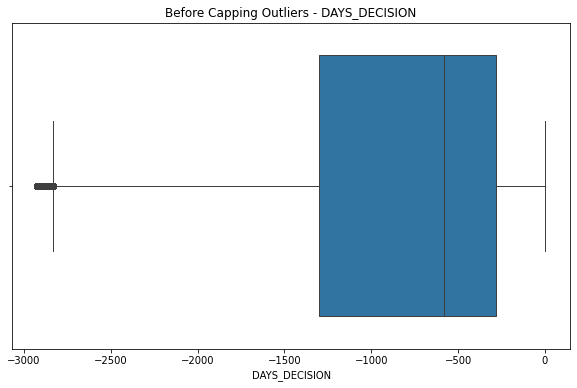

Outliers detected in column 'DAYS_DECISION': 17571 outliers
Lower bound: -2830.0, Upper bound: 1250.0


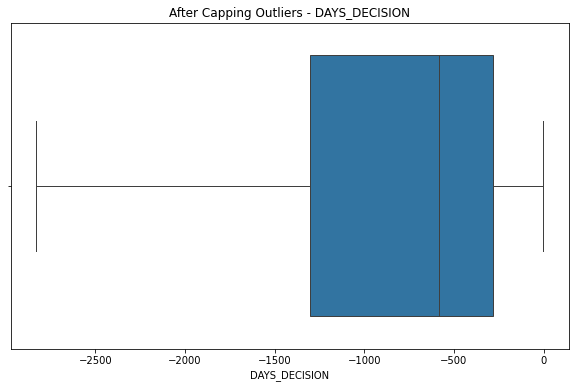

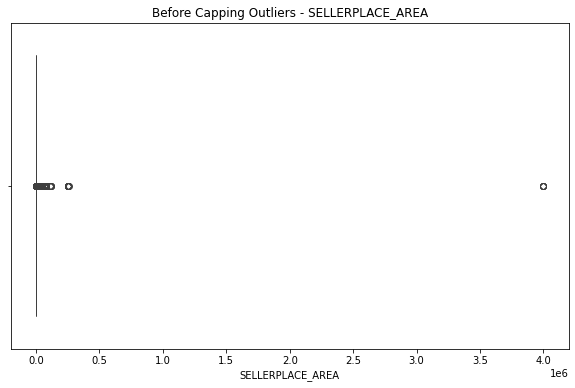

Outliers detected in column 'SELLERPLACE_AREA': 268087 outliers
Lower bound: -125.5, Upper bound: 206.5


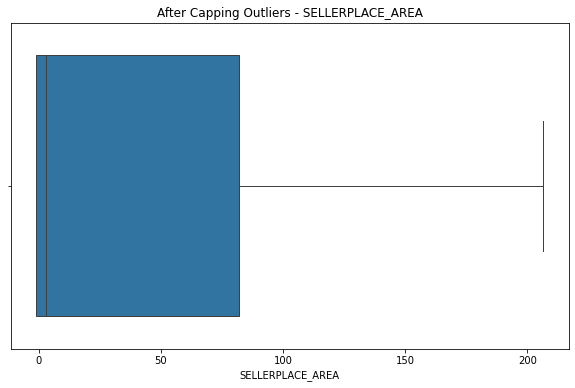

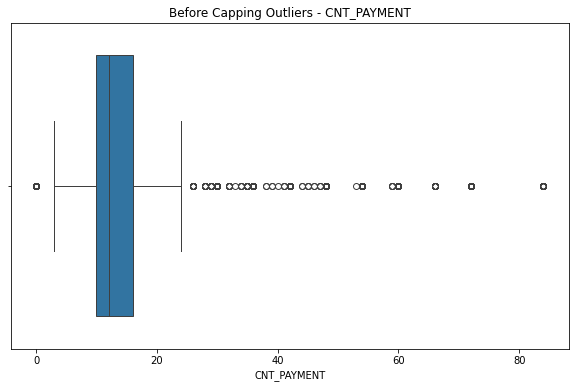

Outliers detected in column 'CNT_PAYMENT': 344916 outliers
Lower bound: 1.0, Upper bound: 25.0


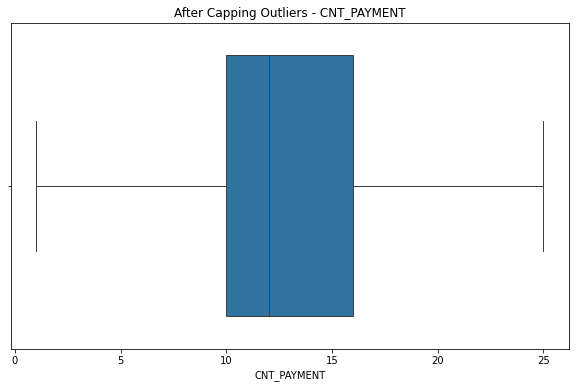

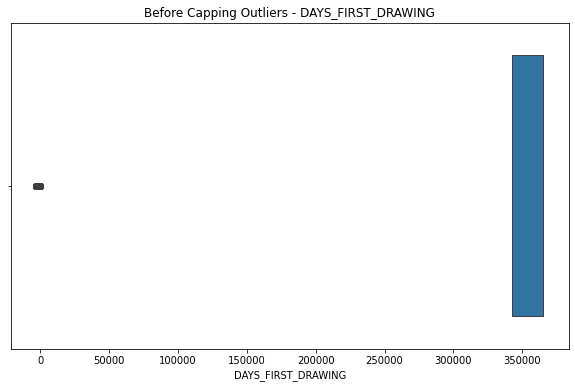

Outliers detected in column 'DAYS_FIRST_DRAWING': 62705 outliers
Lower bound: 307660.13759678835, Upper bound: 399792.71744192694


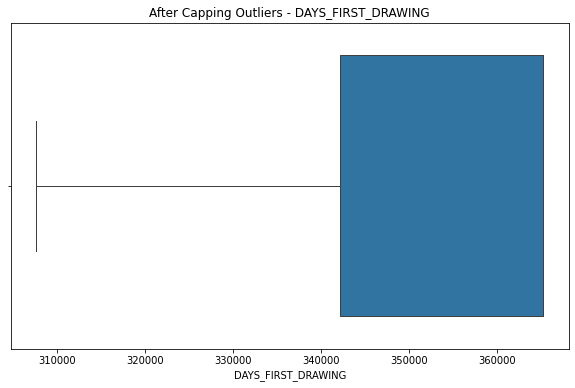

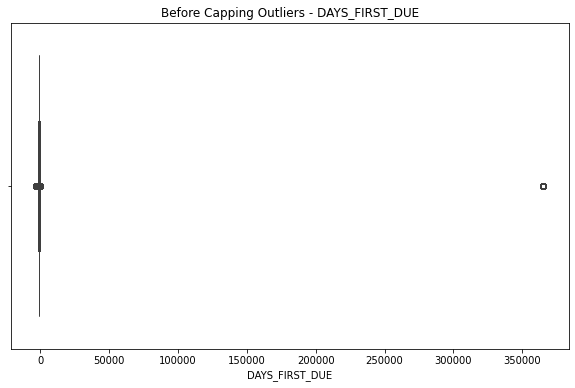

Outliers detected in column 'DAYS_FIRST_DUE': 374760 outliers
Lower bound: -1525.5, Upper bound: -177.5


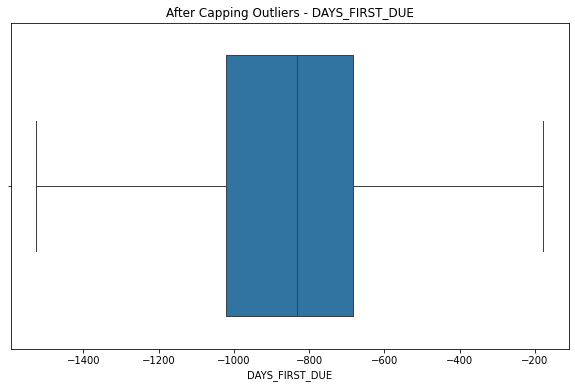

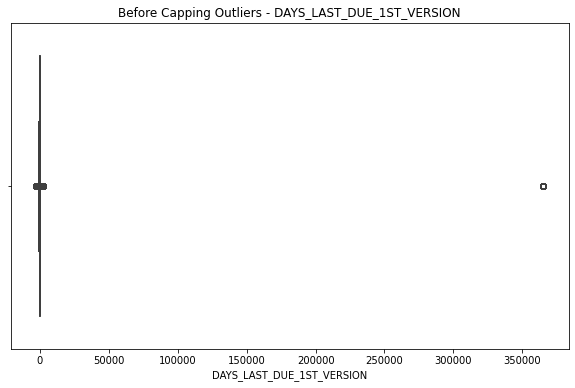

Outliers detected in column 'DAYS_LAST_DUE_1ST_VERSION': 431364 outliers
Lower bound: -1169.5, Upper bound: 402.5


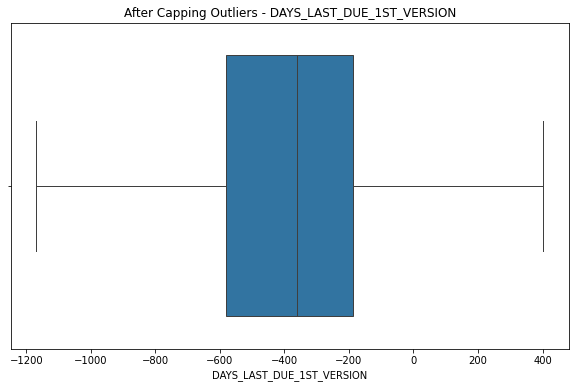

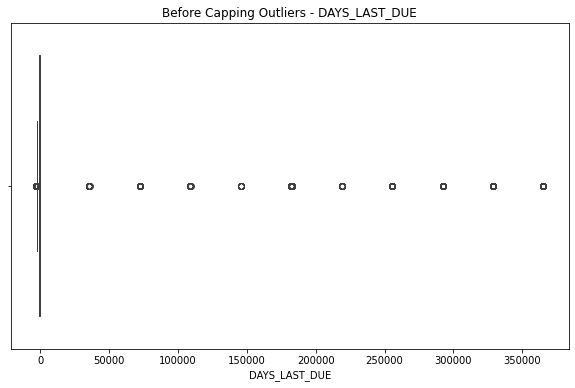

Outliers detected in column 'DAYS_LAST_DUE': 286769 outliers
Lower bound: -2223.6500000000005, Upper bound: 938.3500000000003


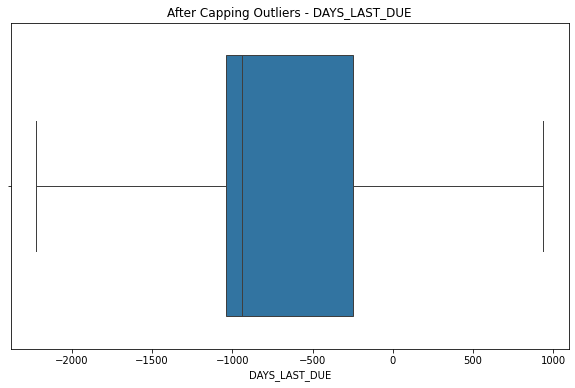

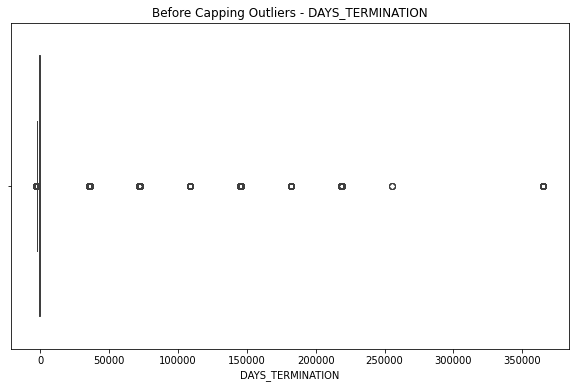

Outliers detected in column 'DAYS_TERMINATION': 377010 outliers
Lower bound: -2162.0, Upper bound: 958.0


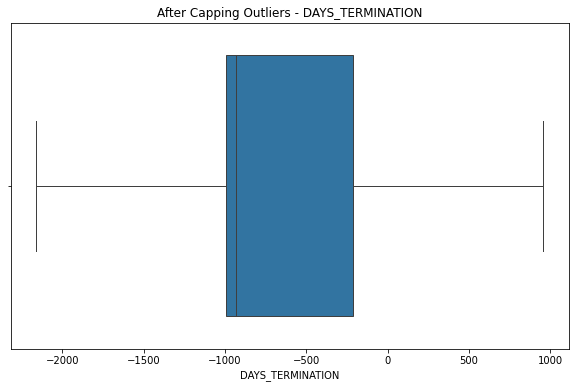

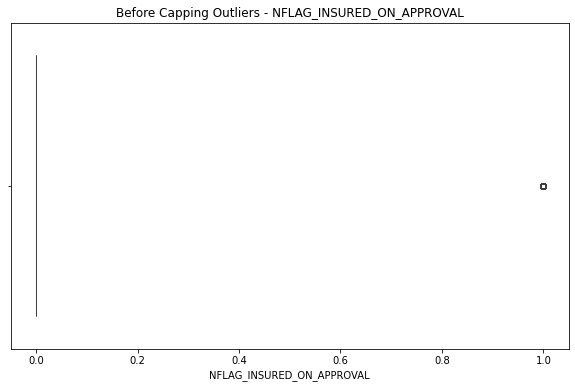

Outliers detected in column 'NFLAG_INSURED_ON_APPROVAL': 331622 outliers
Lower bound: 0.0, Upper bound: 0.0


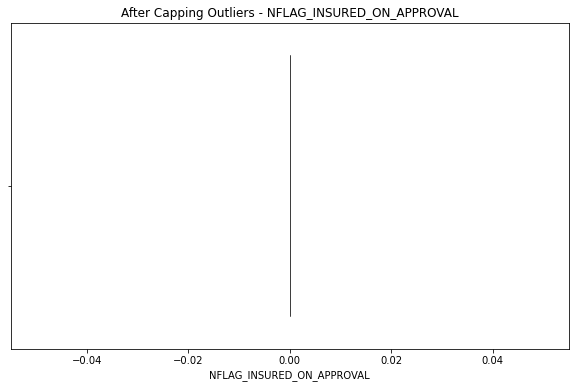

In [33]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    plot_boxplot(df, column, f"Before Capping Outliers - {column}")
    
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    df = cap_outliers(df, column, lower_bound, upper_bound)
    
    plot_boxplot(df, column, f"After Capping Outliers - {column}")


In [34]:
print("\nSummary of the data after capping outliers:")
print(df.describe())


Summary of the data after capping outliers:
         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.333838e+04     1.267608e+05   
std    5.325980e+05  1.028148e+05  8.238210e+03     1.408020e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  3.073942e+04     4.228200e+05   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670214e+06         1670214.0     1.670214e+06   
mean   1.475446e+05            1638.0     1.300761e+05   
std    1.660426e+05               0.0     1.434166e+05   
min    0.000000e+00            1638.0     0.000000e+00   
25%    2.416050e+04            1638.0     2.142000e+

### Detect & transform skewness
- If a column is significantly skewed (skewness > 0.5), it applies a transformation: a square root transformation for columns with negative or zero values, and a logarithmic transformation for positive columns. The new skewness is then calculated and printed. Columns with low skewness (<= 0.5) are left unchanged.

In [36]:
for column in df.select_dtypes(include=[np.number]).columns:
    col_skew = skew(df[column].dropna())
    print(f"Skewness for '{column}': {col_skew:.2f}")

    if abs(col_skew) > 0.5:
        print(f"'{column}' is skewed. Applying transformation...")

        if (df[column] <= 0).any():
            df[column] = np.sqrt(df[column] - df[column].min() + 1)
        else:
            df[column] = np.log1p(df[column])

        new_skew = skew(df[column].dropna())
        print(f"New skewness for '{column}': {new_skew:.2f}\n")
    else:
        print(f"'{column}' is not significantly skewed. No transformation applied.\n")


Skewness for 'SK_ID_PREV': -0.00
'SK_ID_PREV' is not significantly skewed. No transformation applied.

Skewness for 'SK_ID_CURR': -0.00
'SK_ID_CURR' is not significantly skewed. No transformation applied.

Skewness for 'AMT_ANNUITY': 0.34
'AMT_ANNUITY' is not significantly skewed. No transformation applied.

Skewness for 'AMT_APPLICATION': 0.25
'AMT_APPLICATION' is not significantly skewed. No transformation applied.

Skewness for 'AMT_CREDIT': 0.32
'AMT_CREDIT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_DOWN_PAYMENT': nan
'AMT_DOWN_PAYMENT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_GOODS_PRICE': 0.25
'AMT_GOODS_PRICE' is not significantly skewed. No transformation applied.



C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\2059561696.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  col_skew = skew(df[column].dropna())


Skewness for 'HOUR_APPR_PROCESS_START': -0.02
'HOUR_APPR_PROCESS_START' is not significantly skewed. No transformation applied.

Skewness for 'NFLAG_LAST_APPL_IN_DAY': nan
'NFLAG_LAST_APPL_IN_DAY' is not significantly skewed. No transformation applied.

Skewness for 'RATE_DOWN_PAYMENT': -1.00
'RATE_DOWN_PAYMENT' is skewed. Applying transformation...


C:\Users\hamad\AppData\Local\Temp\ipykernel_15480\2059561696.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  new_skew = skew(df[column].dropna())


New skewness for 'RATE_DOWN_PAYMENT': nan

Skewness for 'DAYS_DECISION': -1.66
'DAYS_DECISION' is skewed. Applying transformation...
New skewness for 'DAYS_DECISION': -3.79

Skewness for 'SELLERPLACE_AREA': 1.19
'SELLERPLACE_AREA' is skewed. Applying transformation...
New skewness for 'SELLERPLACE_AREA': 0.78

Skewness for 'CNT_PAYMENT': 0.41
'CNT_PAYMENT' is not significantly skewed. No transformation applied.

Skewness for 'DAYS_FIRST_DRAWING': -1.16
'DAYS_FIRST_DRAWING' is skewed. Applying transformation...
New skewness for 'DAYS_FIRST_DRAWING': -1.30

Skewness for 'DAYS_FIRST_DUE': -0.22
'DAYS_FIRST_DUE' is not significantly skewed. No transformation applied.

Skewness for 'DAYS_LAST_DUE_1ST_VERSION': -0.16
'DAYS_LAST_DUE_1ST_VERSION' is not significantly skewed. No transformation applied.

Skewness for 'DAYS_LAST_DUE': 0.49
'DAYS_LAST_DUE' is not significantly skewed. No transformation applied.

Skewness for 'DAYS_TERMINATION': 0.54
'DAYS_TERMINATION' is skewed. Applying transform

### Encode categorical data

- In the code, **Label Encoding** is used for `'FLAG_LAST_APPL_PER_CONTRACT'` as it is binary. **Ordinal Encoding** is applied to `'NAME_YIELD_GROUP'` since it has a clear order. **One-Hot Encoding** is used for nominal features like `'NAME_CONTRACT_TYPE'`, `'WEEKDAY_APPR_PROCESS_START'`, and others, to avoid any implied relationships. Finally, **Binary Encoding** is applied to high-cardinality features such as `'NAME_CASH_LOAN_PURPOSE'` and `'NAME_GOODS_CATEGORY'` to efficiently reduce column count.

In [ ]:
encoded_df = df.copy()
le = LabelEncoder()
encoded_df['FLAG_LAST_APPL_PER_CONTRACT'] = le.fit_transform(encoded_df['FLAG_LAST_APPL_PER_CONTRACT'])
ordinal_map = [['low', 'low_action', 'low_normal', 'middle', 'high', 'XNA']]
oe = OrdinalEncoder(categories=ordinal_map)
encoded_df[['NAME_YIELD_GROUP']] = oe.fit_transform(encoded_df[['NAME_YIELD_GROUP']])
one_hot_cols = [
    'NAME_CONTRACT_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
    'NAME_CONTRACT_STATUS',
    'NAME_PAYMENT_TYPE',
    'CODE_REJECT_REASON',
    'NAME_TYPE_SUITE',
    'NAME_CLIENT_TYPE',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'NAME_SELLER_INDUSTRY'
]

encoded_df = pd.get_dummies(encoded_df, columns=one_hot_cols, drop_first=True)
binary_cols = [
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_GOODS_CATEGORY',
    'PRODUCT_COMBINATION'
]

be = ce.BinaryEncoder(cols=binary_cols)
encoded_df = be.fit_transform(encoded_df)



In [40]:
encoded_df

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877    41.610455       130.942736  130.942736   
1           2802425      108129   158.712366       650.246876  710.497361   
2           2523466      122040   122.726260       335.411687  369.385300   
3           2819243      176158   175.329465       650.246876  686.142114   
4           1784265      202054   175.329465       580.948363  635.653994   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015   121.265370       517.007253  558.033153   
1670210     2357031      334635    81.381939       296.227953  253.559658   
1670211     2659632      249544   107.339904       324.404069  320.194472   
1670212     2785582      400317   137.195189       424.265247  438.042235   
1670213     2418762      261212   128.188533       600.000833  600.000833   

         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0                  1638.0       130.942736                     15.0   
1                  1638.0       659.173536                     11.0   
2                  1638.0       335.411687                     11.0   
3                  1638.0       659.173536                      7.0   
4                  1638.0       580.948363                      9.0   
...                   ...              ...                      ...   
1670209            1638.0       517.007253                     12.0   
1670210            1638.0       296.227953                     15.0   
1670211            1638.0       324.404069                     12.0   
1670212            1638.0       424.265247                      9.0   
1670213            1638.0       600.000833                     10.0   

         FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  ...  \
0                                  1                       1  ...   
1                                  1                       1  ...   
2                                  1                       1  ...   
3                                  1                       1  ...   
4                                  1                       1  ...   
...                              ...                     ...  ...   
1670209                            1                       1  ...   
1670210                            1                       1  ...   
1670211                            1                       1  ...   
1670212                            1                       1  ...   
1670213                            1                       1  ...   

         NAME_SELLER_INDUSTRY_Clothing  NAME_SELLER_INDUSTRY_Connectivity  \
0                                False                               True   
1                                False                              False   
2                                False                              False   
3                                False                              False   
4                                False                              False   
...                                ...                                ...   
1670209                          False                              False   
1670210                          False                              False   
1670211                          False                              False   
1670212                          False                              False   
1670213                          False                              False   

         NAME_SELLER_INDUSTRY_Construction  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
1670209                              False   
1670210                              False   
1670211                              False   
1670212          

### Scaling

In [41]:
scaler = MinMaxScaler()
numeric_cols = encoded_df.select_dtypes(include=[np.number]).columns.difference(['SK_ID_PREV','SK_ID_CURR'])
encoded_df[numeric_cols] = scaler.fit_transform(encoded_df[numeric_cols])

In [42]:
encoded_df

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     0.232952         0.200144    0.183148   
1           2802425      108129     0.904680         1.000000    1.000000   
2           2523466      122040     0.698254         0.515076    0.519220   
3           2819243      176158     1.000000         1.000000    0.965673   
4           1784265      202054     1.000000         0.893263    0.894512   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015     0.689874         0.794778    0.785110   
1670210     2357031      334635     0.461092         0.454724    0.355970   
1670211     2659632      249544     0.609994         0.498122    0.449888   
1670212     2785582      400317     0.781252         0.651933    0.615989   
1670213     2418762      261212     0.729587         0.922609    0.844261   

         AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0                     0.0         0.197429                    0.625   
1                     0.0         1.000000                    0.425   
2                     0.0         0.508090                    0.425   
3                     0.0         1.000000                    0.225   
4                     0.0         0.881148                    0.325   
...                   ...              ...                      ...   
1670209               0.0         0.783999                    0.475   
1670210               0.0         0.448556                    0.625   
1670211               0.0         0.491366                    0.475   
1670212               0.0         0.643091                    0.325   
1670213               0.0         0.910096                    0.375   

         FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  ...  \
0                                1.0                     0.0  ...   
1                                1.0                     0.0  ...   
2                                1.0                     0.0  ...   
3                                1.0                     0.0  ...   
4                                1.0                     0.0  ...   
...                              ...                     ...  ...   
1670209                          1.0                     0.0  ...   
1670210                          1.0                     0.0  ...   
1670211                          1.0                     0.0  ...   
1670212                          1.0                     0.0  ...   
1670213                          1.0                     0.0  ...   

         NAME_SELLER_INDUSTRY_Clothing  NAME_SELLER_INDUSTRY_Connectivity  \
0                                False                               True   
1                                False                              False   
2                                False                              False   
3                                False                              False   
4                                False                              False   
...                                ...                                ...   
1670209                          False                              False   
1670210                          False                              False   
1670211                          False                              False   
1670212                          False                              False   
1670213                          False                              False   

         NAME_SELLER_INDUSTRY_Construction  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
1670209                              False   
1670210                              False   
1670211                              False   
1670212          

## installments_payments.csv

In [44]:
installments_payments = pd.read_csv("installments_payments.csv")

In [45]:
installments_payments

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN  

[13605401 rows x 8 columns]

### EDA

In [48]:
missing_values = installments_payments.isnull().sum()
missing_percent = (missing_values / len(installments_payments)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [49]:
missing_df

Missing Values  Percent Missing
DAYS_ENTRY_PAYMENT            2905         0.021352
AMT_PAYMENT                   2905         0.021352

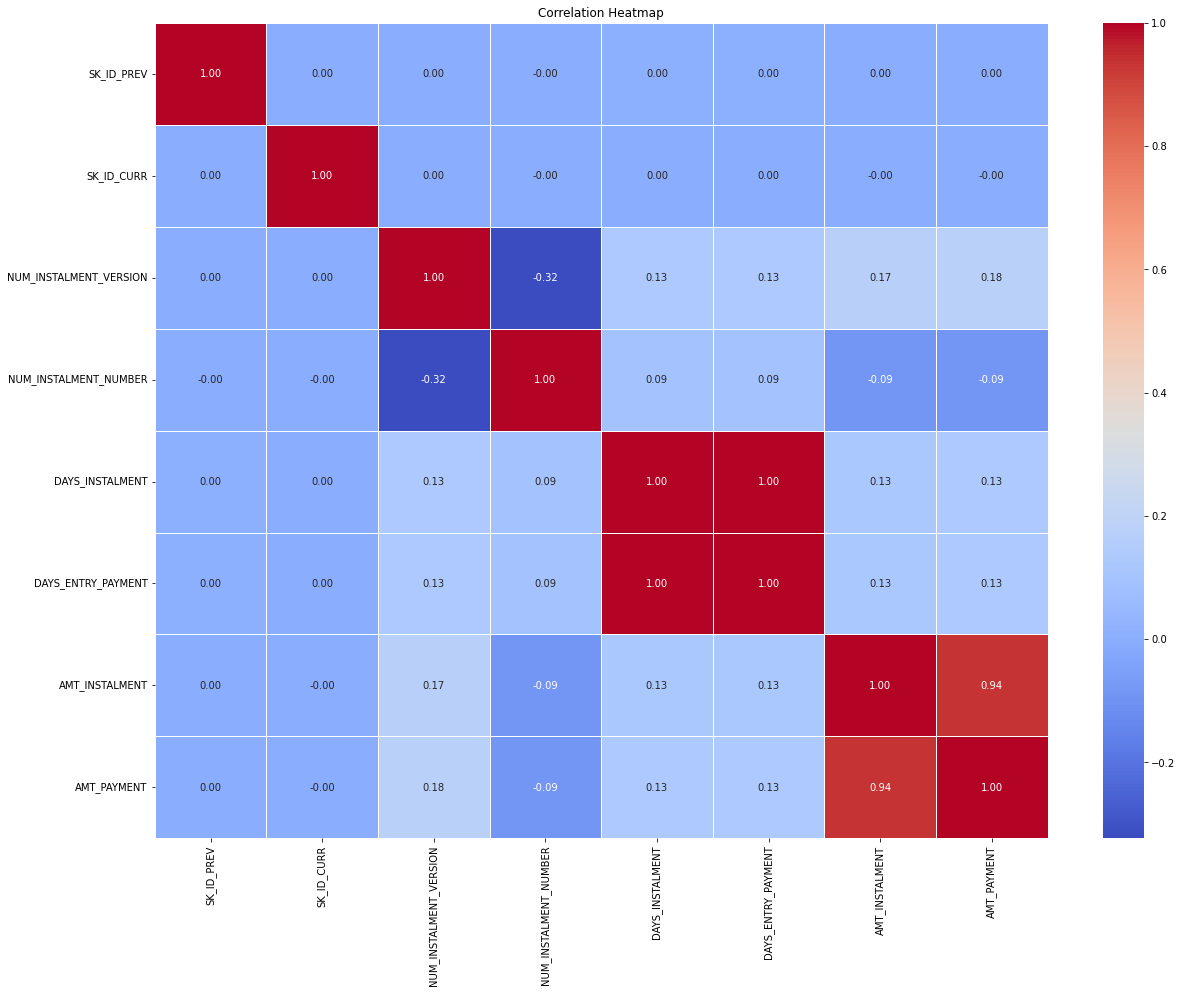

In [51]:
numeric_df = installments_payments.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Handle missing values 
- By the use of random forest based on high corr features with missing features

In [58]:
missing_columns = ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()
high_corr_columns = []
for col in missing_columns:
    high_corr = corr_matrix[col][corr_matrix[col].abs() > 0.85].index.tolist()
    high_corr_columns.extend(high_corr)
high_corr_columns = list(set(high_corr_columns))

sample_df = df.sample(frac=0.1, random_state=42)

for column in missing_columns:
    missing_percentage = sample_df[column].isnull().mean() * 100
    print(f"\nProcessing {column} - Missing Percentage: {missing_percentage:.2f}%")

    # Skip if no missing values
    if missing_percentage == 0:
        print(f"Column {column} has no missing values.")
        continue

    try:
        print(f"Imputing missing values in '{column}' using RandomForestRegressor...")

        features = [col for col in high_corr_columns if col != column]

        not_missing = sample_df[column].notnull()
        missing = sample_df[column].isnull()

        train_data = sample_df.loc[not_missing, features]
        target_data = sample_df.loc[not_missing, column]

        print(f"Training Features Shape: {train_data.shape}")
        print(f"Target Shape: {target_data.shape}")

        rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
        rf_model.fit(train_data, target_data)

        pred_data = sample_df.loc[missing, features]
        print(f"Missing Data Shape (to predict): {pred_data.shape}")

        sample_df.loc[missing, column] = rf_model.predict(pred_data)

        print(f"Imputation complete for {column}.")

    except Exception as e:
        print(f"Could not impute {column}. Error: {e}")

df[missing_columns] = sample_df[missing_columns]


Processing DAYS_ENTRY_PAYMENT - Missing Percentage: 0.02%
Imputing missing values in 'DAYS_ENTRY_PAYMENT' using RandomForestRegressor...
Training Features Shape: (1360243, 3)
Target Shape: (1360243,)
Missing Data Shape (to predict): (297, 3)
Imputation complete for DAYS_ENTRY_PAYMENT.

Processing AMT_PAYMENT - Missing Percentage: 0.02%
Imputing missing values in 'AMT_PAYMENT' using RandomForestRegressor...
Training Features Shape: (1360243, 3)
Target Shape: (1360243,)
Missing Data Shape (to predict): (297, 3)
Imputation complete for AMT_PAYMENT.


### Detect & Capping outliers

In [59]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 31836.5, Upper bound: 3771448.5
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77197.5, Upper bound: 634366.5
Outliers detected in column 'NUM_INSTALMENT_VERSION': 417616 outliers
Lower bound: -1.5, Upper bound: 2.5
Outliers detected in column 'NUM_INSTALMENT_NUMBER': 1886320 outliers
Lower bound: -18.5, Upper bound: 41.5
Outliers detected in column 'DAYS_INSTALMENT': 0 outliers
Lower bound: -3593.5, Upper bound: 1578.5
Outliers detected in column 'DAYS_ENTRY_PAYMENT': 0 outliers
Lower bound: -3600.0, Upper bound: 1568.0
Outliers detected in column 'AMT_INSTALMENT': 1120800 outliers
Lower bound: -14500.1025, Upper bound: 35436.3975
Outliers detected in column 'AMT_PAYMENT': 113211 outliers
Lower bound: -15669.899999999998, Upper bound: 35206.74


In [61]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:

    
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    df = cap_outliers(df, column, lower_bound, upper_bound)

Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 31836.5, Upper bound: 3771448.5
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77197.5, Upper bound: 634366.5
Outliers detected in column 'NUM_INSTALMENT_VERSION': 0 outliers
Lower bound: -1.5, Upper bound: 2.5
Outliers detected in column 'NUM_INSTALMENT_NUMBER': 0 outliers
Lower bound: -18.5, Upper bound: 41.5
Outliers detected in column 'DAYS_INSTALMENT': 0 outliers
Lower bound: -3593.5, Upper bound: 1578.5
Outliers detected in column 'DAYS_ENTRY_PAYMENT': 0 outliers
Lower bound: -3600.0, Upper bound: 1568.0
Outliers detected in column 'AMT_INSTALMENT': 0 outliers
Lower bound: -14500.1025, Upper bound: 35436.3975
Outliers detected in column 'AMT_PAYMENT': 113211 outliers
Lower bound: -15669.899999999998, Upper bound: 35206.74


### Detect & Transform Skewness

In [67]:
for column in df.select_dtypes(include=[np.number]).columns:
    col_skew = skew(df[column].dropna())
    print(f"Skewness for '{column}': {col_skew:.2f}")

    if abs(col_skew) > 0.5:
        print(f"'{column}' is skewed. Applying transformation...")

        if (df[column] <= 0).any():
            df[column] = np.sqrt(df[column] - df[column].min() + 1)
        else:
            df[column] = np.log1p(df[column])

        new_skew = skew(df[column].dropna())
        print(f"New skewness for '{column}': {new_skew:.2f}\n")
    else:
        print(f"'{column}' is not significantly skewed. No transformation applied.\n")

Skewness for 'SK_ID_PREV': 0.04
'SK_ID_PREV' is not significantly skewed. No transformation applied.

Skewness for 'SK_ID_CURR': -0.00
'SK_ID_CURR' is not significantly skewed. No transformation applied.

Skewness for 'NUM_INSTALMENT_VERSION': 0.40
'NUM_INSTALMENT_VERSION' is not significantly skewed. No transformation applied.

Skewness for 'NUM_INSTALMENT_NUMBER': 0.09
'NUM_INSTALMENT_NUMBER' is not significantly skewed. No transformation applied.

Skewness for 'DAYS_INSTALMENT': -1.60
'DAYS_INSTALMENT' is skewed. Applying transformation...
New skewness for 'DAYS_INSTALMENT': -2.29

Skewness for 'DAYS_ENTRY_PAYMENT': -1.21
'DAYS_ENTRY_PAYMENT' is skewed. Applying transformation...
New skewness for 'DAYS_ENTRY_PAYMENT': -1.45

Skewness for 'AMT_INSTALMENT': 0.17
'AMT_INSTALMENT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_PAYMENT': 0.18
'AMT_PAYMENT' is not significantly skewed. No transformation applied.



In [64]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

### There is no Categorical features 

In [71]:
cat_vars = df.select_dtypes(include=['object', 'category']).columns
for col in cat_vars:
    print(f"Unique values in {col}: {df[col].unique()}")

In [72]:
df

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  AMT_INSTALMENT  
0                      1.945910         2.009739       83.362821  
1                      3.555348         1.834592       41.443033  
2                      0.693147         2.117812      159.455323  
3                      1.386294         1.747544      156.048486  
4                      1.098612         1.982987       46.540735  
...                         ...              ...             ...  
13605396               3.749504         1.946406        8.276473  
13605397               3.749504         1.960004        8.276473  
13605398               3.749504         2.122078      188.248234  
13605399               3.749504         1.876816        8.276473  
13605400               2.995732         2.120564      107.262528  

[13605401 rows x 6 columns]

### Scaling

In [73]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(['SK_ID_PREV','SK_ID_CURR'])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [74]:
df

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     0.4   
1            1330831      151639                     0.0   
2            2085231      193053                     0.8   
3            2452527      199697                     0.4   
4            2714724      167756                     0.4   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     0.4   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  AMT_INSTALMENT  
0                      0.409888         0.921090        0.439859  
1                      0.936475         0.798558        0.215986  
2                      0.000000         0.996699        0.846231  
3                      0.226789         0.737658        0.828037  
4                      0.132663         0.902375        0.243210  
...                         ...              ...             ...  
13605396               1.000000         0.876783        0.038860  
13605397               1.000000         0.886296        0.038860  
13605398               1.000000         0.999684        1.000000  
13605399               1.000000         0.828098        0.038860  
13605400               0.753376         0.998624        0.567495  

[13605401 rows x 6 columns]

## credit_card_balance.csv

In [2]:
credit_card_balance = pd.read_csv("credit_card_balance.csv")

In [3]:
credit_card_balance.shape

(3840312, 23)

In [4]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

### Handle Missing values 

In [5]:
missing_values = credit_card_balance.isnull().sum()
missing_percent = (missing_values / len(credit_card_balance)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)

In [6]:
missing_df

Missing Values  Percent Missing
AMT_PAYMENT_CURRENT                 767988        19.998063
AMT_DRAWINGS_ATM_CURRENT            749816        19.524872
AMT_DRAWINGS_OTHER_CURRENT          749816        19.524872
AMT_DRAWINGS_POS_CURRENT            749816        19.524872
CNT_DRAWINGS_ATM_CURRENT            749816        19.524872
CNT_DRAWINGS_POS_CURRENT            749816        19.524872
CNT_DRAWINGS_OTHER_CURRENT          749816        19.524872
AMT_INST_MIN_REGULARITY             305236         7.948208
CNT_INSTALMENT_MATURE_CUM           305236         7.948208

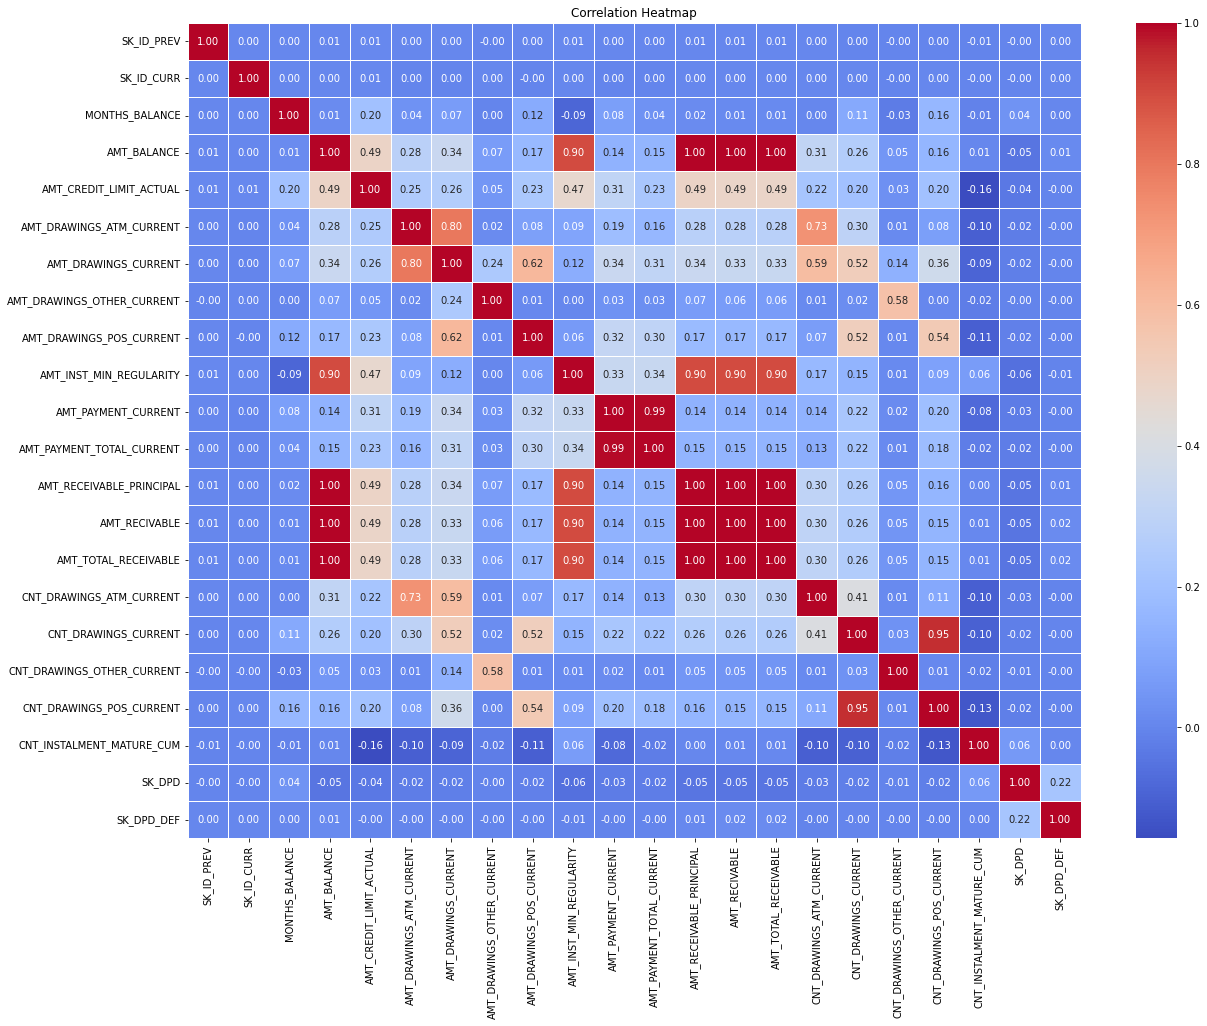

In [10]:
numeric_df = credit_card_balance.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
corr_matrix

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE                 0.005035    0.003518        0.013172   
AMT_TOTAL_RECEIVABLE          0.005032    0.003524        0.013084   
CNT_DRAWINGS_ATM_CURRENT      0.002821    0.002082        0.002536   
CNT_DRAWINGS_CURRENT          0.000367    0.002654        0.113321   
CNT_DRAWINGS_OTHER_CURRENT   -0.001412   -0.000131       -0.026192   
CNT_DRAWINGS_POS_CURRENT      0.000809    0.002135        0.160207   
CNT_INSTALMENT_MATURE_CUM    -0.007219   -0.000581       -0.008620   
SK_DPD                       -0.001786   -0.000962        0.039434   
SK_DPD_DEF                    0.001973    0.001519        0.001659   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.005046                 0.006631   
SK_ID_CURR                     0.003510                 0.005991   
MONTHS_BALANCE                 0.014558                 0.199900   
AMT_BALANCE                    1.000000                 0.489386   
AMT_CREDIT_LIMIT_ACTUAL        0.489386                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.283551                 0.247219   
AMT_DRAWINGS_CURRENT           0.336965                 0.263093   
AMT_DRAWINGS_OTHER_CURRENT     0.065366                 0.050579   
AMT_DRAWINGS_POS_CURRENT       0.169449                 0.234976   
AMT_INST_MIN_REGULARITY        0.896728                 0.467620   
AMT_PAYMENT_CURRENT            0.143934                 0.308294   
AMT_PAYMENT_TOTAL_CURRENT      0.151349                 0.226570   
AMT_RECEIVABLE_PRINCIPAL       0.999720                 0.490445   
AMT_RECIVABLE                  0.999917                 0.488641   
AMT_TOTAL_RECEIVABLE           0.999897                 0.488598   
CNT_DRAWINGS_ATM_CURRENT       0.309968                 0.221808   
CNT_DRAWINGS_CURRENT           0.259184                 0.204237   
CNT_DRAWINGS_OTHER_CURRENT     0.046563                 0.030051   
CNT_DRAWINGS_POS_CURRENT       0.155553                 0.202868   
CNT_INSTALMENT_MATURE_CUM      0.005009                -0.157269   
SK_DPD                        -0.046988                -0.038791   
SK_DPD_DEF                     0.013009                -0.002236   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.004342              0.002624   
SK_ID_CURR                                  0.000814              0.000708   
MONTHS_BALANCE                              0.036802              0.065527   
AMT_BALANCE                                 0.283551              0.336965   
AMT_CREDIT_LIMIT_ACTUAL                     0.247219              0.263093   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.800190   
AMT_DRAWINGS_CURRENT                        0.800190              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.017899              0.236297   
AMT_DRAWINGS_POS_CURRENT                    0.078971              0.615591   
AMT_INST_MIN_REGULARITY                     0.094824              0.1244

- The step is to impute missing values using a RandomForestRegressor, which is predicting missing values on the basis of these relationships.

In [15]:
for col in df.columns:
    if df[col].isna().sum() == 0:
        continue

    print(f"\nProcessing column: {col}")
    col_type = df[col].dtype
    n_missing = df[col].isna().sum()
    print(f"Missing values: {n_missing} | Data type: {col_type}")

    if col_type == 'object':
        fill_value = df[col].mode()[0]
        df[col].fillna(fill_value, inplace=True)
        method = f"Filled with mode: {fill_value}"
        print(method)

    else:
        try:
            corr_series = corr_matrix[col].dropna().drop(col)
        except:
            corr_series = pd.Series()

        if not corr_series.empty and corr_series.abs().max() > 0.85:
            strong_corr_features = corr_series[abs(corr_series) > 0.85].index.tolist()
            print(f"Strongly correlated features: {strong_corr_features}")

            train_df = df[df[col].notna()].copy()
            predict_df = df[df[col].isna()].copy()

            train_df_sample = train_df.sample(frac=0.1, random_state=42)
            print(f"Training RandomForest on 10% sample ({len(train_df_sample)} rows)...")

            rf = RandomForestRegressor(n_estimators=10, random_state=42)
            rf.fit(train_df_sample[strong_corr_features], train_df_sample[col])
            predicted = rf.predict(predict_df[strong_corr_features])

            df.loc[df[col].isna(), col] = predicted
            method = f"Filled using RandomForest on 10% with features: {strong_corr_features}"
            print(method)

        else:
            skewness = df[col].skew()
            if abs(skewness) > 1:
                imputer = SimpleImputer(strategy="median")
                strategy = "median"
            else:
                imputer = SimpleImputer(strategy="mean")
                strategy = "mean"

            df[[col]] = imputer.fit_transform(df[[col]])
            method = f"Filled with {strategy} (skewness={skewness:.2f})"
            print(method)



Processing column: AMT_INST_MIN_REGULARITY
Missing values: 305236 | Data type: float64
Strongly correlated features: ['AMT_BALANCE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']
Training RandomForest on 10% sample (353508 rows)...
Filled using RandomForest on 10% with features: ['AMT_BALANCE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']

Processing column: AMT_PAYMENT_CURRENT
Missing values: 767988 | Data type: float64
Strongly correlated features: ['AMT_PAYMENT_TOTAL_CURRENT']
Training RandomForest on 10% sample (307232 rows)...
Filled using RandomForest on 10% with features: ['AMT_PAYMENT_TOTAL_CURRENT']

Processing column: CNT_DRAWINGS_ATM_CURRENT
Missing values: 749816 | Data type: float64
Filled with median (skewness=6.91)

Processing column: CNT_DRAWINGS_OTHER_CURRENT
Missing values: 749816 | Data type: float64
Filled with median (skewness=26.32)

Processing column: CNT_DRAWINGS_POS_CURRENT
Missing values: 749816 | Data type: floa

In [16]:
missing_df

Empty DataFrame
Columns: [Missing Values, Percent Missing]
Index: []

### Detect & capping outliers

In [20]:
def detect_outliers(df, column, lower_percentile=25, upper_percentile=75, multiplier=1.5):
    Q1 = df[column].quantile(lower_percentile / 100)
    Q3 = df[column].quantile(upper_percentile / 100)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    return outliers, lower_bound, upper_bound

outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 31970.875, Upper bound: 3771741.875
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77577.5, Upper bound: 634674.5
Outliers detected in column 'MONTHS_BALANCE': 0 outliers
Lower bound: -121.0, Upper bound: 55.0
Outliers detected in column 'AMT_BALANCE': 248146 outliers
Lower bound: -133570.02937499998, Upper bound: 222616.71562499998
Outliers detected in column 'AMT_CREDIT_LIMIT_ACTUAL': 404927 outliers
Lower bound: -157500.0, Upper bound: 382500.0
Outliers detected in column 'AMT_DRAWINGS_ATM_CURRENT': 424778 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'AMT_DRAWINGS_CURRENT': 616869 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'AMT_DRAWINGS_OTHER_CURRENT': 12333 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'AMT_DRAWINGS_POS_CURRENT': 264901 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'AMT_INST

In [21]:
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [24]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    df = cap_outliers(df, column, lower_bound, upper_bound)

### Detect & Transform SKewness

In [26]:
for column in df.select_dtypes(include=[np.number]).columns:
    col_skew = skew(df[column].dropna())
    print(f"Skewness for '{column}': {col_skew:.2f}")

    if abs(col_skew) > 0.5:
        print(f"'{column}' is skewed. Applying transformation...")

        if (df[column] <= 0).any():
            df[column] = np.sqrt(df[column] - df[column].min() + 1)
        else:
            df[column] = np.log1p(df[column])

        new_skew = skew(df[column].dropna())
        print(f"New skewness for '{column}': {new_skew:.2f}\n")
    else:
        print(f"'{column}' is not significantly skewed. No transformation applied.\n")

Skewness for 'SK_ID_PREV': 0.04
'SK_ID_PREV' is not significantly skewed. No transformation applied.

Skewness for 'SK_ID_CURR': -0.00
'SK_ID_CURR' is not significantly skewed. No transformation applied.

Skewness for 'MONTHS_BALANCE': -1.08
'MONTHS_BALANCE' is skewed. Applying transformation...
New skewness for 'MONTHS_BALANCE': -1.83

Skewness for 'AMT_BALANCE': 1.13
'AMT_BALANCE' is skewed. Applying transformation...
New skewness for 'AMT_BALANCE': 0.94

Skewness for 'AMT_CREDIT_LIMIT_ACTUAL': -0.31
'AMT_CREDIT_LIMIT_ACTUAL' is not significantly skewed. No transformation applied.

Skewness for 'AMT_DRAWINGS_ATM_CURRENT': nan
'AMT_DRAWINGS_ATM_CURRENT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_DRAWINGS_CURRENT': nan
'AMT_DRAWINGS_CURRENT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_DRAWINGS_OTHER_CURRENT': nan
'AMT_DRAWINGS_OTHER_CURRENT' is not significantly skewed. No transformation applied.

Skewness for 'AMT_DRAWINGS

In [29]:
columns_to_drop = df.columns[(df == 0).all()]
df = df.drop(columns=columns_to_drop)
print(f"Columns dropped: {columns_to_drop}")
print(f"Updated dataframe shape: {df.shape}")


Columns dropped: Index(['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')
Updated dataframe shape: (3840312, 13)


### Encode cat columns

In [30]:
cat_vars = df.select_dtypes(include=['object', 'category']).columns
for col in cat_vars:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in NAME_CONTRACT_STATUS: ['Active' 'Completed' 'Demand' 'Signed' 'Sent proposal' 'Refused'
 'Approved']


In [31]:
label_encoder = LabelEncoder()
df["NAME_CONTRACT_STATUS"] = label_encoder.fit_transform(df["NAME_CONTRACT_STATUS"])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping for NAME_CONTRACT_STATUS:")
print(label_mapping)


Label Encoding Mapping for NAME_CONTRACT_STATUS:
{'Active': np.int64(0), 'Approved': np.int64(1), 'Completed': np.int64(2), 'Demand': np.int64(3), 'Refused': np.int64(4), 'Sent proposal': np.int64(5), 'Signed': np.int64(6)}


In [32]:
df.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907        2.355120     5.904139   
1     2582071      363914        2.379357     6.099112   
2     1740877      371185        2.350120     6.010475   
3     1389973      337855        2.364964     6.393281   
4     1891521      126868        2.379357     6.393281   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0               367.424822                 3.743536             3.771339   
1               212.134391                 3.880423             3.880423   
2               618.466652                 3.880423             3.880423   
3               474.342703                 4.696955             4.702353   
4               618.466652                 4.784066             4.941529   

   AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                   3.771339                  5.882839       5.903102   
1                   3.880423                  6.074972       6.100825   
2                   3.880423                  5.978018       6.008735   
3                   4.702353                  6.372171       6.392455   
4                   4.874492                  6.372171       6.392455   

   AMT_TOTAL_RECEIVABLE  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  
0              5.903186                   6.000000                     0  
1              6.100881                   8.366600                     0  
2              6.008804                   5.567764                     0  
3              6.392539                   3.316625                     0  
4              6.392539                   8.426150                     0

### Scaling

In [33]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(['SK_ID_PREV','SK_ID_CURR'])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## POS_CASH_balance.csv

In [36]:
POS_CASH_balance=pd.read_csv("POS_CASH_balance.csv")

In [37]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [38]:
POS_CASH_balance.shape

(10001358, 8)

### Drop column the all 0 values

In [59]:
columns_to_drop = df.columns[(df == 0).all()]
df = df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")
print(f"Updated dataframe shape: {df.shape}")

Columns dropped: Index(['SK_DPD', 'SK_DPD_DEF'], dtype='object')
Updated dataframe shape: (10001358, 6)


### Handle missing values 

In [41]:
missing_values = POS_CASH_balance.isnull().sum()
missing_percent = (missing_values / len(POS_CASH_balance)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})

missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent Missing', ascending=False)
missing_df

Missing Values  Percent Missing
CNT_INSTALMENT_FUTURE           26087         0.260835
CNT_INSTALMENT                  26071         0.260675

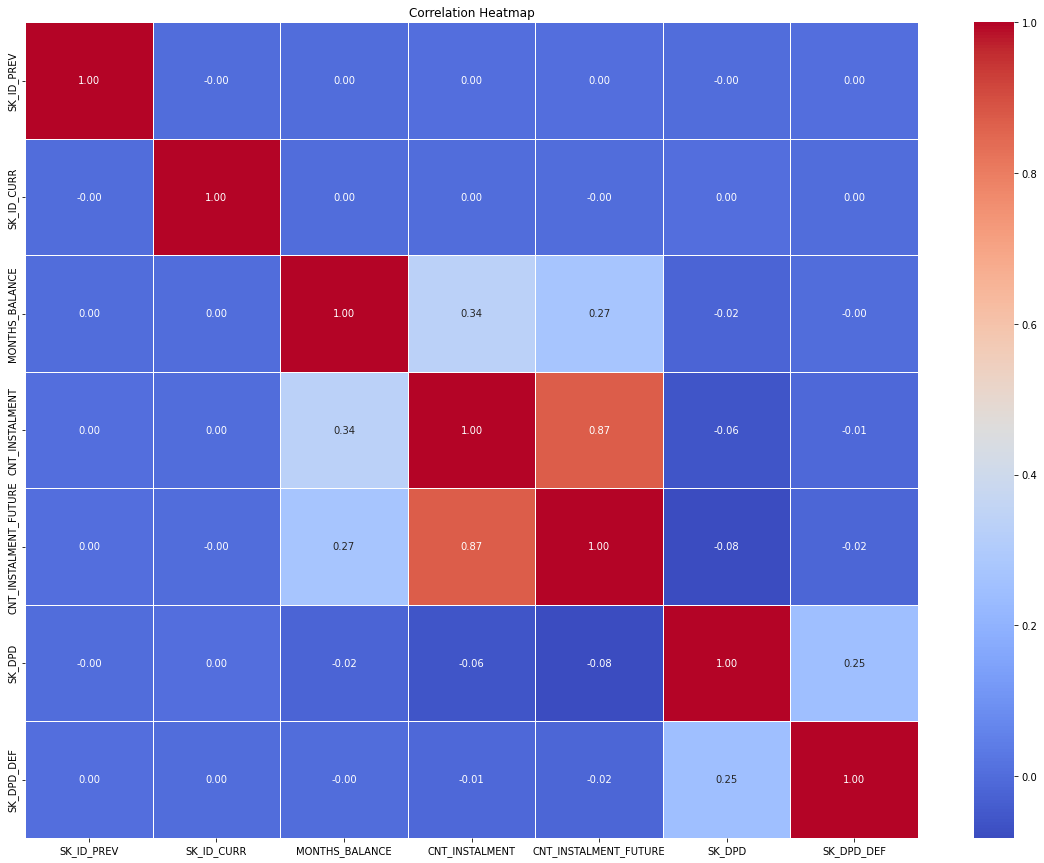

In [42]:
numeric_df = POS_CASH_balance.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Due to the high correlation between `CNT_INSTALMENT_FUTURE` and `CNT_INSTALMENT`, and the fact that both features have missing values with the same percentage, it is not feasible to build a reliable machine learning model for imputation. Therefore, missing values in `CNT_INSTALMENT_FUTURE` were imputed using the median, considering the skewness in its distribution.

In [45]:
cols_to_fill = ['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']

for col in cols_to_fill:
    missing_count = POS_CASH_balance[col].isna().sum()
    missing_percent = missing_count / len(df) * 100
    skewness = POS_CASH_balance[col].skew()

    if abs(skewness) > 1:
        strategy = 'median'
    else:
        strategy = 'mean'

    imputer = SimpleImputer(strategy=strategy)
    POS_CASH_balance[[col]] = imputer.fit_transform(POS_CASH_balance[[col]])

    print(f"Column: {col}")
    print(f"  Missing Before: {missing_count} ({missing_percent:.2f}%)")
    print(f"  Skewness: {skewness:.2f}")
    print(f"  Filled using {strategy}\n")


Column: CNT_INSTALMENT_FUTURE
  Missing Before: 26087 (0.68%)
  Skewness: 1.85
  Filled using median

Column: CNT_INSTALMENT
  Missing Before: 26071 (0.68%)
  Skewness: 1.60
  Filled using median



### Dectect outliers & capping

In [47]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 32568.0, Upper bound: 3770800.0
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77268.5, Upper bound: 634247.5
Outliers detected in column 'MONTHS_BALANCE': 0 outliers
Lower bound: -115.5, Upper bound: 48.5
Outliers detected in column 'CNT_INSTALMENT': 498724 outliers
Lower bound: -11.0, Upper bound: 45.0
Outliers detected in column 'CNT_INSTALMENT_FUTURE': 694783 outliers
Lower bound: -13.5, Upper bound: 30.5
Outliers detected in column 'SK_DPD': 295227 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'SK_DPD_DEF': 113969 outliers
Lower bound: 0.0, Upper bound: 0.0


In [49]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:

    
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    df = cap_outliers(df, column, lower_bound, upper_bound)

In [50]:
outliers_dict = {}

for column in df.select_dtypes(include=[np.number]).columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    outliers_dict[column] = {
        'outliers': outliers.sum(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"Outliers detected in column '{column}': {outliers.sum()} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Outliers detected in column 'SK_ID_PREV': 0 outliers
Lower bound: 32568.0, Upper bound: 3770800.0
Outliers detected in column 'SK_ID_CURR': 0 outliers
Lower bound: -77268.5, Upper bound: 634247.5
Outliers detected in column 'MONTHS_BALANCE': 0 outliers
Lower bound: -115.5, Upper bound: 48.5
Outliers detected in column 'CNT_INSTALMENT': 0 outliers
Lower bound: -11.0, Upper bound: 45.0
Outliers detected in column 'CNT_INSTALMENT_FUTURE': 0 outliers
Lower bound: -13.5, Upper bound: 30.5
Outliers detected in column 'SK_DPD': 0 outliers
Lower bound: 0.0, Upper bound: 0.0
Outliers detected in column 'SK_DPD_DEF': 0 outliers
Lower bound: 0.0, Upper bound: 0.0


### Solving skewness

In [51]:
for column in df.select_dtypes(include=[np.number]).columns:
    col_skew = skew(df[column].dropna())
    print(f"Skewness for '{column}': {col_skew:.2f}")

    if abs(col_skew) > 0.5:
        print(f"'{column}' is skewed. Applying transformation...")

        if (df[column] <= 0).any():
            df[column] = np.sqrt(df[column] - df[column].min() + 1)
        else:
            df[column] = np.log1p(df[column])

        new_skew = skew(df[column].dropna())
        print(f"New skewness for '{column}': {new_skew:.2f}\n")
    else:
        print(f"'{column}' is not significantly skewed. No transformation applied.\n")

Skewness for 'SK_ID_PREV': 0.04
'SK_ID_PREV' is not significantly skewed. No transformation applied.

Skewness for 'SK_ID_CURR': -0.00
'SK_ID_CURR' is not significantly skewed. No transformation applied.

Skewness for 'MONTHS_BALANCE': -0.67
'MONTHS_BALANCE' is skewed. Applying transformation...
New skewness for 'MONTHS_BALANCE': -1.17

Skewness for 'CNT_INSTALMENT': 1.19
'CNT_INSTALMENT' is skewed. Applying transformation...
New skewness for 'CNT_INSTALMENT': 0.09

Skewness for 'CNT_INSTALMENT_FUTURE': 1.04
'CNT_INSTALMENT_FUTURE' is skewed. Applying transformation...
New skewness for 'CNT_INSTALMENT_FUTURE': 0.36

Skewness for 'SK_DPD': nan
'SK_DPD' is not significantly skewed. No transformation applied.

Skewness for 'SK_DPD_DEF': nan
'SK_DPD_DEF' is not significantly skewed. No transformation applied.



### Encode cat features 

In [53]:
cat_vars = df.select_dtypes(include=['object', 'category']).columns
for col in cat_vars:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in NAME_CONTRACT_STATUS: ['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']


In [54]:
label_encoder = LabelEncoder()
df["NAME_CONTRACT_STATUS"] = label_encoder.fit_transform(df["NAME_CONTRACT_STATUS"])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping for NAME_CONTRACT_STATUS:")
print(label_mapping)


Label Encoding Mapping for NAME_CONTRACT_STATUS:
{'Active': np.int64(0), 'Amortized debt': np.int64(1), 'Approved': np.int64(2), 'Canceled': np.int64(3), 'Completed': np.int64(4), 'Demand': np.int64(5), 'Returned to the store': np.int64(6), 'Signed': np.int64(7), 'XNA': np.int64(8)}


In [55]:
df

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943        2.210913        3.828641   
1            1715348      367990        2.197225        3.610918   
2            1784872      397406        2.204118        2.564949   
3            1903291      269225        2.183127        3.828641   
4            2341044      334279        2.183127        3.610918   
...              ...         ...             ...             ...   
10001353     2448283      226558        2.279824        1.945910   
10001354     1717234      141565        2.285618        2.564949   
10001355     1283126      315695        2.273959        2.397895   
10001356     1082516      450255        2.268020        2.564949   
10001357     1259607      174278        2.042285        2.833213   

          CNT_INSTALMENT_FUTURE  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                      5.612486                     0       0           0  
1                      5.612486                     0       0           0  
2                      3.162278                     0       0           0  
3                      5.612486                     0       0           0  
4                      5.612486                     0       0           0  
...                         ...                   ...     ...         ...  
10001353               1.000000                     0       0           0  
10001354               1.000000                     0       0           0  
10001355               1.000000                     0       0           0  
10001356               1.000000                     0       0           0  
10001357               1.000000                     4       0           0  

[10001358 rows x 8 columns]

### Scaling

In [57]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(['SK_ID_PREV','SK_ID_CURR'])
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [60]:
df

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943        0.900105        1.000000   
1            1715348      367990        0.891987        0.930562   
2            1784872      397406        0.896075        0.596972   
3            1903291      269225        0.883626        1.000000   
4            2341044      334279        0.883626        0.930562   
...              ...         ...             ...             ...   
10001353     2448283      226558        0.940973        0.399542   
10001354     1717234      141565        0.944408        0.596972   
10001355     1283126      315695        0.937494        0.543694   
10001356     1082516      450255        0.933972        0.596972   
10001357     1259607      174278        0.800101        0.682529   

          CNT_INSTALMENT_FUTURE  NAME_CONTRACT_STATUS  
0                      1.000000                   0.0  
1                      1.000000                   0.0  
2                      0.468788                   0.0  
3                      1.000000                   0.0  
4                      1.000000                   0.0  
...                         ...                   ...  
10001353               0.000000                   0.0  
10001354               0.000000                   0.0  
10001355               0.000000                   0.0  
10001356               0.000000                   0.0  
10001357               0.000000                   0.5  

[10001358 rows x 6 columns]

- ### Aggregate all Datasets
- ### Feature crossing

### Aggregate Bureau & Bureau_Balance Data

- Missing values are filled with zero due to missing values mean no related records exist for that customer

In [ ]:
bureau_agg = bureau_bal.groupby("SK_ID_CURR").mean().reset_index()
merged_df = pd.merge(train_df, bureau_agg, on="SK_ID_CURR", how="left")

In [38]:
merged_df = merged_df.fillna(0)

In [41]:
bureau_agg_test = bureau_bal.groupby("SK_ID_CURR").mean().reset_index()

merged_df = pd.merge(test_df, bureau_agg_test, on="SK_ID_CURR", how="left")

print("Merged DataFrame shape:", merged_df.shape)

Merged DataFrame shape: (48744, 220)


In [42]:
merged_df = merged_df.fillna(0)

- **Create Ratio Features: ANNUITY and CREDIT vs INCOME**

- ANNUITY_INCOME_RATIO: measures the proportion of income spent on annuities.

- CREDIT_INCOME_RATIO: measures the proportion of income taken as credit.

In [45]:
train_df['ANNUITY_INCOME_RATIO'] = (train_df['AMT_ANNUITY'] / (train_df['AMT_INCOME_TOTAL'] + 1e-6))
test_df['ANNUITY_INCOME_RATIO']  = (test_df['AMT_ANNUITY']  / (test_df['AMT_INCOME_TOTAL'] + 1e-6))

train_df['CREDIT_INCOME_RATIO'] = (train_df['AMT_CREDIT'] / (train_df['AMT_INCOME_TOTAL'] + 1e-6))
test_df['CREDIT_INCOME_RATIO']  = (test_df['AMT_CREDIT']  / (test_df['AMT_INCOME_TOTAL'] + 1e-6))

In [46]:
new_cols = ['ANNUITY_INCOME_RATIO','CREDIT_INCOME_RATIO']
display(train_df[new_cols].head())

ANNUITY_INCOME_RATIO  CREDIT_INCOME_RATIO
0              0.819325             0.670457
1              0.853140             1.017409
2              0.797638             0.687563
3              1.170016             0.737408
4              1.064792             1.063494

### Aggregate Previous Application Data

- Average credit and annuity amounts

- Maximum number of payments

- Number of previous applications per customer
- This aggregated data is then merged with the main datasets and missing values are filled with zero.

In [53]:
previous_application=pd.read_csv('previous_application_cleaned.csv')

In [54]:
agg_dict = {'AMT_CREDIT': ['mean'],'AMT_ANNUITY': ['mean'],'CNT_PAYMENT': ['max']}

In [55]:
prev_agg = previous_application.groupby('SK_ID_CURR').agg(agg_dict)
prev_agg.columns = ['PREVAPP_CREDIT_MEAN', 'PREVAPP_ANNUITY_MEAN', 'PREVAPP_CNT_PAYMENT_MAX']
prev_agg.reset_index(inplace=True)

In [56]:
prev_count = previous_application.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()
prev_count.columns = ['SK_ID_CURR', 'PREVAPP_COUNT']

In [57]:
prev_agg = prev_agg.merge(prev_count, on='SK_ID_CURR', how='left')


In [58]:
train_df = train_df.merge(prev_agg, on='SK_ID_CURR', how='left')
test_df  = test_df.merge(prev_agg, on='SK_ID_CURR', how='left')

In [59]:
for col in ['PREVAPP_CREDIT_MEAN', 'PREVAPP_ANNUITY_MEAN','PREVAPP_CNT_PAYMENT_MAX','PREVAPP_COUNT']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col]  = test_df[col].fillna(0)


### Aggregate Installments Payments Data

- AMT_INSTALMENT_TO_NUM_INSTALMENT: average installment per number of payments

- TOTAL_INSTALMENT: total paid across all installments
- Then we merge the aggregated features into the main datasets.

In [60]:
installments_payments=pd.read_csv("installments_payments_cleaned.csv")

In [61]:
installments_payments['AMT_INSTALMENT_TO_NUM_INSTALMENT'] = installments_payments['AMT_INSTALMENT'] / (installments_payments['NUM_INSTALMENT_NUMBER'] + 1e-6)  # Adding small epsilon to avoid division by zero

installments_payments['TOTAL_INSTALMENT'] = installments_payments['AMT_INSTALMENT'] * installments_payments['NUM_INSTALMENT_NUMBER']

In [62]:
agg_dict_inst = {
    'AMT_INSTALMENT_TO_NUM_INSTALMENT': ['mean'],
    'TOTAL_INSTALMENT': ['sum'],
}
inst_agg = installments_payments.groupby('SK_ID_CURR').agg(agg_dict_inst)
inst_agg.columns = ['AMT_INSTALMENT_TO_NUM_INSTALMENT','TOTAL_INSTALMENT']
inst_agg.reset_index(inplace=True)



In [63]:
train_df = train_df.merge(inst_agg, on='SK_ID_CURR', how='left')
test_df  = test_df.merge(inst_agg, on='SK_ID_CURR', how='left')

In [64]:
for col in ['AMT_INSTALMENT_TO_NUM_INSTALMENT','TOTAL_INSTALMENT']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

### Aggregate Credit Card Balance Data
- Average and maximum credit card balance
- These features are merged into the training and test datasets, and missing values are replaced with zero.

In [65]:
credit_card_balance = pd.read_csv('credit_card_balance_cleaned.csv')

In [66]:
agg_dict_cc = {
    'AMT_BALANCE': ['mean', 'max'],
    
}
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg(agg_dict_cc)
cc_agg.columns = ['CC_BALANCE_MEAN', 'CC_BALANCE_MAX']
cc_agg.reset_index(inplace=True)

In [67]:
train_df = train_df.merge(cc_agg, on='SK_ID_CURR', how='left')
test_df  = test_df.merge(cc_agg, on='SK_ID_CURR', how='left')

for col in ['CC_BALANCE_MEAN','CC_BALANCE_MAX']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col]  = test_df[col].fillna(0)

In [68]:
train_df.shape

(307511, 229)

In [69]:
test_df.shape 

(48744, 228)

### Aggregate POS_CASH Balance Data

- Minimum MONTHS_BALANCE

- Count of POS_CASH transactions per customer
- This summary is merged with the main dataframes, and any missing values are filled with zero

In [70]:
POS_CASH_balance = pd.read_csv("POS_CASH_balance_cleaned.csv")

In [71]:
agg_dict_pos = {
    'MONTHS_BALANCE': ['min'],  
           
}

In [72]:
pos_agg = POS_CASH_balance.groupby('SK_ID_CURR').agg(agg_dict_pos)
pos_agg.columns = ['POS_MONTHS_BALANCE_MIN']
pos_agg.reset_index(inplace=True)

In [73]:
pos_count = POS_CASH_balance.groupby('SK_ID_CURR')['MONTHS_BALANCE'].count().reset_index()
pos_count.columns = ['SK_ID_CURR', 'POS_COUNT']

In [74]:
pos_agg = pos_agg.merge(pos_count, on='SK_ID_CURR', how='left')
display(pos_agg.head(5))

SK_ID_CURR  POS_MONTHS_BALANCE_MIN  POS_COUNT
0      100001                0.000000          9
1      100002                0.944408         19
2      100003                0.596914         28
3      100004                0.915665          4
4      100005                0.923132         11

In [75]:
train_df = train_df.merge(pos_agg, on='SK_ID_CURR', how='left')
test_df  = test_df.merge(pos_agg, on='SK_ID_CURR', how='left')

for col in ['POS_MONTHS_BALANCE_MIN']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col]  = test_df[col].fillna(0)

print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (307511, 231)
test_df shape: (48744, 230)


### Save Processed Datasets

In [76]:
train_df.to_csv('train2.csv', index=False)

In [78]:
train_df=pd.read_csv("train2.csv")
train_df

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0           100002       1           0.0              1.0           0.0   
1           100003       0           0.0              0.0           0.0   
2           100004       0           1.0              1.0           0.0   
3           100006       0           0.0              1.0           0.0   
4           100007       0           0.0              1.0           0.0   
...            ...     ...           ...              ...           ...   
307506      456251       0           0.0              0.0           0.0   
307507      456252       0           0.0              1.0           0.0   
307508      456253       0           0.0              1.0           0.0   
307509      456254       1           0.0              1.0           0.0   
307510      456255       0           0.0              0.0           0.0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0.764465    0.512542     0.626346         0.519580   
1               0.894520    0.910094     0.763152         0.929850   
2               0.323845    0.222665     0.258312         0.257515   
3               0.591919    0.436487     0.692556         0.469486   
4               0.549049    0.583911     0.584624         0.640838   
...                  ...         ...          ...              ...   
307506          0.656082    0.380291     0.665277         0.390398   
307507          0.347457    0.395546     0.402234         0.390398   
307508          0.643884    0.674705     0.696201         0.685346   
307509          0.691025    0.484768     0.558483         0.491146   
307510          0.656082    0.673378     0.896006         0.735406   

        NAME_EDUCATION_TYPE  ...  PREVAPP_CREDIT_MEAN  PREVAPP_ANNUITY_MEAN  \
0                      0.25  ...             0.594999              0.546043   
1                      0.75  ...             0.732362              0.821713   
2                      0.25  ...             0.198449              0.414159   
3                      0.25  ...             0.517073              0.734239   
4                      0.25  ...             0.525233              0.589561   
...                     ...  ...                  ...                   ...   
307506                 0.25  ...             0.282082              0.460524   
307507                 0.25  ...             0.334567              0.570051   
307508                 0.75  ...             0.198270              0.389103   
307509                 0.25  ...             0.452362              0.527777   
307510                 0.75  ...             0.654314              0.722119   

        PREVAPP_CNT_PAYMENT_MAX  PREVAPP_COUNT  \
0                      0.958333            1.0   
1                      0.458333            3.0   
2                      0.125000            1.0   
3                      1.000000            9.0   
4                      1.000000            6.0   
...                         ...            ...   
307506                 0.291667            1.0   
307507                 0.208333            1.0   
307508                 0.208333            2.0   
307509                 0.625000            2.0   
307510                 1.000000            8.0   

        AMT_INSTALMENT_TO_NUM_INSTALMENT  TOTAL_INSTALMENT  CC_BALANCE_MEAN  \
0                           26757.458526          5.221590          0.00000   
1                           97324.142466          5.326102          0.00000   
2                          128530.026924          0.174491          0.00000   
3                          135338.612088          3.534946          0.91415   
4                           52855.770396         14.927670          0.00000   
...                                  ...               ...              ...   
307506                      61251.613110          0.884314          0.00000   
307507                      88455.354297          0.757882          0.00000   
30750

In [79]:
test_df.to_csv('test2.csv', index=False)
test_df=pd.read_csv("test2.csv")
test_df

SK_ID_CURR  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0          100001           0.0              1.0           0.0   
1          100005           0.0              1.0           0.0   
2          100013           1.0              1.0           0.0   
3          100028           0.0              1.0           0.8   
4          100038           1.0              0.0           0.4   
...           ...           ...              ...           ...   
48739      456221           0.0              1.0           0.0   
48740      456222           0.0              0.0           0.8   
48741      456223           1.0              1.0           0.4   
48742      456224           0.0              0.0           0.0   
48743      456250           1.0              0.0           0.0   

       AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              0.568998    0.669842     0.525462         0.617197   
1              0.452370    0.370309     0.470764         0.334907   
2              0.726936    0.726213     1.000000         0.735487   
3              0.906370    1.000000     0.859047         1.000000   
4              0.680406    0.704441     0.684563         0.732877   
...                 ...         ...          ...              ...   
48739          0.528979    0.558982     0.472641         0.453058   
48740          0.628302    0.702619     0.682674         0.649848   
48741          0.726936    0.472679     0.698033         0.500723   
48742          0.769019    0.588069     0.594488         0.617197   
48743          0.568998    0.470485     0.588538         0.453058   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  ...  PREVAPP_CREDIT_MEAN  \
0                     0.75                0.25  ...             0.215975   
1                     0.25                0.25  ...             0.140512   
2                     0.75                0.25  ...             0.381294   
3                     0.25                0.25  ...             0.365894   
4                     0.25                0.25  ...             0.713752   
...                    ...                 ...  ...                  ...   
48739                 0.25                0.75  ...             0.709910   
48740                 0.25                0.25  ...             0.408732   
48741                 0.25                0.25  ...             0.510014   
48742                 0.75                0.25  ...             0.395429   
48743                 0.25                0.25  ...             0.398317   

       PREVAPP_ANNUITY_MEAN  PREVAPP_CNT_PAYMENT_MAX  PREVAPP_COUNT  \
0                  0.354874                 0.291667            1.0   
1                  0.497492                 0.458333            2.0   
2                  0.579328                 1.000000            4.0   
3                  0.544385                 0.958333            5.0   
4                  0.745072                 1.000000            2.0   
...                     ...                      ...            ...   
48739              0.678382                 0.958333            1.0   
48740              0.452907                 0.958333            4.0   
48741              0.676834                 0.458333            2.0   
48742              0.586236                 0.958333            5.0   
48743              0.685694                 1.000000            8.0   

       AMT_INSTALMENT_TO_NUM_INSTALMENT  TOTAL_INSTALMENT  CC_BALANCE_MEAN  \
0                          47200.185484          0.547011         0.000000   
1                          40579.750024          1.237985         0.000000   
2                          13322.765304         33.191930         0.922698   
3                           9724.202916         25.917392         0.919164   
4                          46447.899777          2.595735         0.000000   
...                                 ...               ...              ...   
48739                     210529.337075          0.310576         0.00000